In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [8]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:00, 722.10it/s]
100%|██████████| 720/720 [00:07<00:00, 92.97it/s] 
8280it [00:00, 255190.22it/s]
7920it [00:00, 235855.90it/s]
720it [00:00, 748.34it/s]
100%|██████████| 720/720 [00:07<00:00, 92.88it/s] 
8280it [00:00, 269397.48it/s]
720it [00:01, 672.35it/s]
100%|██████████| 720/720 [00:07<00:00, 90.75it/s] 
8280it [00:00, 253323.20it/s]
700it [00:00, 861.15it/s]
100%|██████████| 700/700 [00:07<00:00, 96.46it/s] 
8280it [00:00, 265630.81it/s]
509it [00:00, 1186.42it/s]
100%|██████████| 509/509 [00:02<00:00, 191.64it/s]
3664it [00:00, 254794.49it/s]
700it [00:00, 816.93it/s]
100%|██████████| 700/700 [00:07<00:00, 96.39it/s] 
8280it [00:00, 79535.09it/s]
700it [00:00, 818.65it/s]
100%|██████████| 700/700 [00:07<00:00, 99.95it/s] 
8280it [00:00, 258936.61it/s]
710it [00:01, 396.16it/s]
100%|██████████| 710/710 [00:07<00:00, 97.41it/s] 
8280it [00:00, 259294.27it/s]
710it [00:01, 402.20it/s]
100%|██████████| 710/710 [00:07<00:00, 97.47it/s] 
8280it [00:00, 258915.38it/s]
710it [

In [9]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [10]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [11]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [12]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [13]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [14]:
model_conf['device'] = 'cpu'

In [15]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.10674


100%|██████████| 248/248 [00:19<00:00, 12.89it/s]


Mean val loss: 0.021994


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.027874


100%|██████████| 248/248 [00:19<00:00, 12.84it/s]


Mean val loss: 0.01846


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.026878


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.016028


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.026413


100%|██████████| 248/248 [00:19<00:00, 12.82it/s]


Mean val loss: 0.015271


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.025744


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01689
EarlyStopping counter: 1 out of 5
Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.025266


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.015365
EarlyStopping counter: 2 out of 5
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024914


100%|██████████| 248/248 [00:19<00:00, 12.82it/s]


Mean val loss: 0.014224


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024412


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.011879


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0243


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.012086
EarlyStopping counter: 1 out of 5
Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02422


100%|██████████| 248/248 [00:19<00:00, 12.77it/s]


Mean val loss: 0.010461


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023848


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.0098014


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023761


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.010735
EarlyStopping counter: 1 out of 5
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023763


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.0092539


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023261


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0093292
EarlyStopping counter: 1 out of 5
Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023492


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.0089706


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023328


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0091445
EarlyStopping counter: 1 out of 5
Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023135


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.0086289


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023419


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.0084853


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023182


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.0083989


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023213
Epoch    19: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0096559
EarlyStopping counter: 1 out of 5
Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022956


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0086304
EarlyStopping counter: 2 out of 5
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023008


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0087592
EarlyStopping counter: 3 out of 5
Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022836


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.008091


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022696


100%|██████████| 248/248 [00:19<00:00, 12.77it/s]


Mean val loss: 0.0080516


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02288


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0082011
EarlyStopping counter: 1 out of 5
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022582


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0081657
EarlyStopping counter: 2 out of 5
Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022753


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.007645


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022742


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0077555
EarlyStopping counter: 1 out of 5
Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022717
Epoch    28: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0084125
EarlyStopping counter: 2 out of 5
Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022503


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0078329
EarlyStopping counter: 3 out of 5
Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022358


100%|██████████| 248/248 [00:19<00:00, 12.81it/s]


Mean val loss: 0.0076043


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022458


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0089029
EarlyStopping counter: 1 out of 5
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022515


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0078495
EarlyStopping counter: 2 out of 5
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022389
Epoch    33: reducing learning rate of group 0 to 4.2188e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.007738
EarlyStopping counter: 3 out of 5
Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022492


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0077787
EarlyStopping counter: 4 out of 5
Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022235


100%|██████████| 248/248 [00:19<00:00, 12.81it/s]


Mean val loss: 0.0075606


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022294


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.0074684


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022306


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0076539
EarlyStopping counter: 1 out of 5
Epoch 38...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022205


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.007471


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 39...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022222


100%|██████████| 248/248 [00:19<00:00, 12.82it/s]


Mean val loss: 0.007464


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 40...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02213


100%|██████████| 248/248 [00:19<00:00, 12.84it/s]


Mean val loss: 0.0074794


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 41...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022324


100%|██████████| 248/248 [00:19<00:00, 12.81it/s]


Mean val loss: 0.0074316


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 42...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022357


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0076676
EarlyStopping counter: 1 out of 5
Epoch 43...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022199
Epoch    43: reducing learning rate of group 0 to 3.1641e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0074843
EarlyStopping counter: 2 out of 5
Epoch 44...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0222


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0075661
EarlyStopping counter: 3 out of 5
Epoch 45...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022301


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0074823
EarlyStopping counter: 4 out of 5
Epoch 46...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021977


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.0073448


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 47...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021802


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0073992
EarlyStopping counter: 1 out of 5
Epoch 48...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021934


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0074089
EarlyStopping counter: 2 out of 5
Epoch 49...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022026


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0075665
EarlyStopping counter: 3 out of 5
Epoch 50...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021818
Epoch    50: reducing learning rate of group 0 to 2.3730e-05.


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0073401


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 51...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02194


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0075496
EarlyStopping counter: 1 out of 5
Epoch 52...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021868


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0075521
EarlyStopping counter: 2 out of 5
Epoch 53...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021991
Epoch    53: reducing learning rate of group 0 to 1.7798e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0076235
EarlyStopping counter: 3 out of 5
Epoch 54...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021665


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.0072585


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 55...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02156


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0074335
EarlyStopping counter: 1 out of 5
Epoch 56...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021828


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0073499
EarlyStopping counter: 2 out of 5
Epoch 57...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021771


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0075559
EarlyStopping counter: 3 out of 5
Epoch 58...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021646
Epoch    58: reducing learning rate of group 0 to 1.3348e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0073179
EarlyStopping counter: 4 out of 5
Epoch 59...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021681


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0072403


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 60...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021596


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0072267


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 61...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021588
Epoch    61: reducing learning rate of group 0 to 1.0011e-05.


100%|██████████| 248/248 [00:19<00:00, 12.72it/s]


Mean val loss: 0.0072478


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02166


100%|██████████| 248/248 [00:19<00:00, 15.43it/s]


Mean val loss: 0.0072337


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 63...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021594


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.0072026


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 64...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02157
Epoch    64: reducing learning rate of group 0 to 7.5085e-06.


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0072142


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 65...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021652


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.0071899


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 66...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021624


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0072583
EarlyStopping counter: 1 out of 5
Epoch 67...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021756
Epoch    67: reducing learning rate of group 0 to 5.6314e-06.


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0072004


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 68...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021601


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0071734


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 69...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021742


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.0071765


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 70...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021622
Epoch    70: reducing learning rate of group 0 to 4.2235e-06.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0072038
EarlyStopping counter: 1 out of 5
Epoch 71...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021617


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.0071791


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021317


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0072288
EarlyStopping counter: 1 out of 5
Epoch 73...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021265


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0072436
EarlyStopping counter: 2 out of 5
Epoch 74...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021297


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0072068
EarlyStopping counter: 3 out of 5
Epoch 75...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02164


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071711


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 76...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021442
Epoch    76: reducing learning rate of group 0 to 3.1676e-06.


100%|██████████| 248/248 [00:19<00:00, 12.70it/s]


Mean val loss: 0.0071842


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 77...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021294


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.007168


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 78...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021489


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0072047
EarlyStopping counter: 1 out of 5
Epoch 79...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0215
Epoch    79: reducing learning rate of group 0 to 2.3757e-06.


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.0071701


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021505


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0071801


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 81...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021544


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071682


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 82...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021398
Epoch    82: reducing learning rate of group 0 to 1.7818e-06.


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0071748


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 83...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021325


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071643


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 84...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021524


100%|██████████| 248/248 [00:19<00:00, 12.77it/s]


Mean val loss: 0.0071632


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 85...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021742
Epoch    85: reducing learning rate of group 0 to 1.3363e-06.


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071731


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 86...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021445


100%|██████████| 248/248 [00:19<00:00, 15.39it/s]


Mean val loss: 0.0071721


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 87...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021423


100%|██████████| 248/248 [00:19<00:00, 15.47it/s]


Mean val loss: 0.0071744


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 88...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021434
Epoch    88: reducing learning rate of group 0 to 1.0023e-06.


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0071774


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 89...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021338


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071658


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 90...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021291


100%|██████████| 248/248 [00:19<00:00, 12.77it/s]


Mean val loss: 0.007167


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 91...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021298
Epoch    91: reducing learning rate of group 0 to 7.5169e-07.


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.0071638


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 92...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021533


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0071693


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 93...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021475


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071596


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 94...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021537
Epoch    94: reducing learning rate of group 0 to 5.6377e-07.


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071624


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 95...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021423


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.007158


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 96...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021658


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.007157


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 97...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021295
Epoch    97: reducing learning rate of group 0 to 4.2283e-07.


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.0071678


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 98...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.021633


100%|██████████| 248/248 [00:19<00:00, 12.81it/s]


Mean val loss: 0.0071622


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02143


100%|██████████| 248/248 [00:19<00:00, 12.78it/s]


Mean val loss: 0.0071627


100%|██████████| 259/259 [02:22<00:00,  2.03it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [18]:
import torch

In [27]:
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [16]:
model_conf

{'device': 'cpu', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [19]:
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

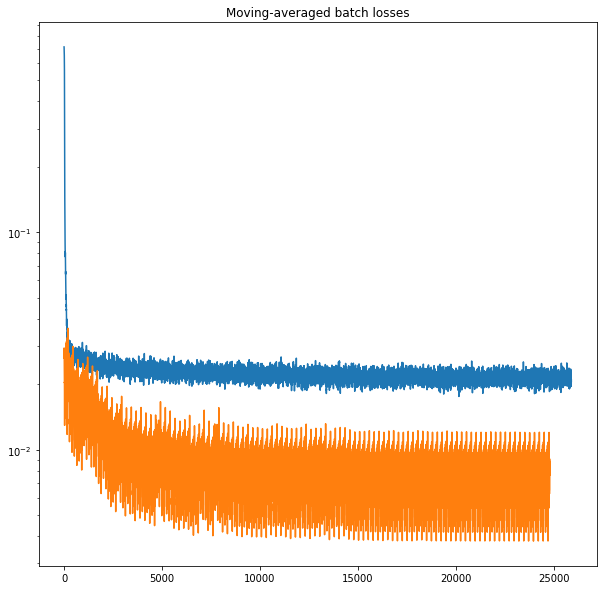

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')
plt.yscale('log')
# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

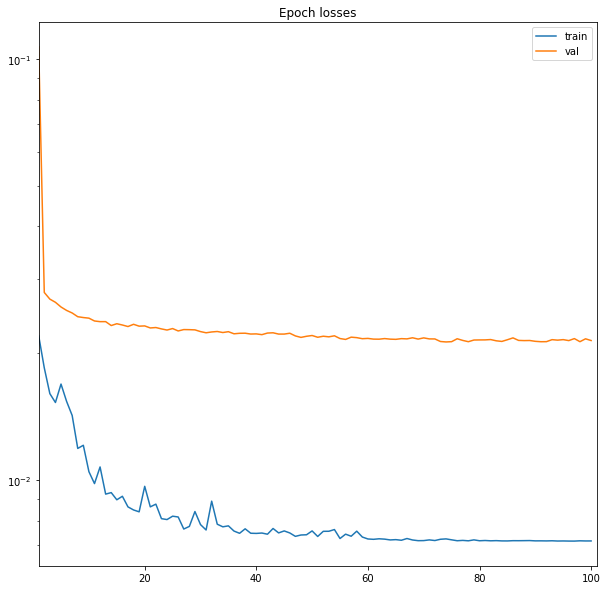

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [20]:
for stack_name, dataloader_test in dataloaders_test.items():
    break

In [28]:
import os

In [29]:
from visualization_utils import output_to_binary, plot_sample

In [34]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

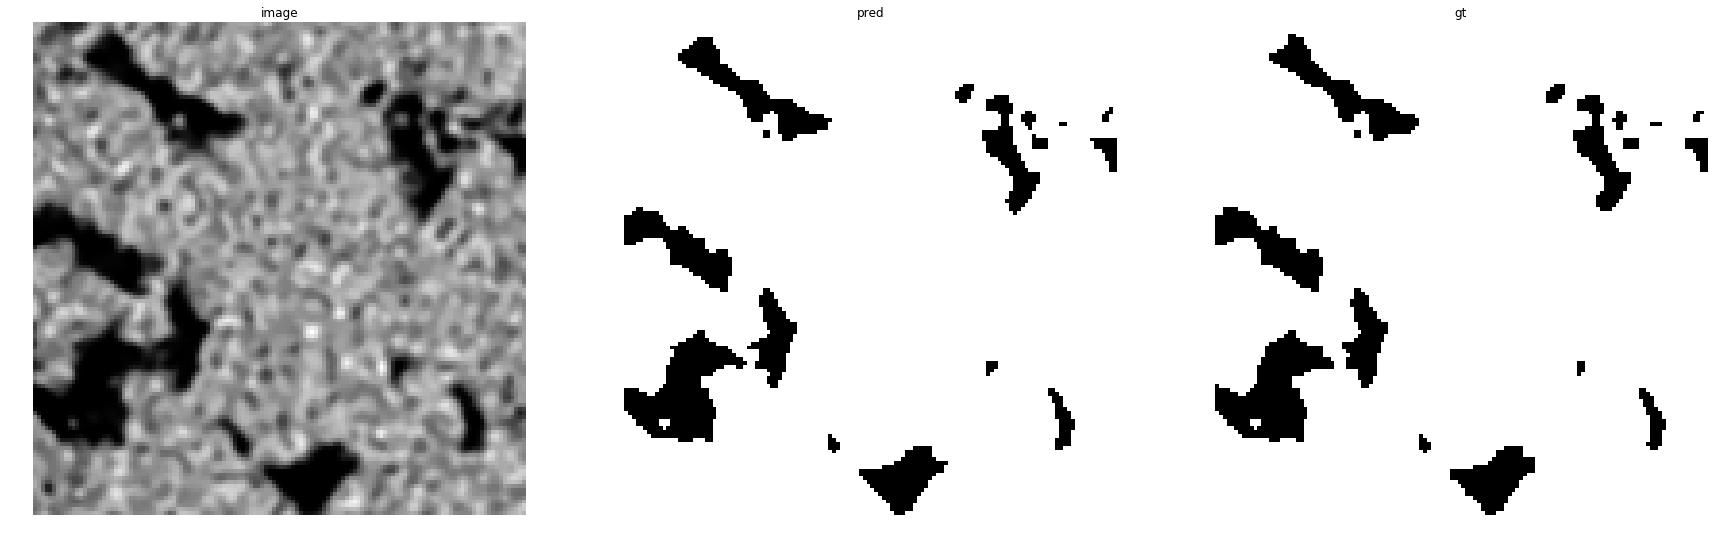

accuracy    : 0.9959716796875
precision   : 0.9976232513920956
recall      : 0.9978943078386089
f1          : 0.997758761206194
pr_auc      : 0.9999844866645491
iou         : 0.9955275462492377


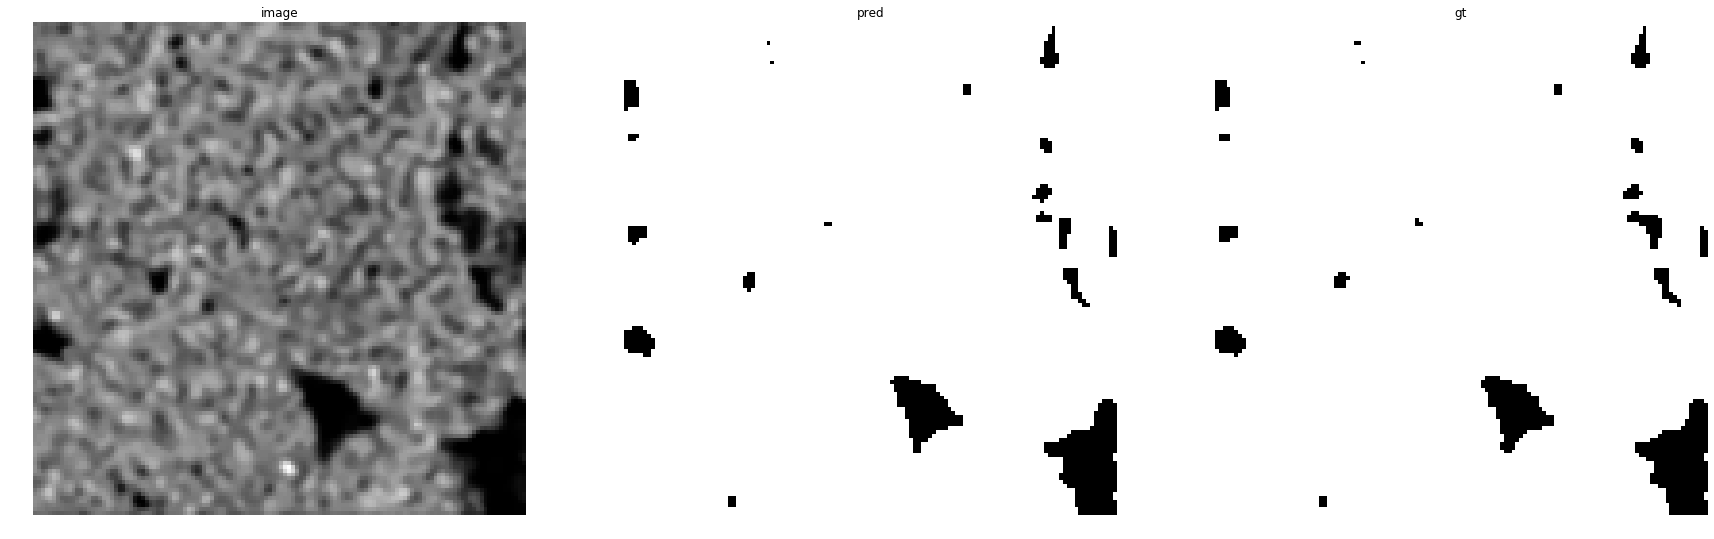

accuracy    : 0.9974365234375
precision   : 0.9980128205128205
recall      : 0.9992939666238768
f1          : 0.998652982681206
pr_auc      : 0.9999926401553076
iou         : 0.9973095893920954


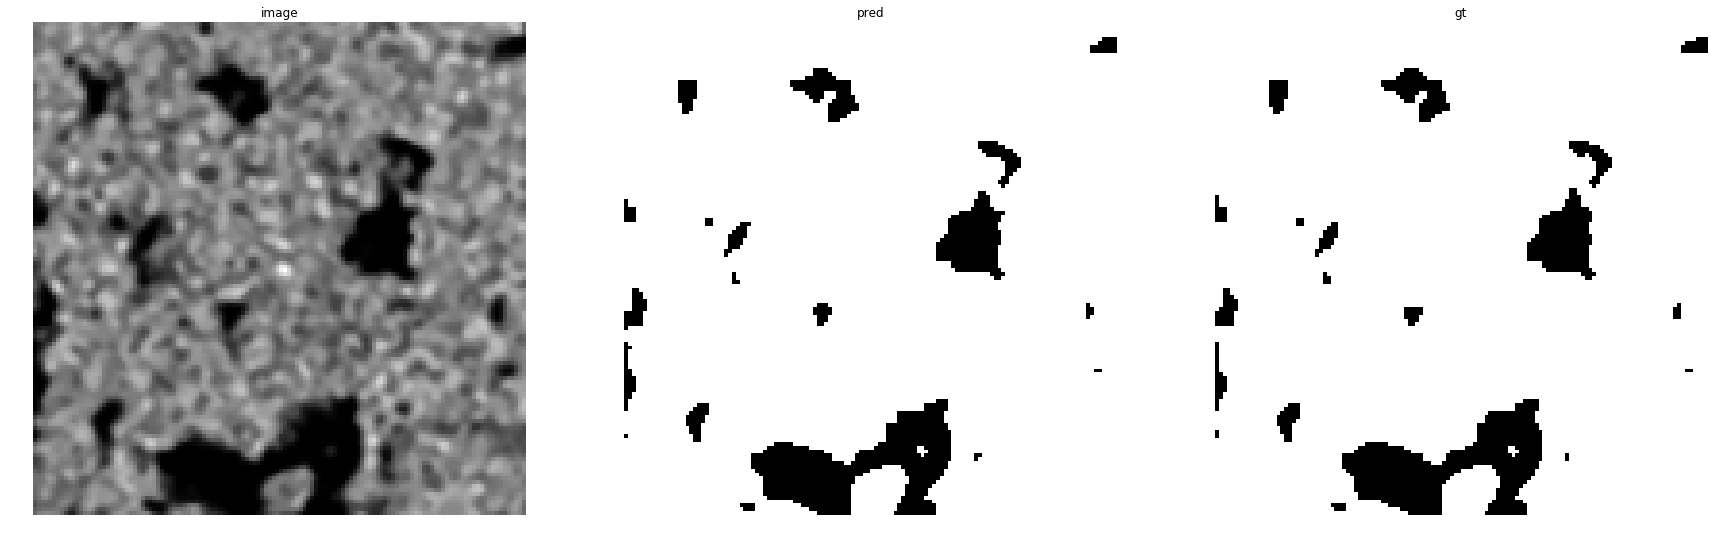

accuracy    : 0.9969482421875
precision   : 0.9981937382927482
recall      : 0.9984609207708779
f1          : 0.9983273116552923
pr_auc      : 0.9999896380191862
iou         : 0.9966602097388284


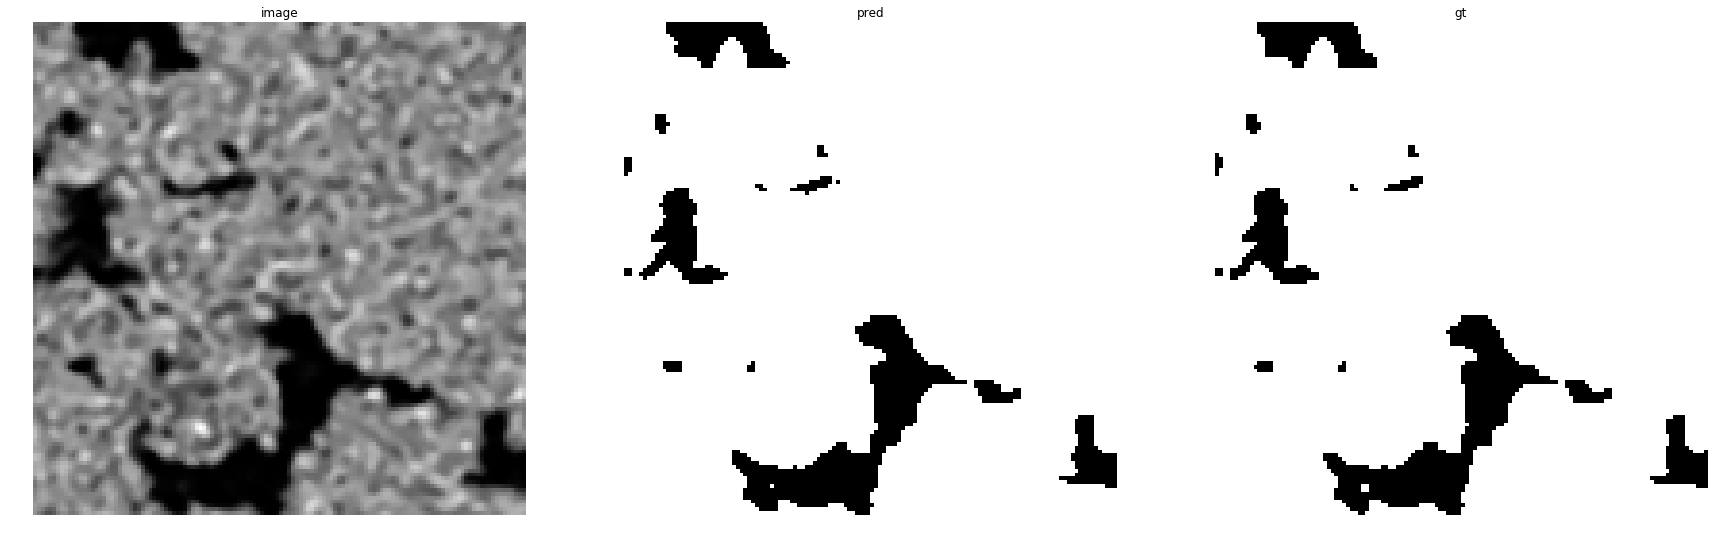

accuracy    : 0.99688720703125
precision   : 0.9983722192078134
recall      : 0.9981691191428765
f1          : 0.9982706588450714
pr_auc      : 0.9999906303410435
iou         : 0.9965472886060524


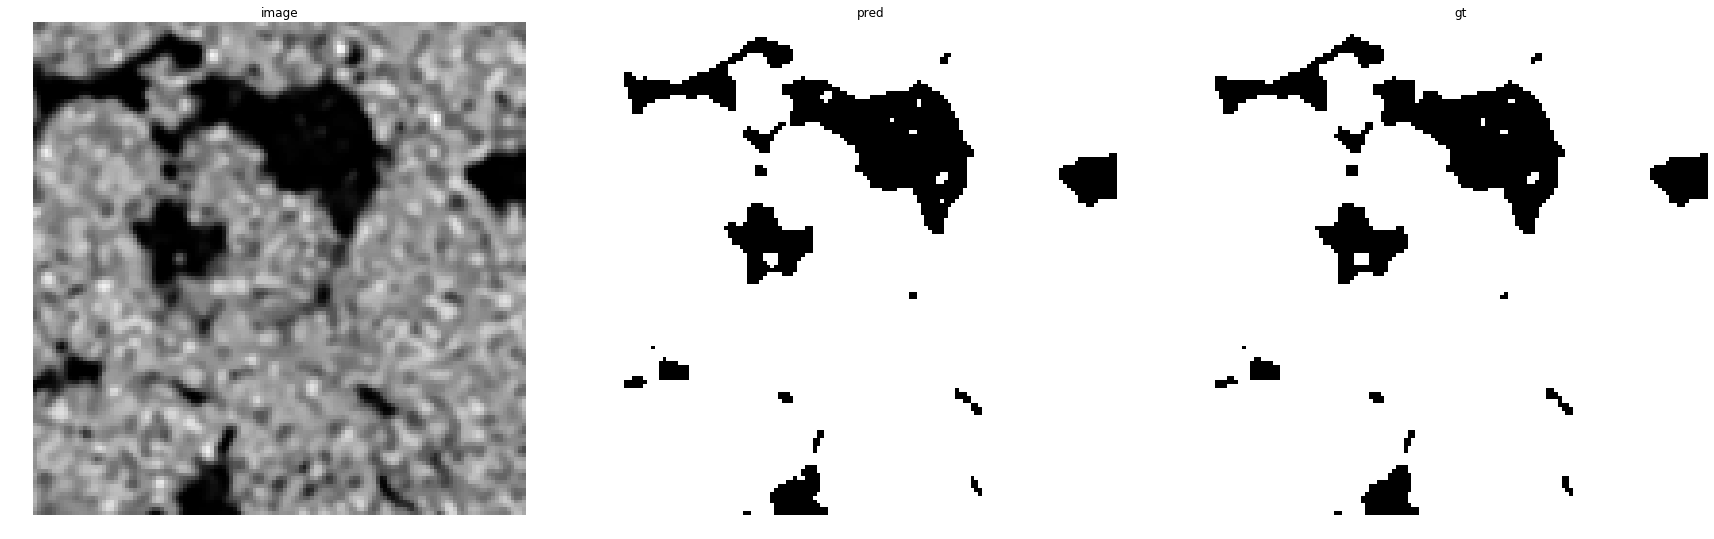

accuracy    : 0.99615478515625
precision   : 0.9978589681607846
recall      : 0.9977900552486187
f1          : 0.9978245105148658
pr_auc      : 0.9999837461435066
iou         : 0.9956584659913169


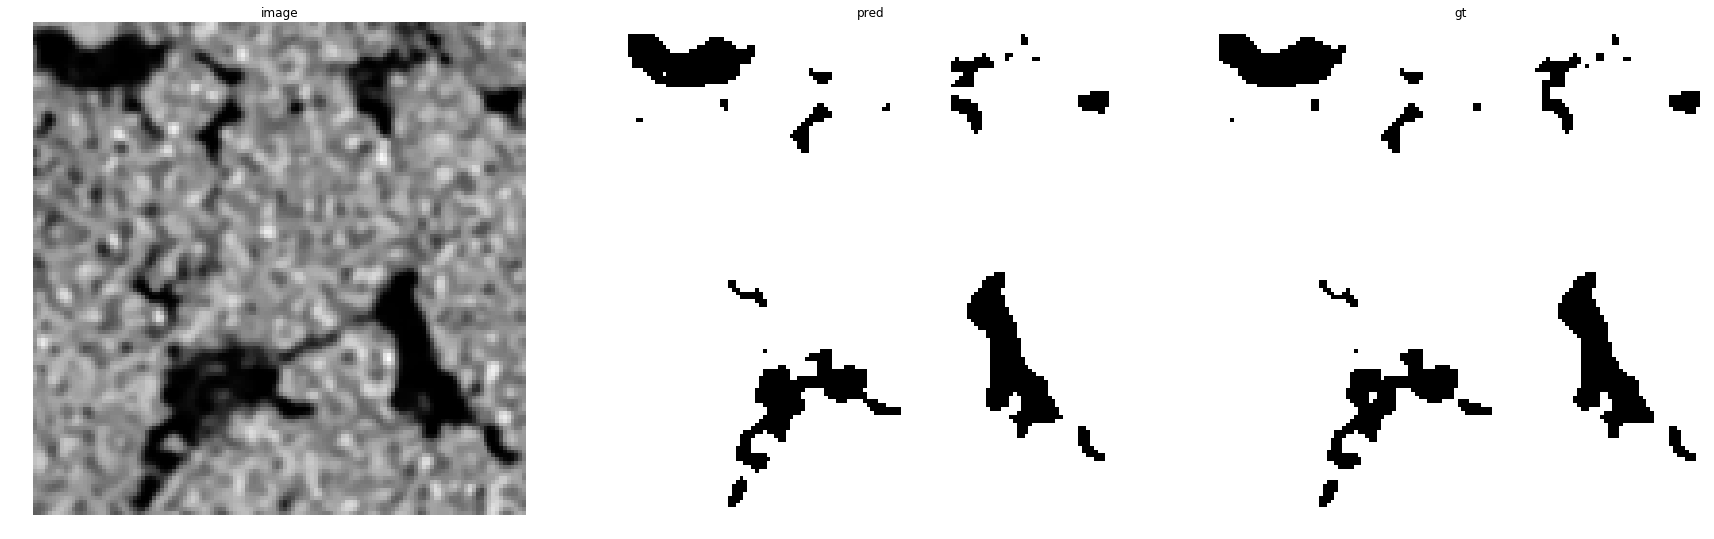

accuracy    : 0.9952392578125
precision   : 0.9972635653740907
recall      : 0.9975298751585553
f1          : 0.9973967024898205
pr_auc      : 0.9999825527092756
iou         : 0.9948069241011984


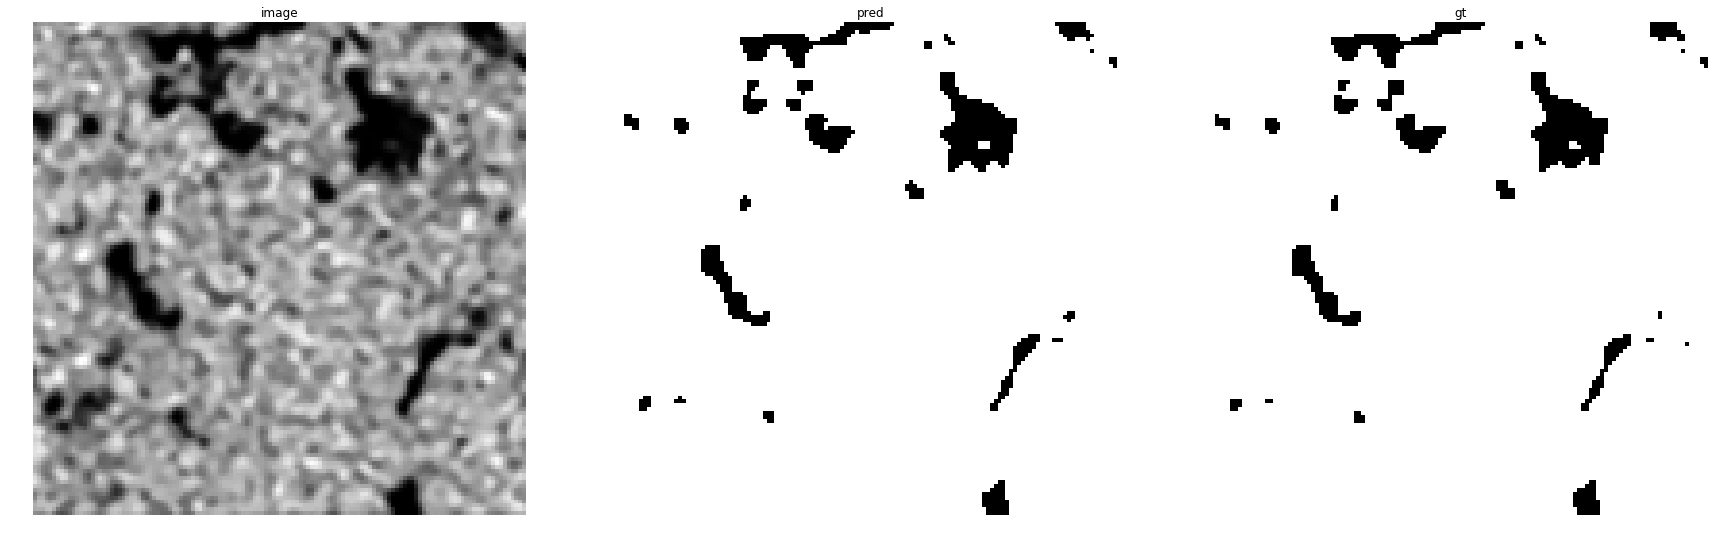

accuracy    : 0.99664306640625
precision   : 0.9983821911602925
recall      : 0.9980592573424764
f1          : 0.9982206981333506
pr_auc      : 0.999990658158229
iou         : 0.9964477168507395


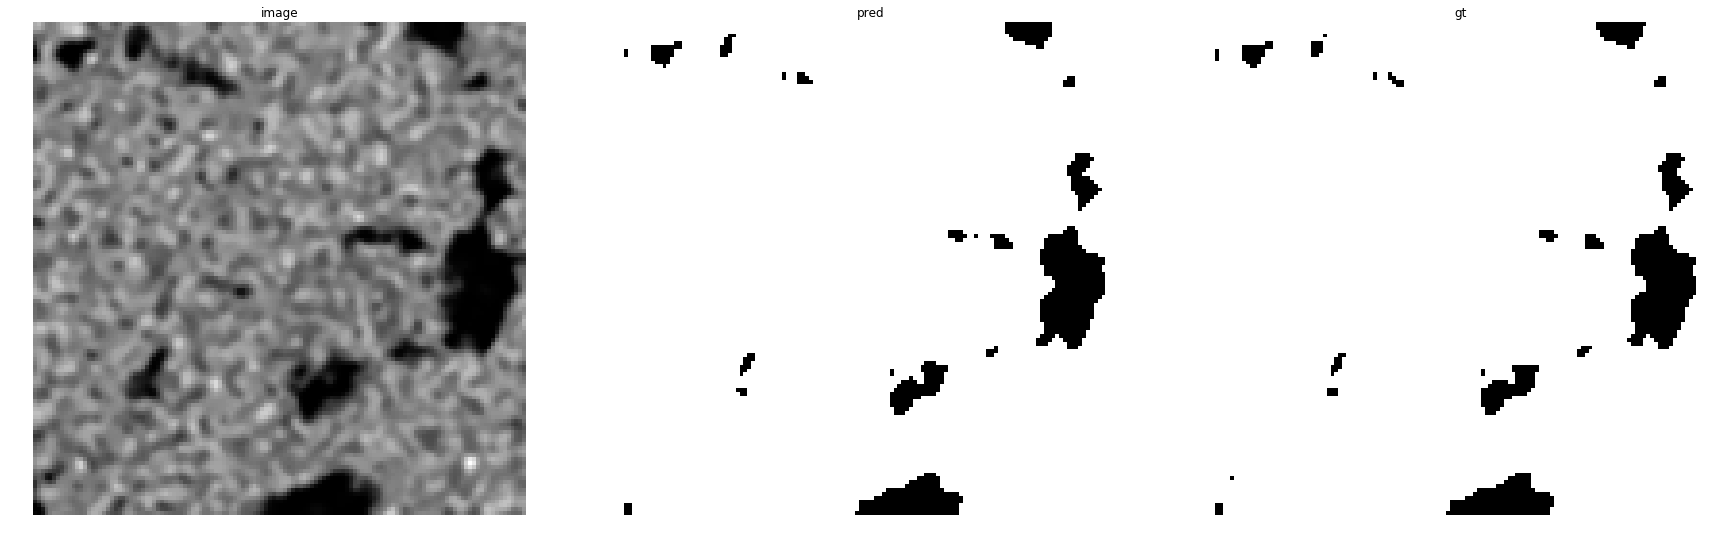

accuracy    : 0.9976806640625
precision   : 0.9988349514563106
recall      : 0.9987056691690396
f1          : 0.9987703061290532
pr_auc      : 0.999995098367043
iou         : 0.9975436328377505


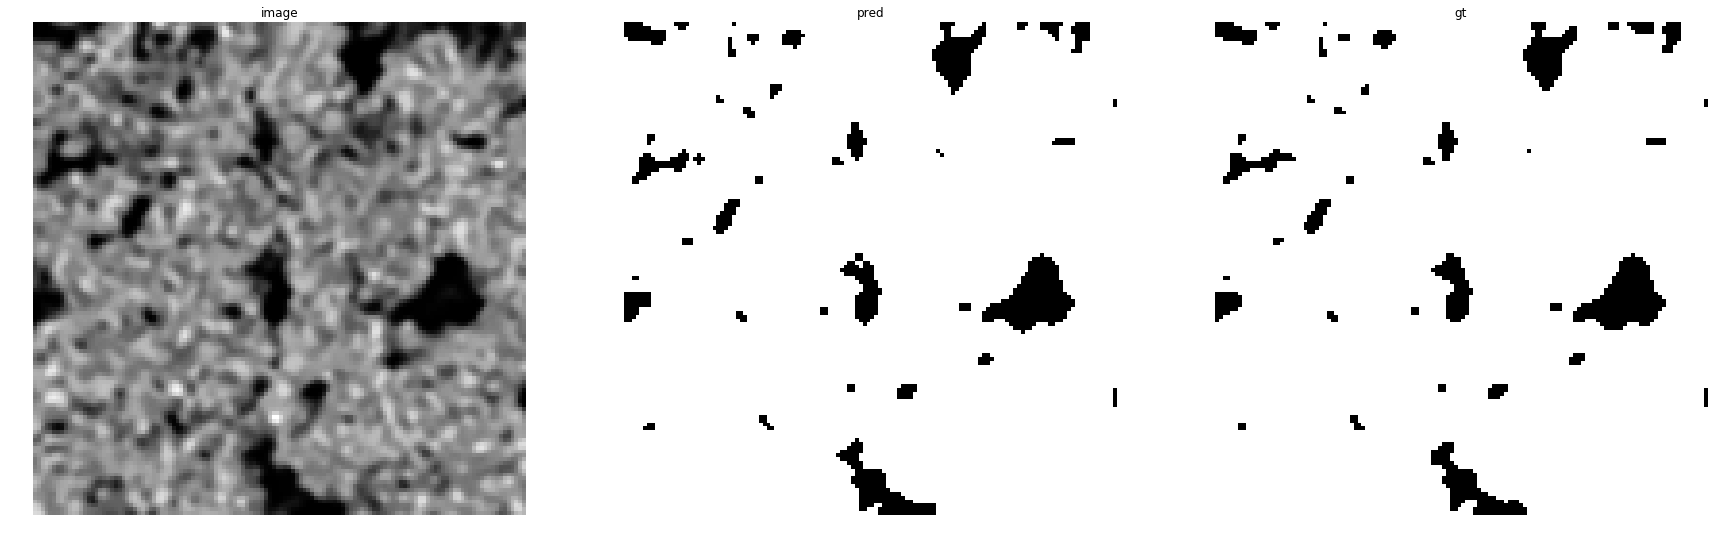

accuracy    : 0.9954833984375
precision   : 0.9976475200940992
recall      : 0.9975171512577589
f1          : 0.997582331416623
pr_auc      : 0.9999809896311223
iou         : 0.9951763248810377


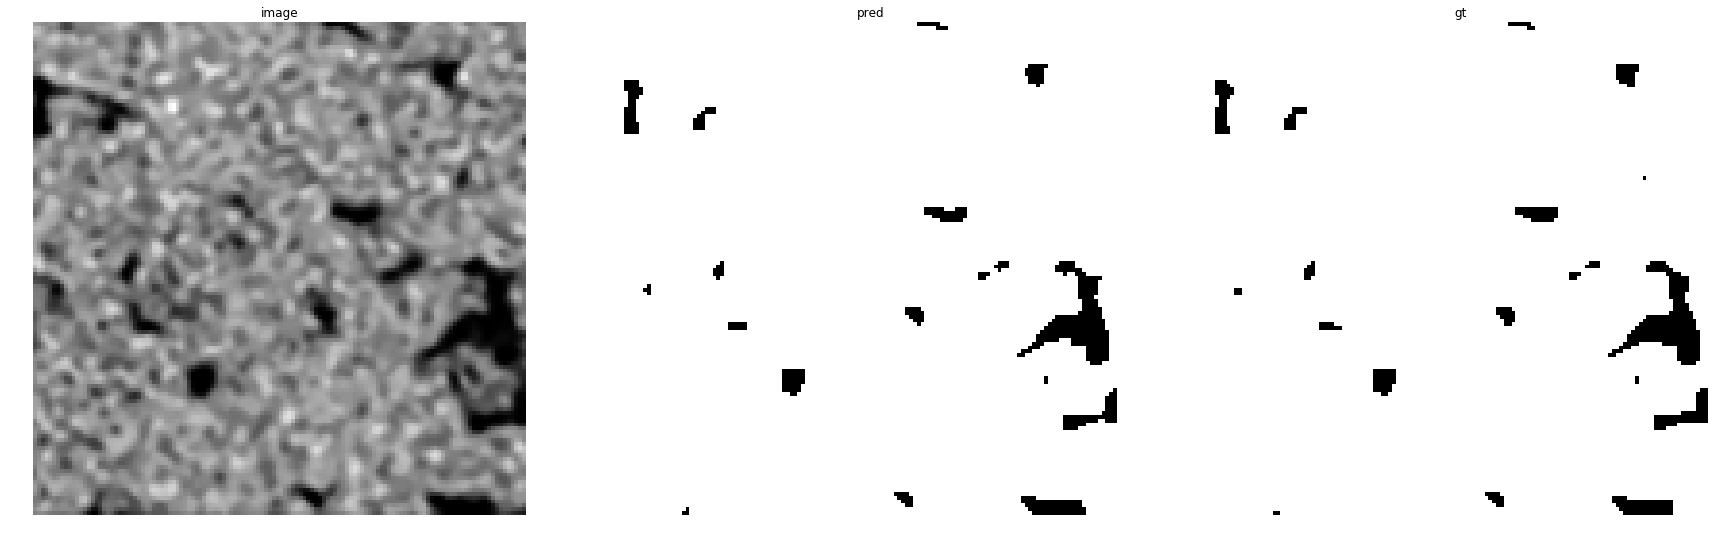

accuracy    : 0.99737548828125
precision   : 0.9982275115528265
recall      : 0.9990496705524582
f1          : 0.9986384218359141
pr_auc      : 0.999995079703293
iou         : 0.9972805464204402


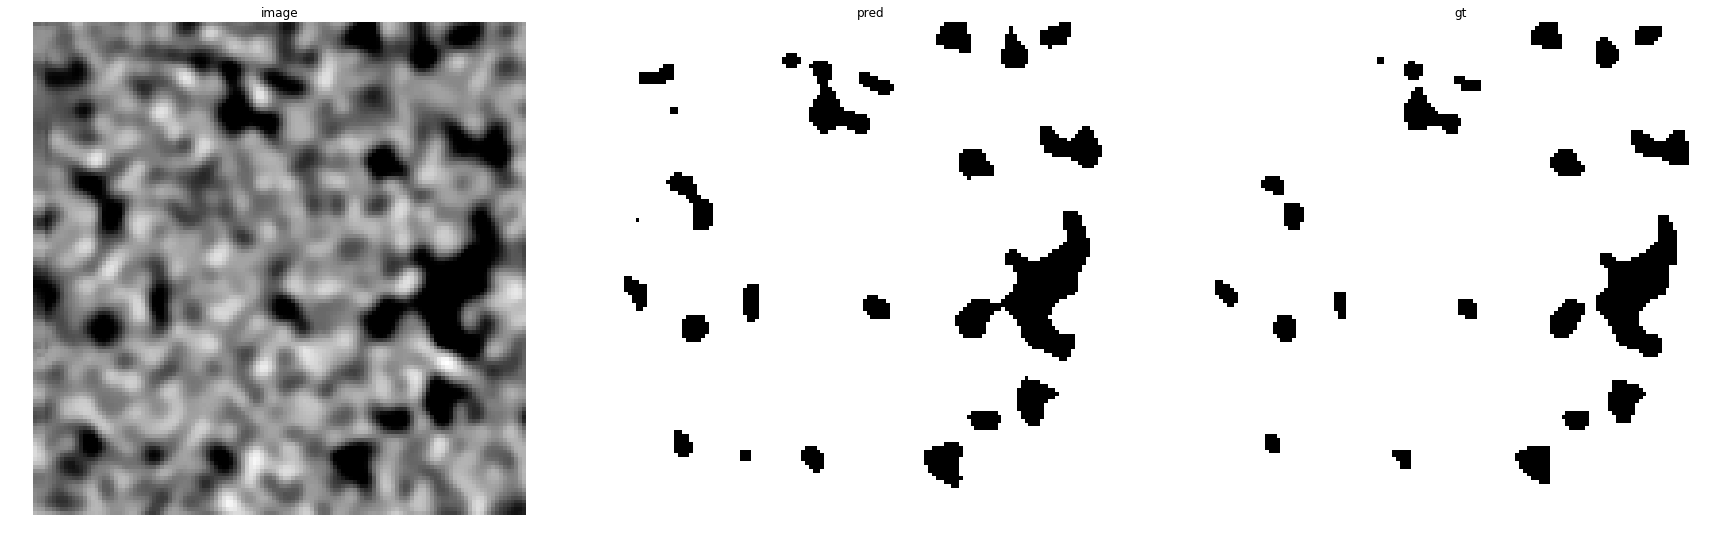

accuracy    : 0.9793701171875
precision   : 0.9998651836872261
recall      : 0.9778495616059067
f1          : 0.988734835355286
pr_auc      : 0.9999305140745144
iou         : 0.9777206512425022


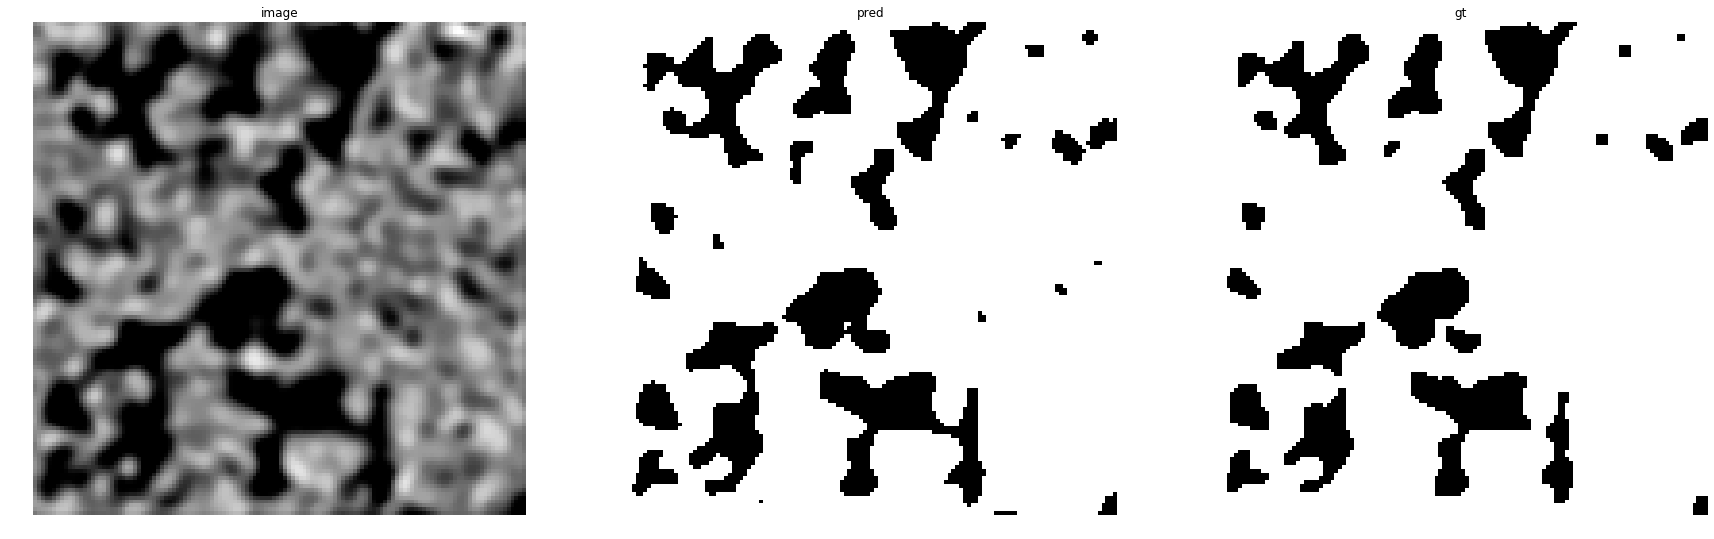

accuracy    : 0.9759521484375
precision   : 0.9998478045810821
recall      : 0.9710294878427315
f1          : 0.9852279544091181
pr_auc      : 0.9997907403915198
iou         : 0.9708859824133599


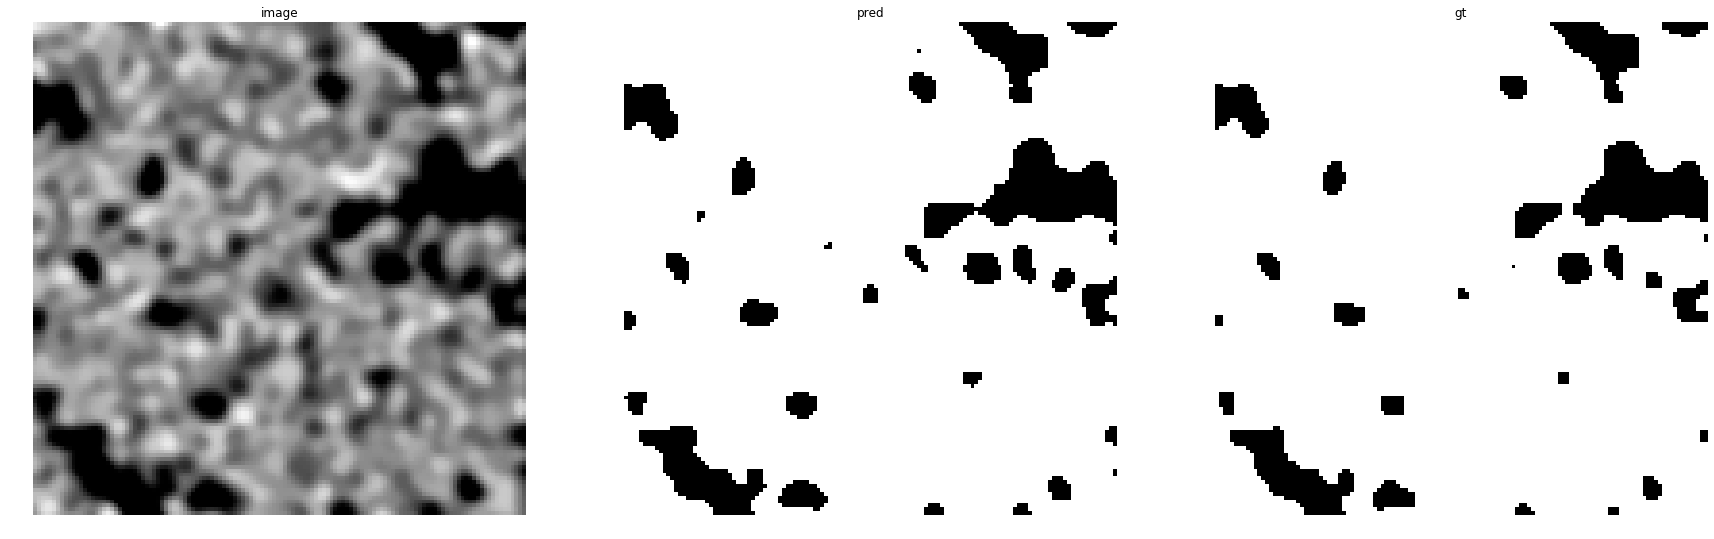

accuracy    : 0.9840087890625
precision   : 0.9996510572963919
recall      : 0.9823743227487827
f1          : 0.9909373919059149
pr_auc      : 0.999941178594804
iou         : 0.9820375702728644


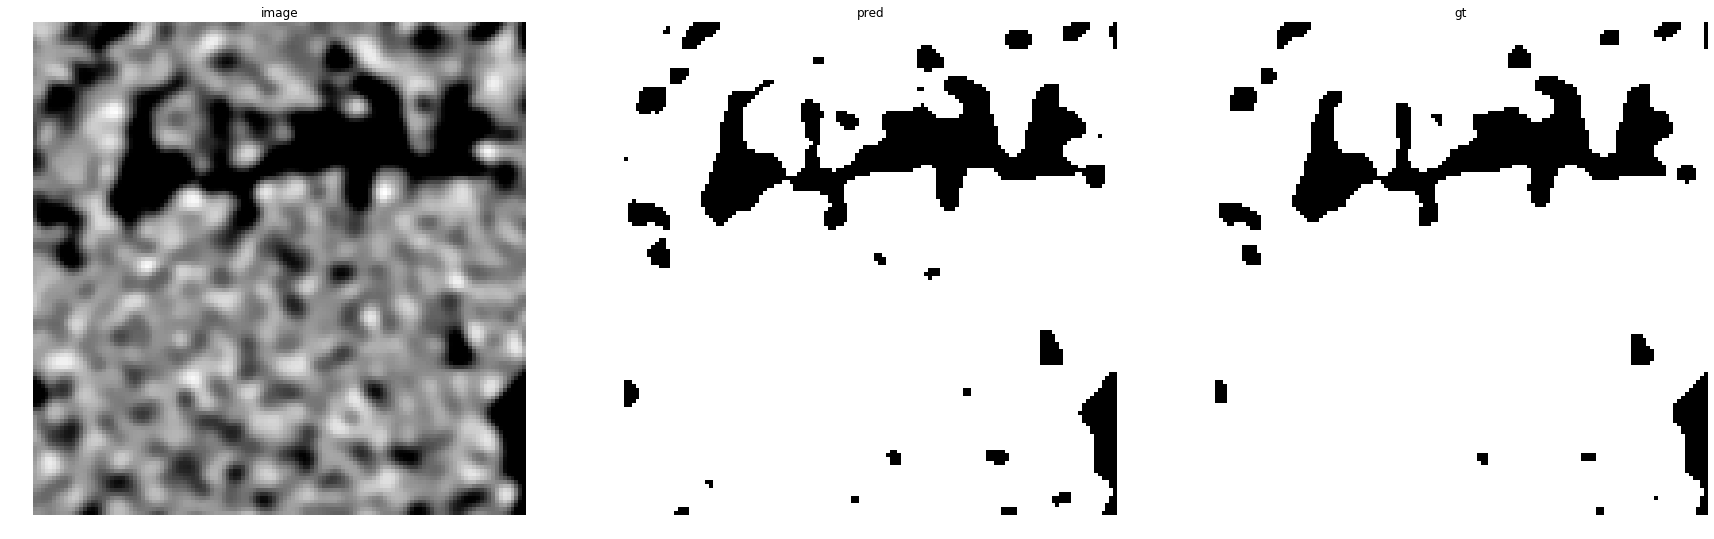

accuracy    : 0.98260498046875
precision   : 0.9997169544296631
recall      : 0.980498299673815
f1          : 0.9900143652990435
pr_auc      : 0.9998978146148954
iou         : 0.9802261846943732


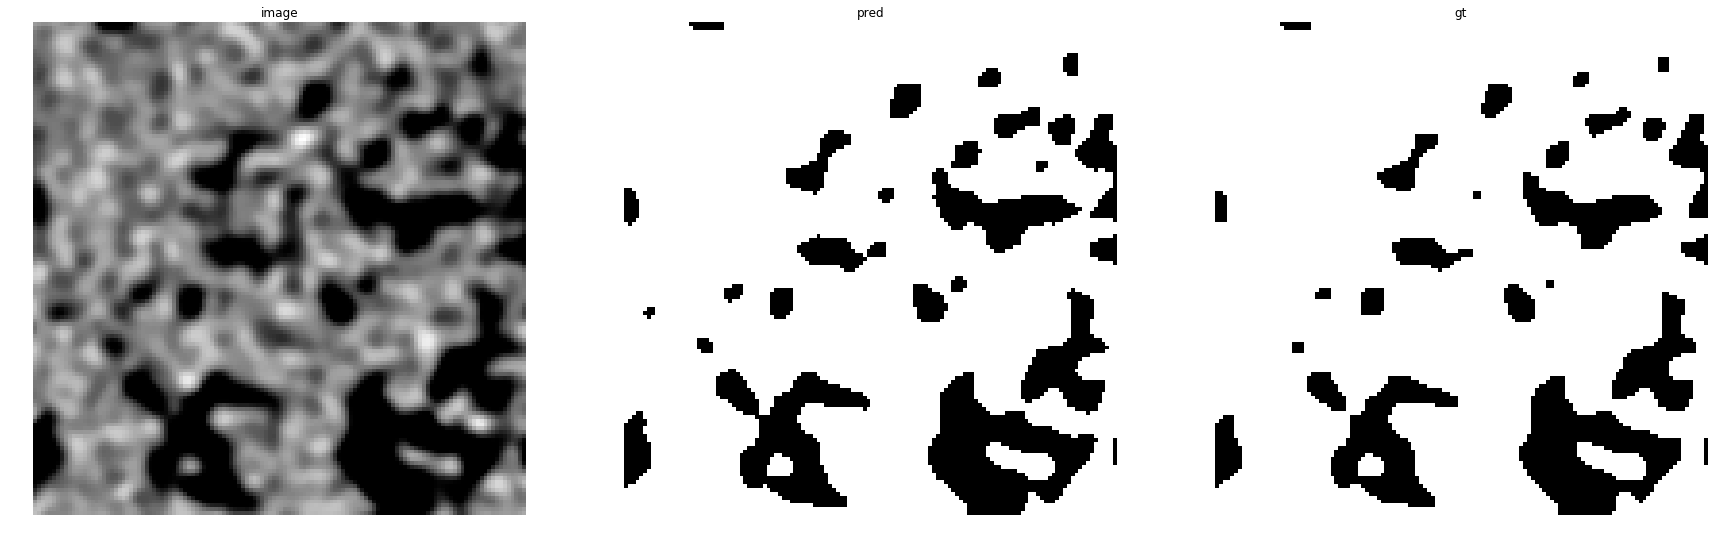

accuracy    : 0.97900390625
precision   : 0.9990945446314042
recall      : 0.9755396743534959
f1          : 0.9871766196973086
pr_auc      : 0.9998455914418444
iou         : 0.9746779536253221


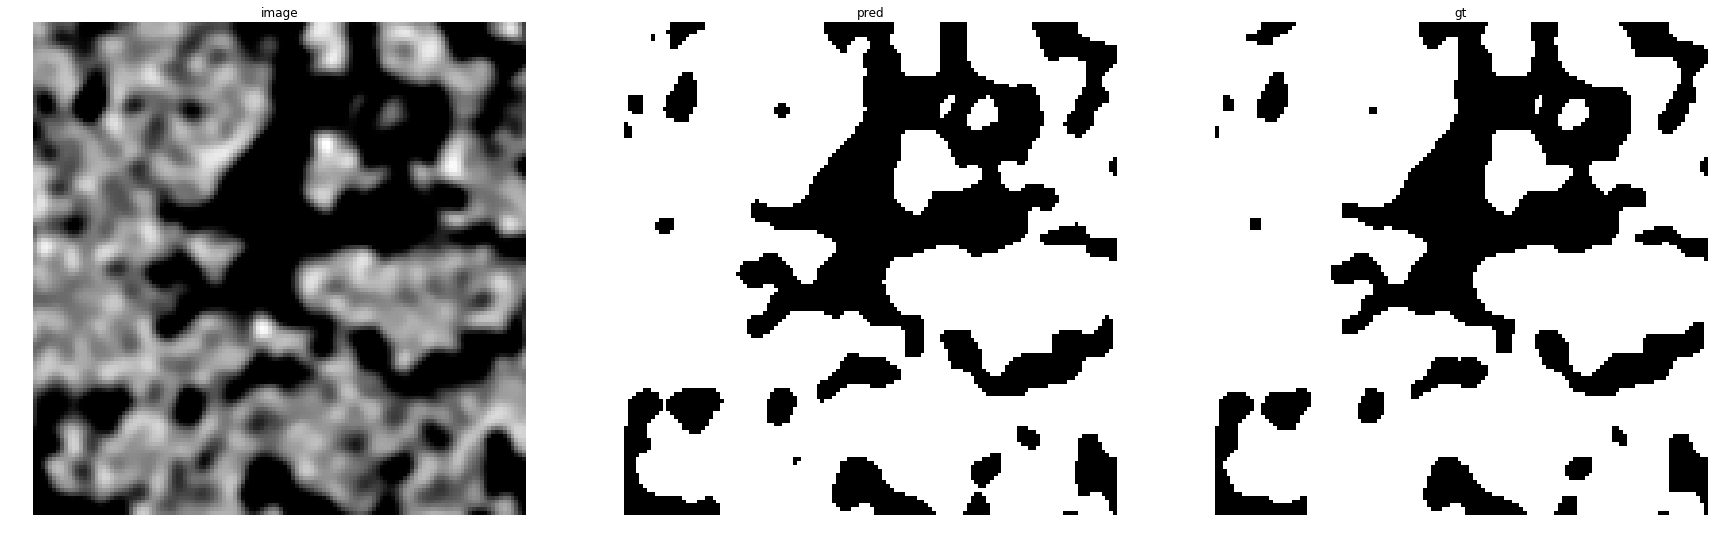

accuracy    : 0.97564697265625
precision   : 0.9975511631974812
recall      : 0.9684979196739407
f1          : 0.982809874628409
pr_auc      : 0.9996641484513107
iou         : 0.9662007623888182


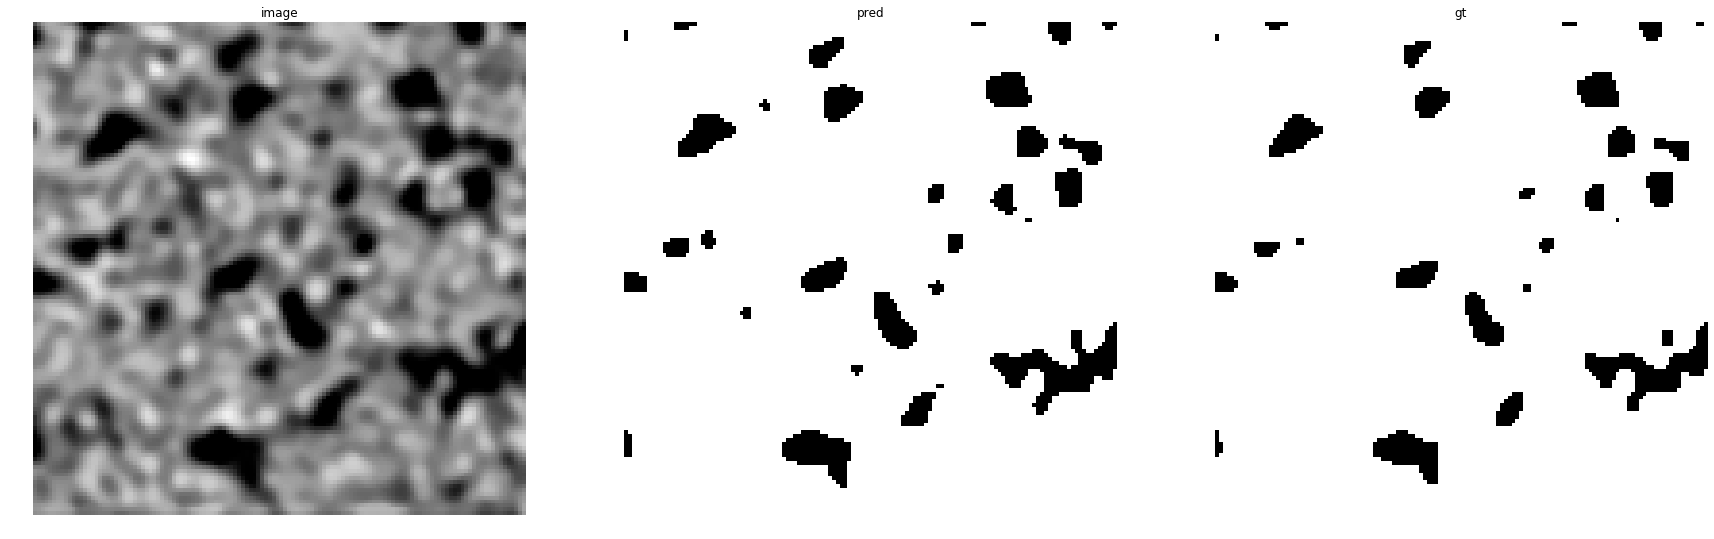

accuracy    : 0.9849853515625
precision   : 1.0
recall      : 0.98386567849413
f1          : 0.9918672308912986
pr_auc      : 0.9999621779772716
iou         : 0.98386567849413


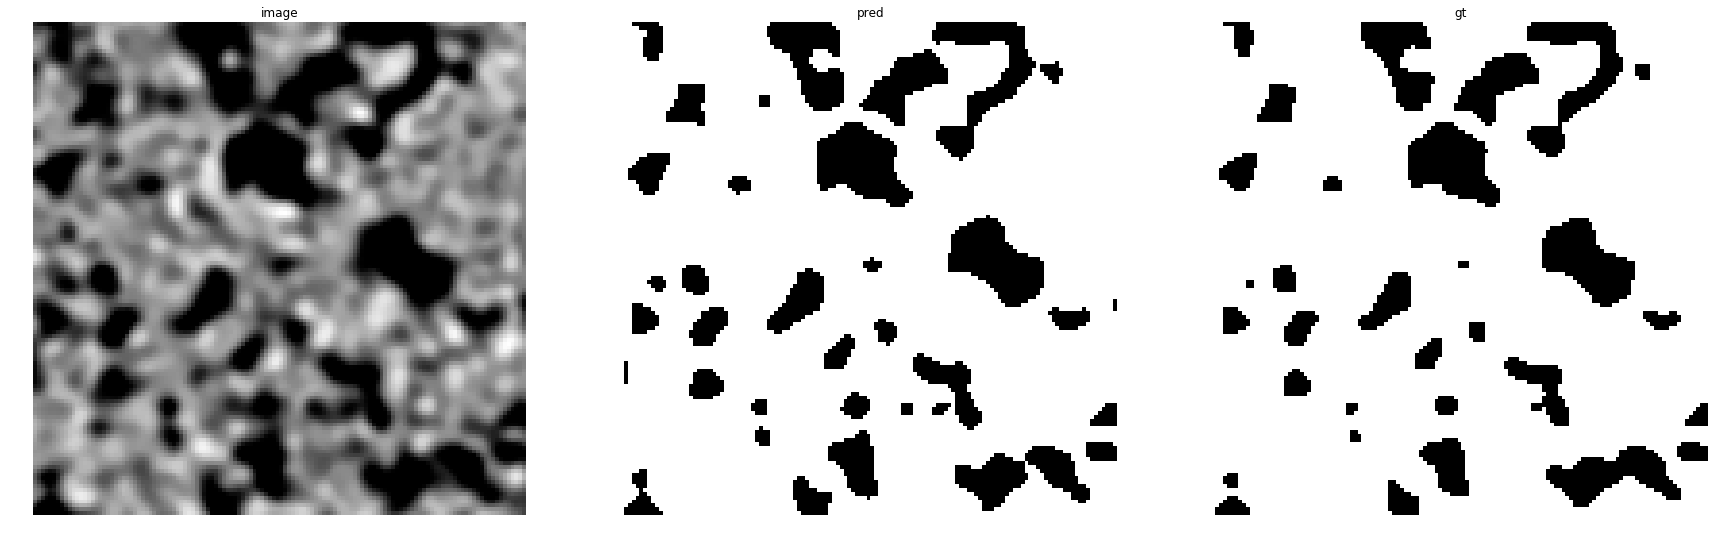

accuracy    : 0.97491455078125
precision   : 0.9983383685800604
recall      : 0.9714117733519512
f1          : 0.9846910269303832
pr_auc      : 0.9997599114849842
iou         : 0.9698437156064275


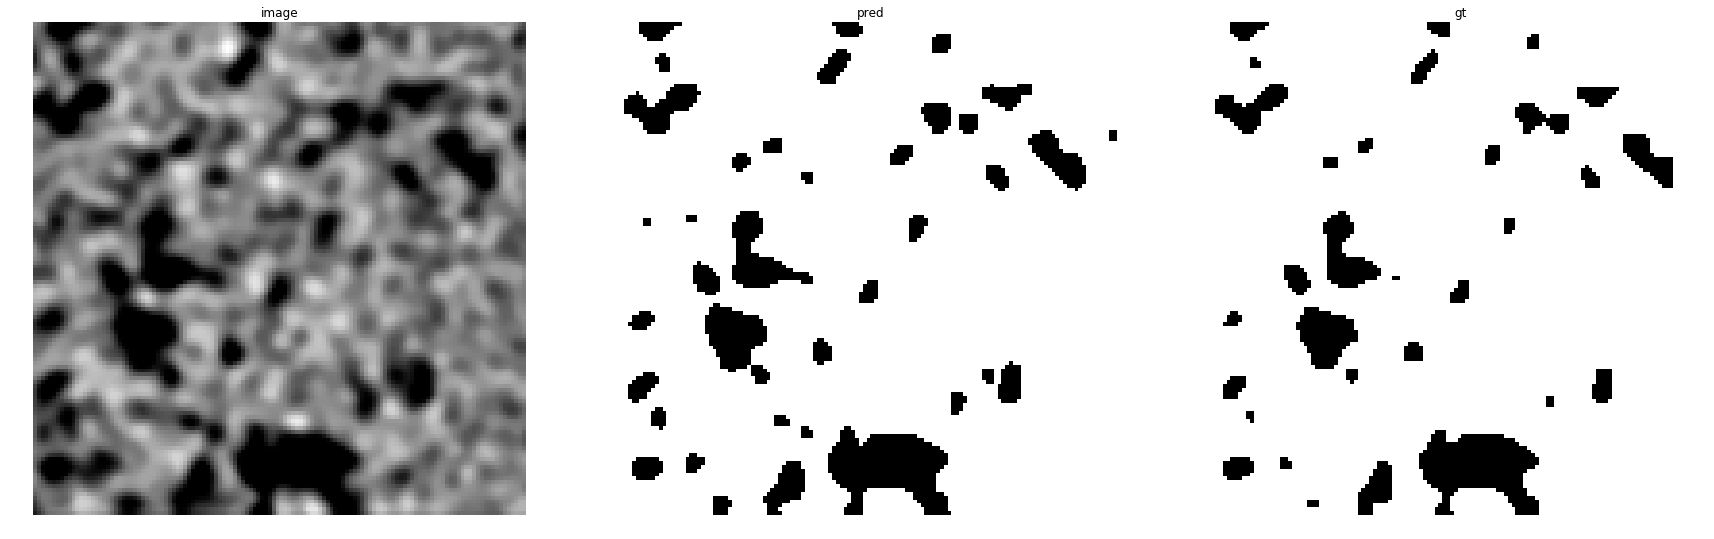

accuracy    : 0.974853515625
precision   : 0.9993749565942079
recall      : 0.9727573852497803
f1          : 0.985886544258701
pr_auc      : 0.999859759854893
iou         : 0.9721659235238481


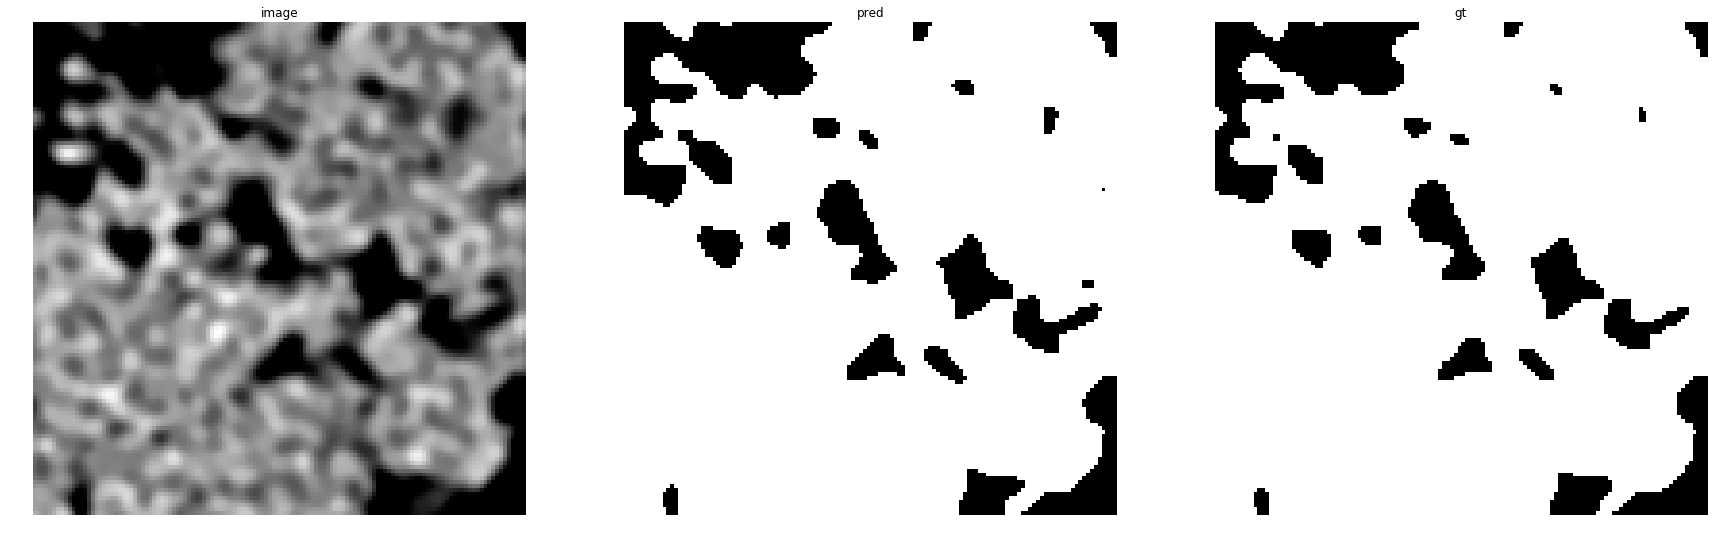

accuracy    : 0.985107421875
precision   : 0.9994135327322043
recall      : 0.9829836325618285
f1          : 0.991130498000727
pr_auc      : 0.9998950602516689
iou         : 0.9824169489082655


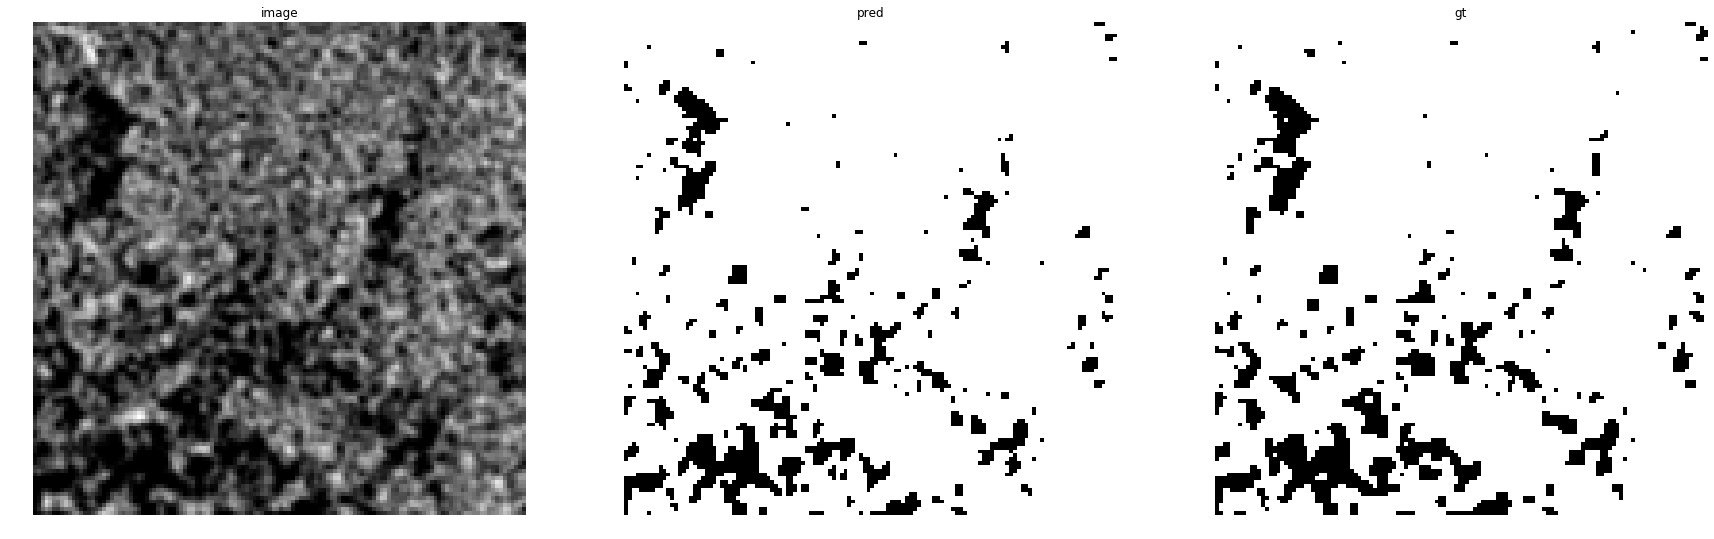

accuracy    : 0.9791259765625
precision   : 0.9779132791327914
recall      : 0.9988927335640139
f1          : 0.9882916809311879
pr_auc      : 0.9997118441003696
iou         : 0.9768543584190579


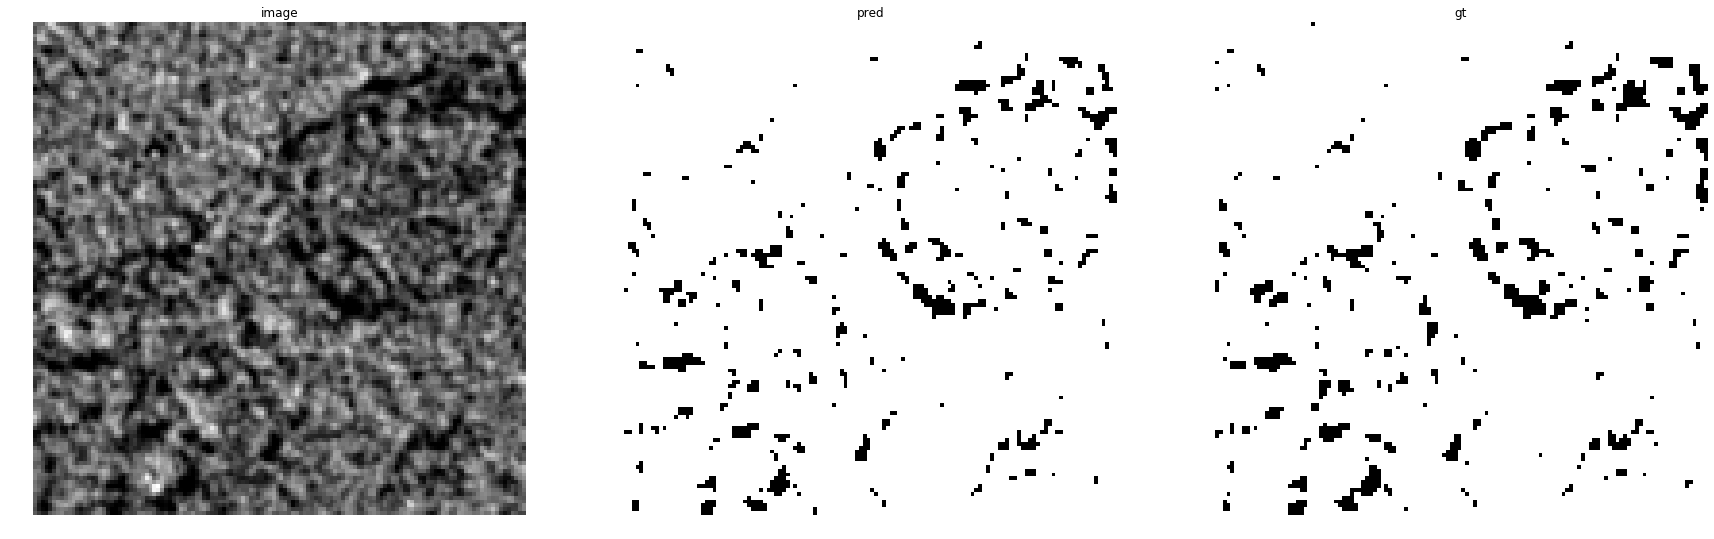

accuracy    : 0.98431396484375
precision   : 0.9852884243128146
recall      : 0.998104451271325
f1          : 0.9916550313342208
pr_auc      : 0.9997988661049899
iou         : 0.9834481870290461


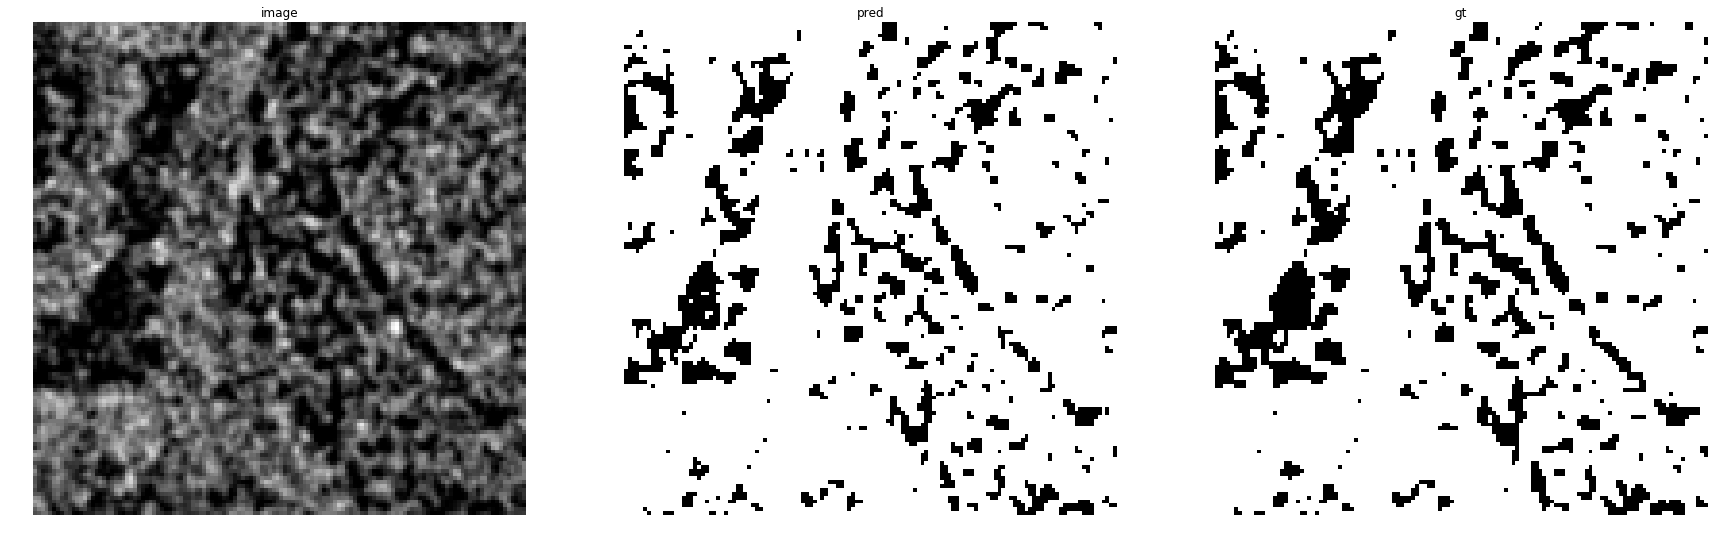

accuracy    : 0.967529296875
precision   : 0.9636951833213515
recall      : 0.9979898749255509
f1          : 0.980542754736303
pr_auc      : 0.9992590762661793
iou         : 0.9618282270215972


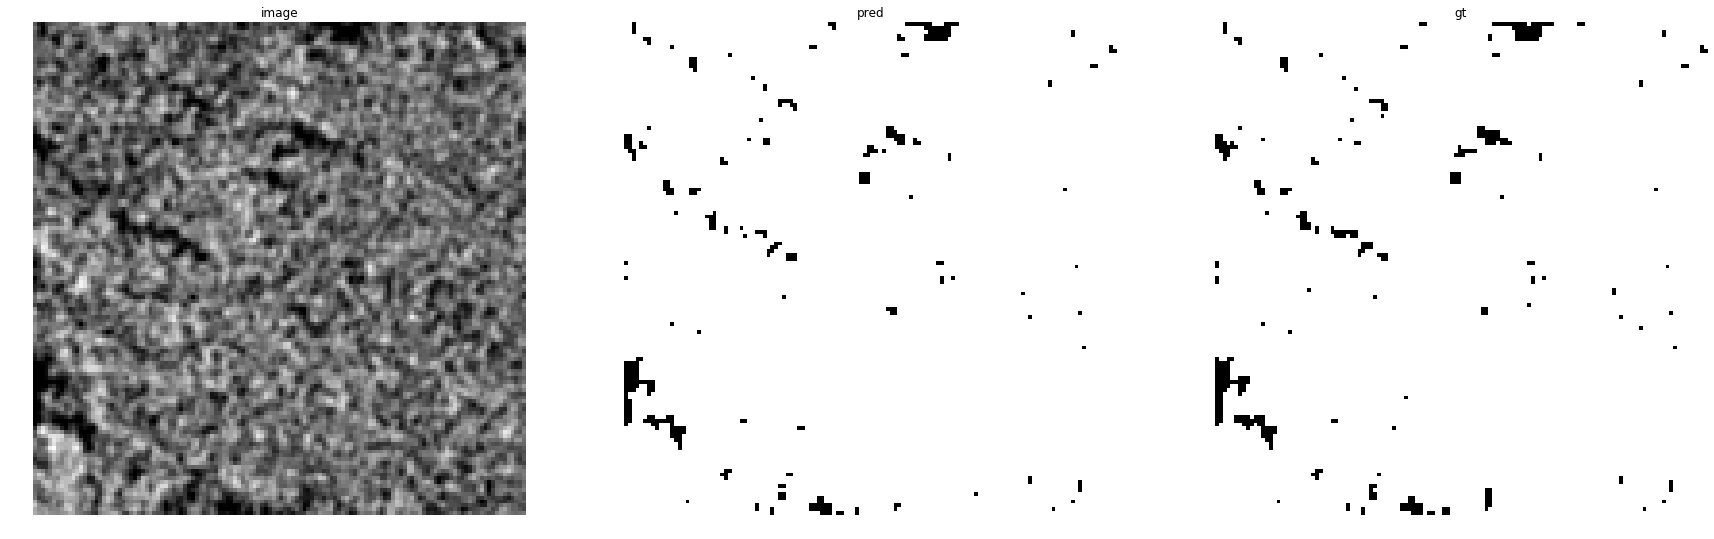

accuracy    : 0.9949951171875
precision   : 0.9957574245071126
recall      : 0.9991235758106923
f1          : 0.9974376601462409
pr_auc      : 0.9999554750787822
iou         : 0.9948884179030046


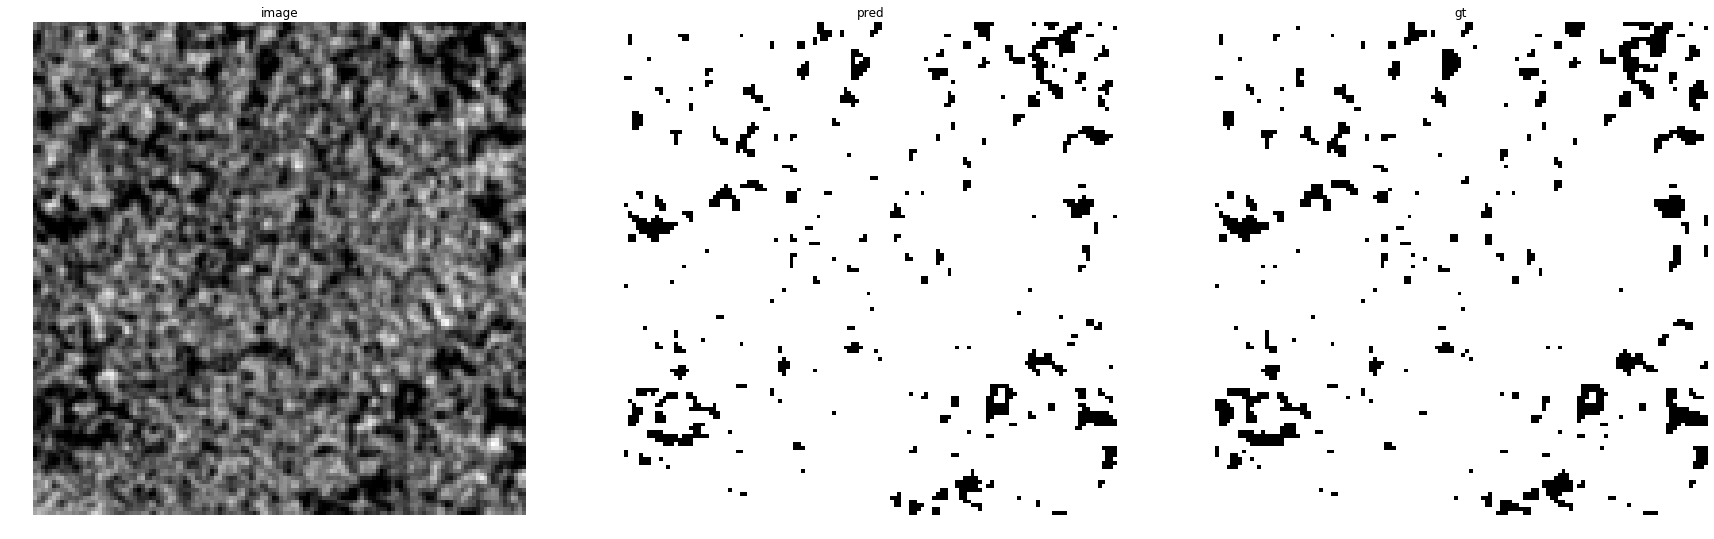

accuracy    : 0.98370361328125
precision   : 0.9845952146837103
recall      : 0.9978740366728674
f1          : 0.9911901540898141
pr_auc      : 0.9997111619429184
iou         : 0.9825341793680905


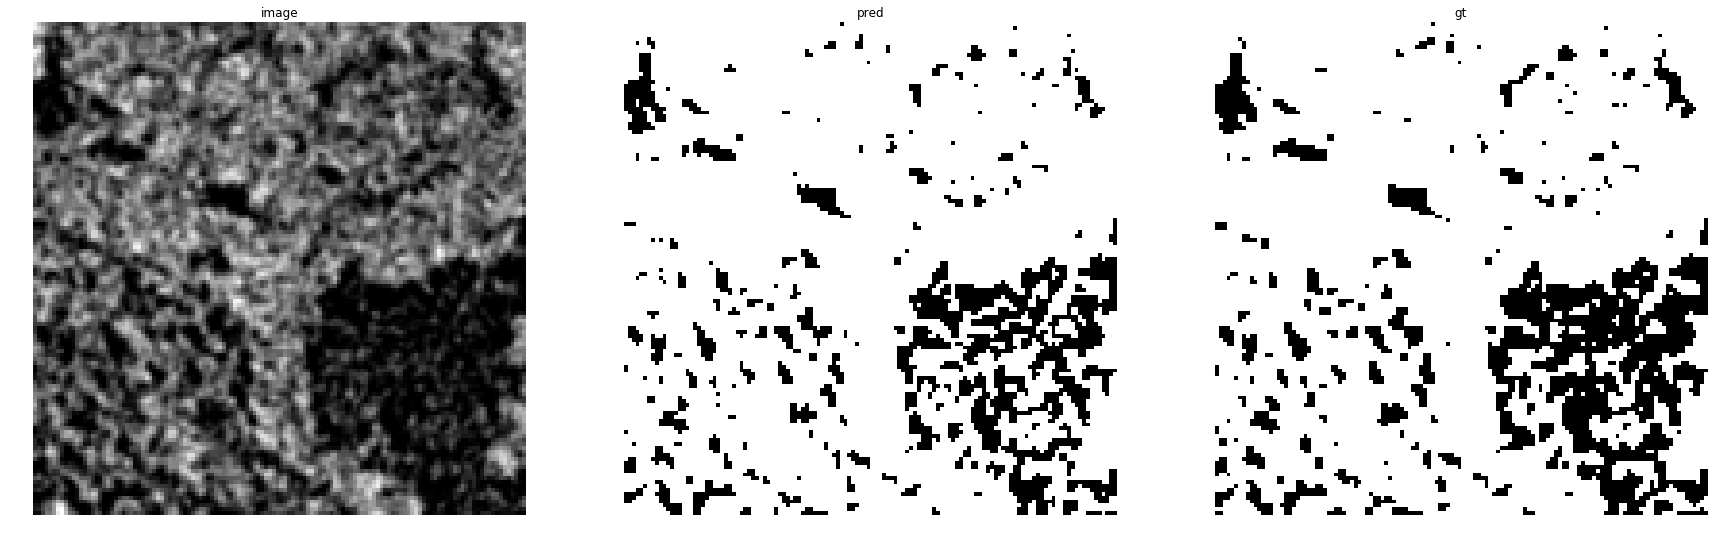

accuracy    : 0.9605712890625
precision   : 0.9556820638466528
recall      : 0.9976679455352441
f1          : 0.9762237762237762
pr_auc      : 0.9991063454805831
iou         : 0.953551912568306


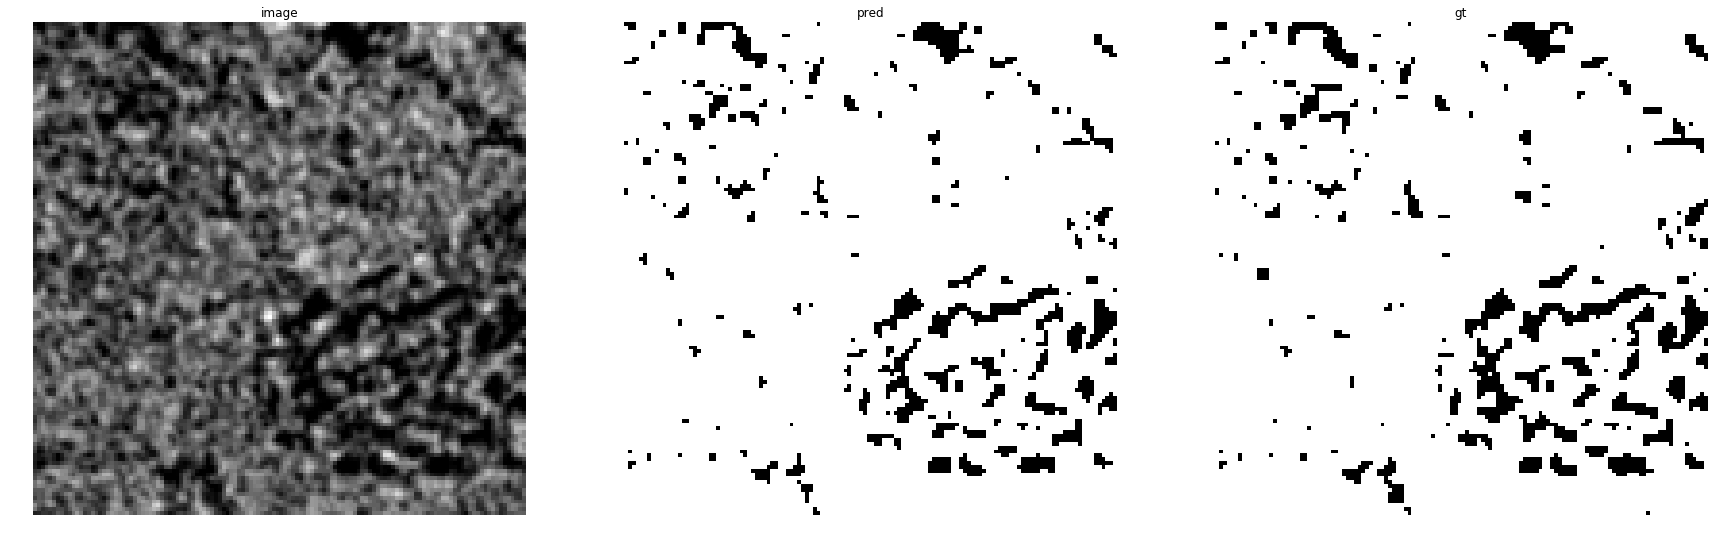

accuracy    : 0.98065185546875
precision   : 0.9807024572649573
recall      : 0.9980971797485559
f1          : 0.9893233639823515
pr_auc      : 0.9996678900624669
iou         : 0.978872300719808


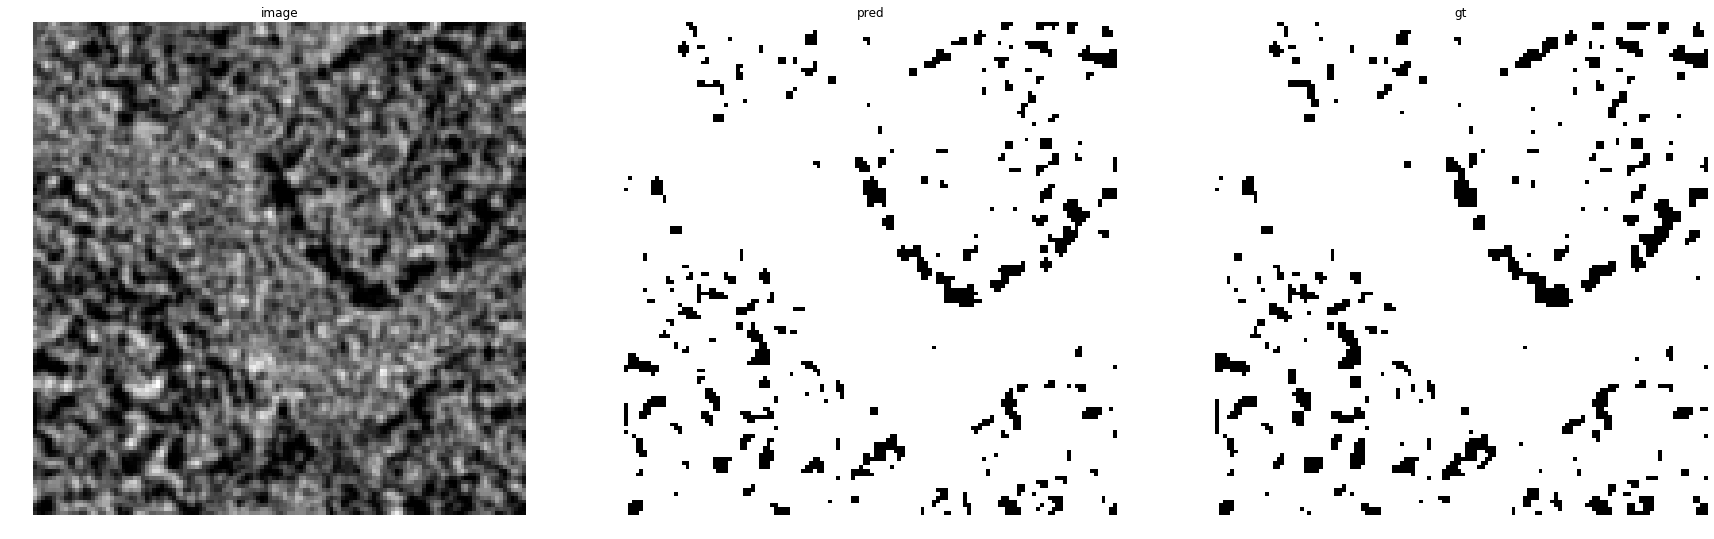

accuracy    : 0.983154296875
precision   : 0.9830060173246049
recall      : 0.9987235471951629
f1          : 0.9908024526792854
pr_auc      : 0.9997242048496281
iou         : 0.9817725531633866


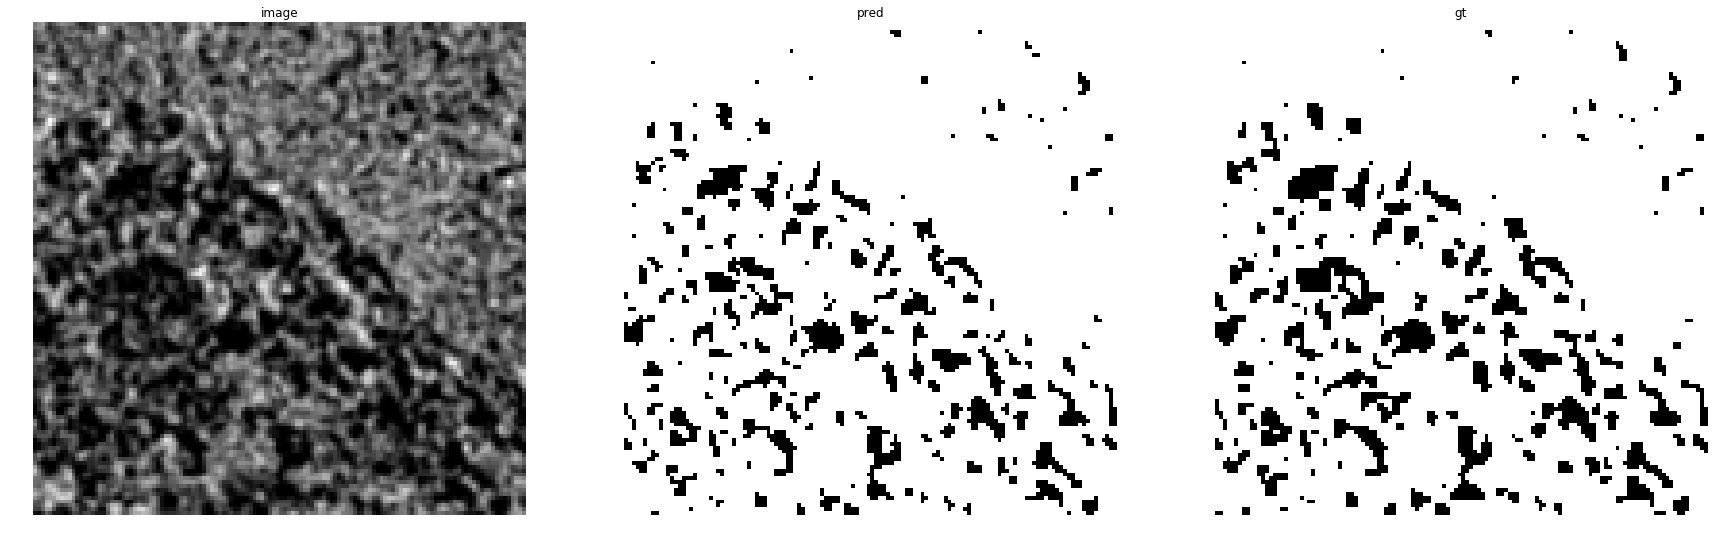

accuracy    : 0.97393798828125
precision   : 0.9722126218289902
recall      : 0.9982256919801278
f1          : 0.9850474489617257
pr_auc      : 0.9995116870993341
iou         : 0.9705354678443279


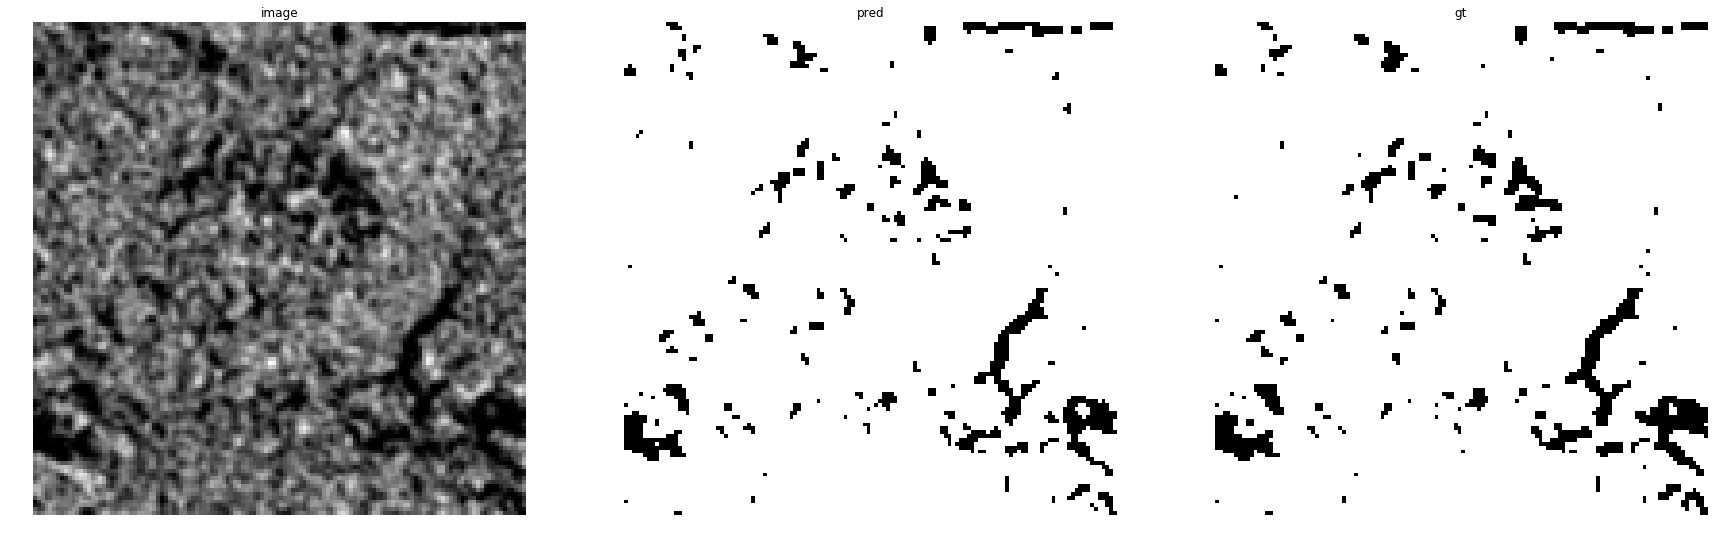

accuracy    : 0.98626708984375
precision   : 0.9866345025427044
recall      : 0.998680129347324
f1          : 0.9926207733429536
pr_auc      : 0.9998671950689576
iou         : 0.9853496549029822


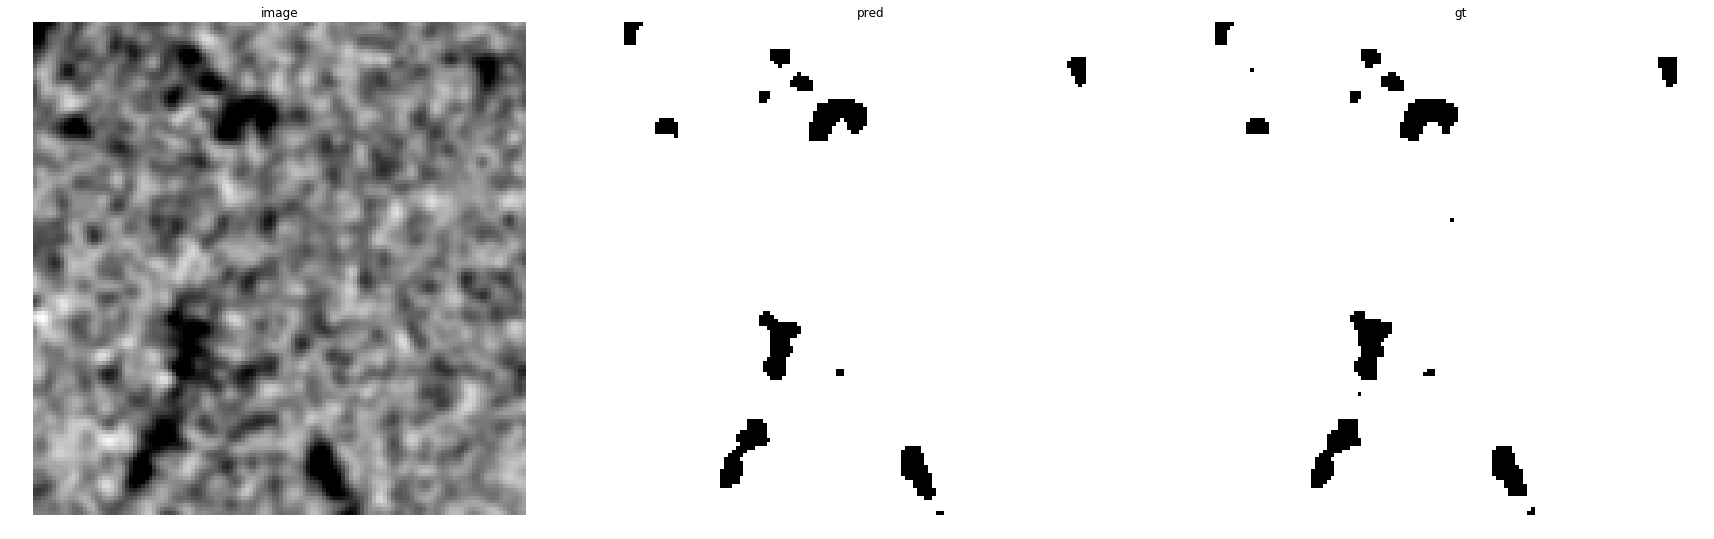

accuracy    : 0.997314453125
precision   : 0.9979199495745351
recall      : 0.9993056870542195
f1          : 0.9986123375804213
pr_auc      : 0.9999934963934283
iou         : 0.9972285210380448


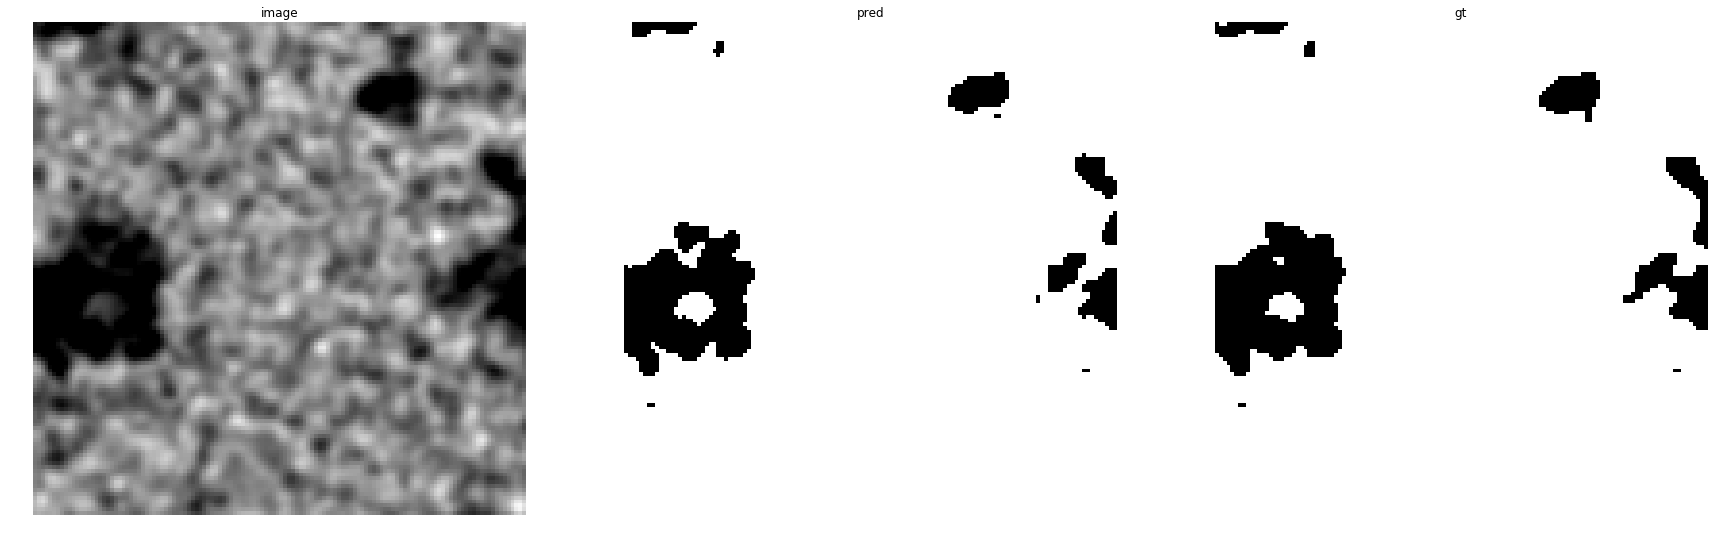

accuracy    : 0.99102783203125
precision   : 0.9909682560765042
recall      : 0.9992633764146521
f1          : 0.9950985295588676
pr_auc      : 0.9999489474318002
iou         : 0.990244873581525


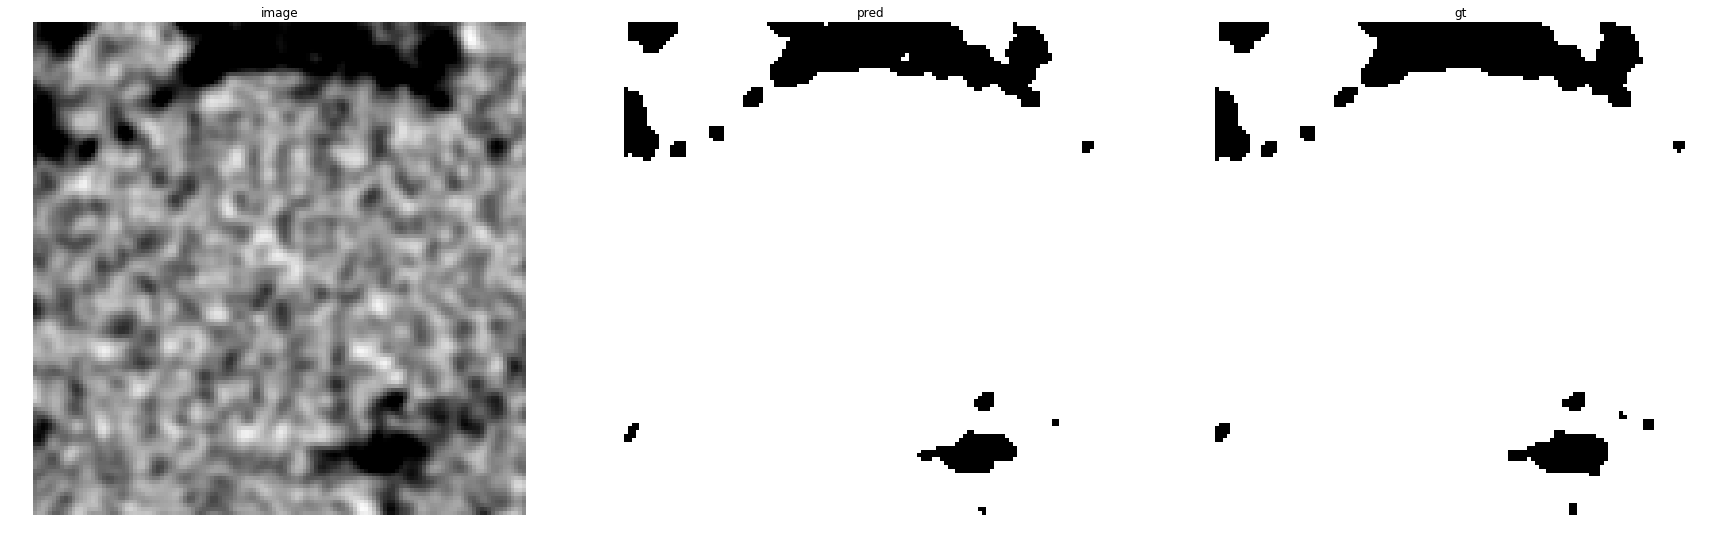

accuracy    : 0.99456787109375
precision   : 0.994592790387183
recall      : 0.9994633393707654
f1          : 0.9970221166393415
pr_auc      : 0.9999738330411545
iou         : 0.9940619161996264


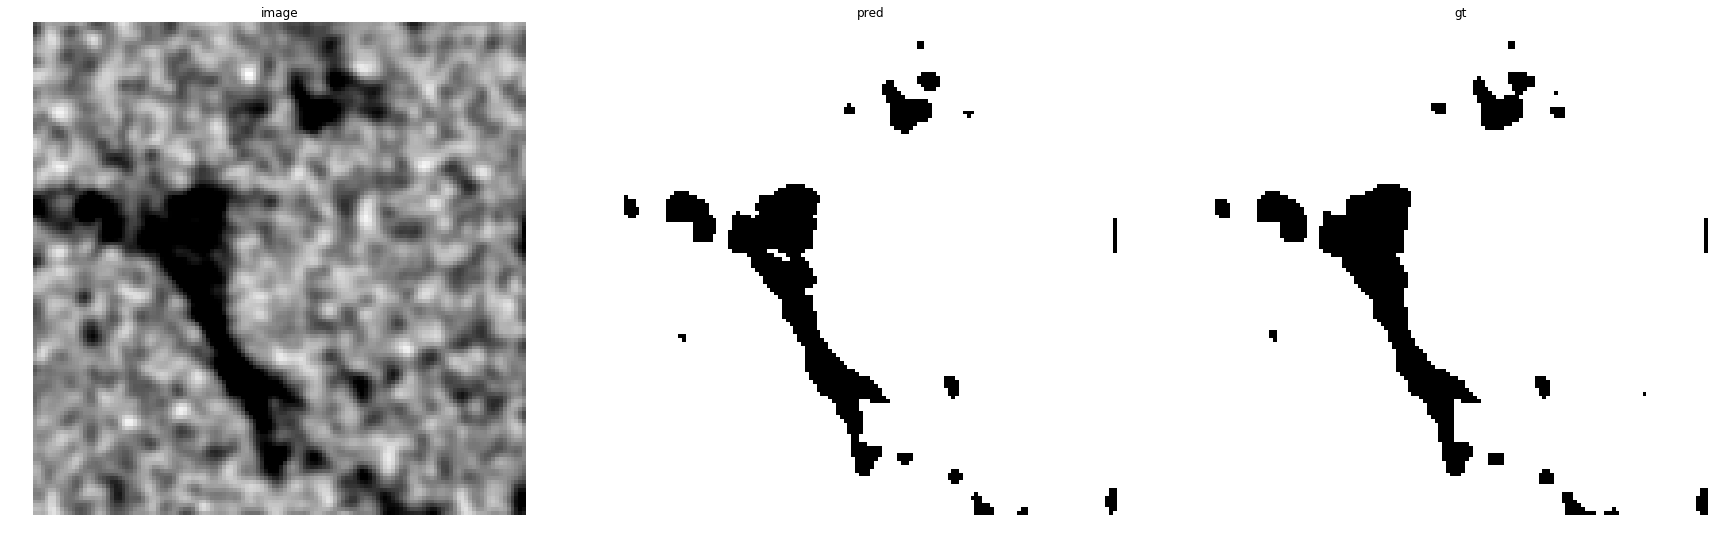

accuracy    : 0.9930419921875
precision   : 0.9934838412426775
recall      : 0.9990072142431663
f1          : 0.996237872087651
pr_auc      : 0.9999660515795181
iou         : 0.9925039452919516


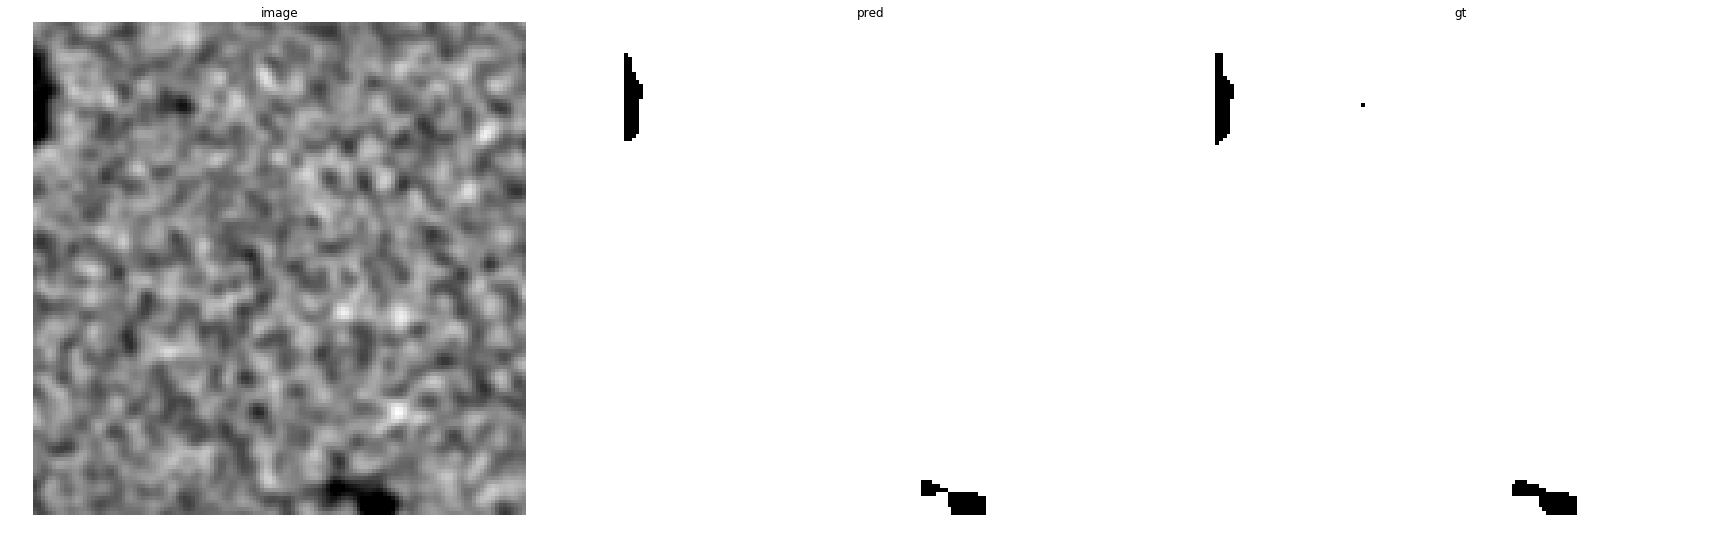

accuracy    : 0.9991455078125
precision   : 0.9993222009982131
recall      : 0.9998150545589051
f1          : 0.9995685670261941
pr_auc      : 0.9999992664930025
iou         : 0.9991375061606703


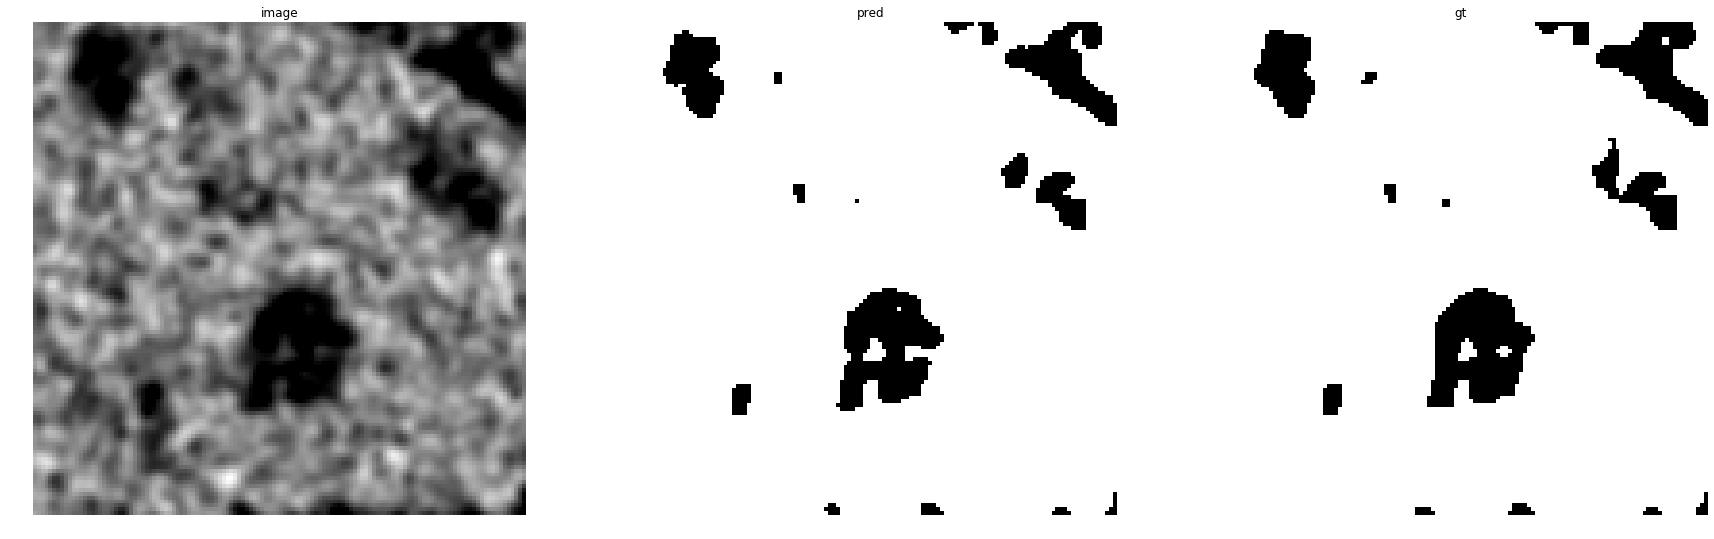

accuracy    : 0.9903564453125
precision   : 0.9905880782324278
recall      : 0.9988557582284445
f1          : 0.9947047389235205
pr_auc      : 0.9999029803093897
iou         : 0.989465262034938


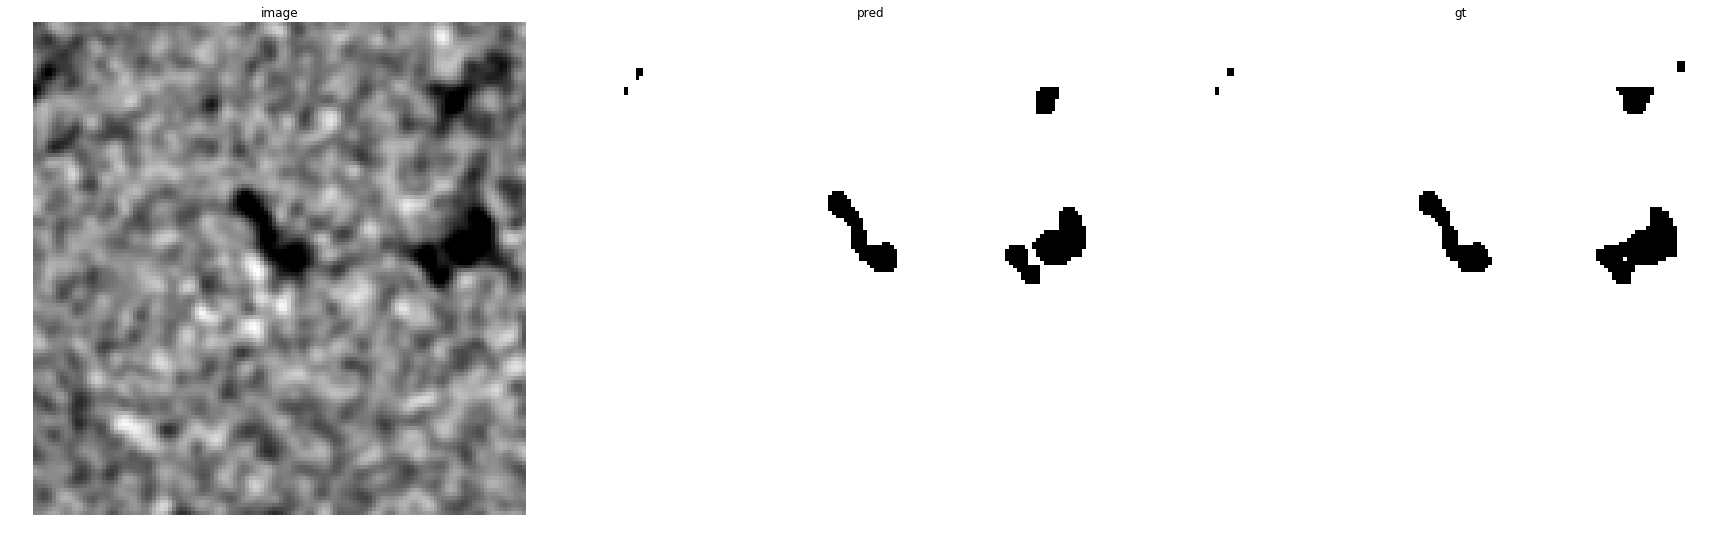

accuracy    : 0.99688720703125
precision   : 0.9972534332084894
recall      : 0.9995620346618282
f1          : 0.9984063994000563
pr_auc      : 0.9999910738208827
iou         : 0.9968178698446372


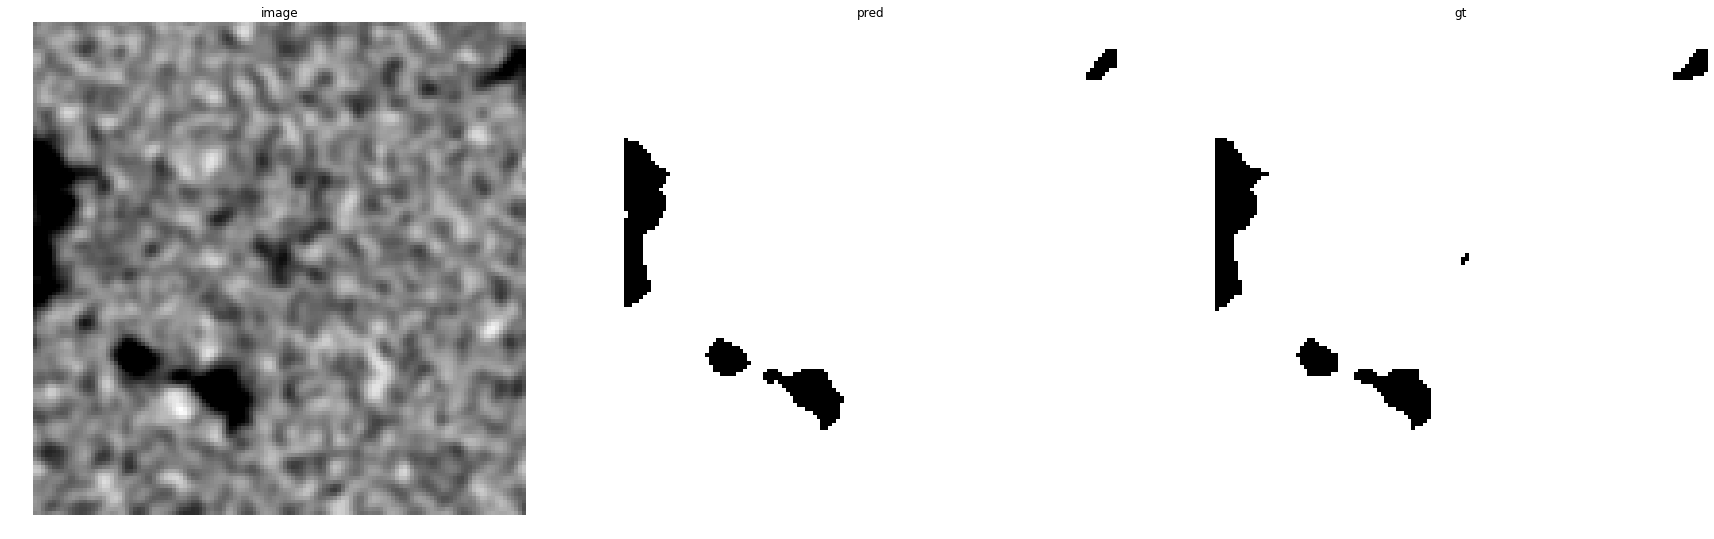

accuracy    : 0.997314453125
precision   : 0.9979099372981189
recall      : 0.9993023403310712
f1          : 0.9986056534415009
pr_auc      : 0.999994704305877
iou         : 0.9972151898734177


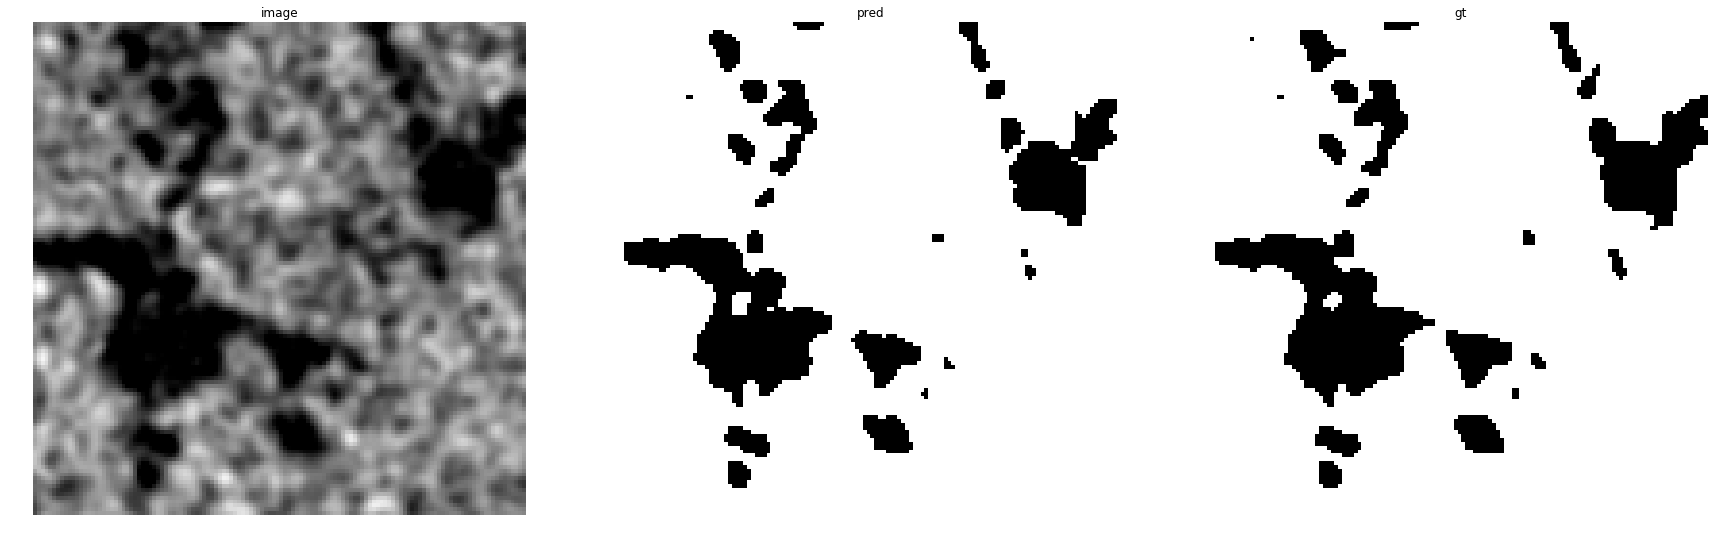

accuracy    : 0.9854736328125
precision   : 0.984750691538407
recall      : 0.9983461566117783
f1          : 0.9915018210383488
pr_auc      : 0.9998061851244993
iou         : 0.9831468630505594


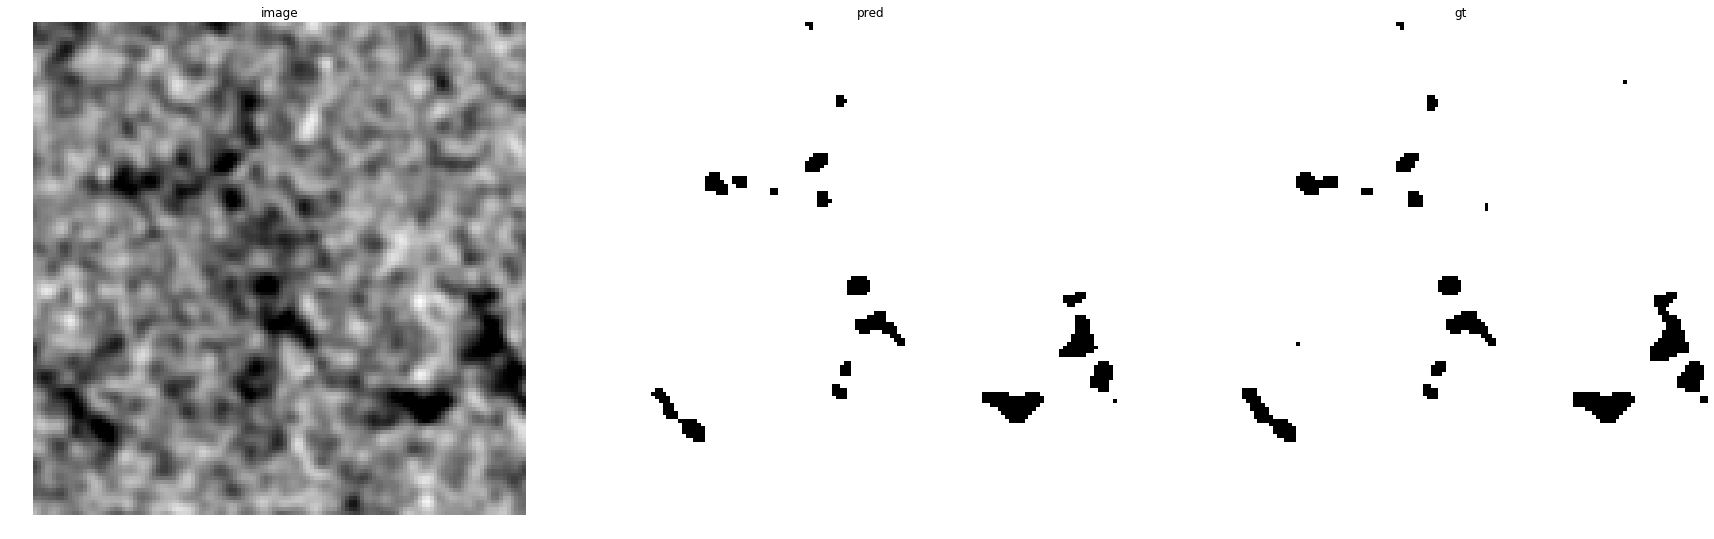

accuracy    : 0.99554443359375
precision   : 0.9956071540633825
recall      : 0.9998109402571213
f1          : 0.9977046190610949
pr_auc      : 0.9999820971251967
iou         : 0.9954197515372066


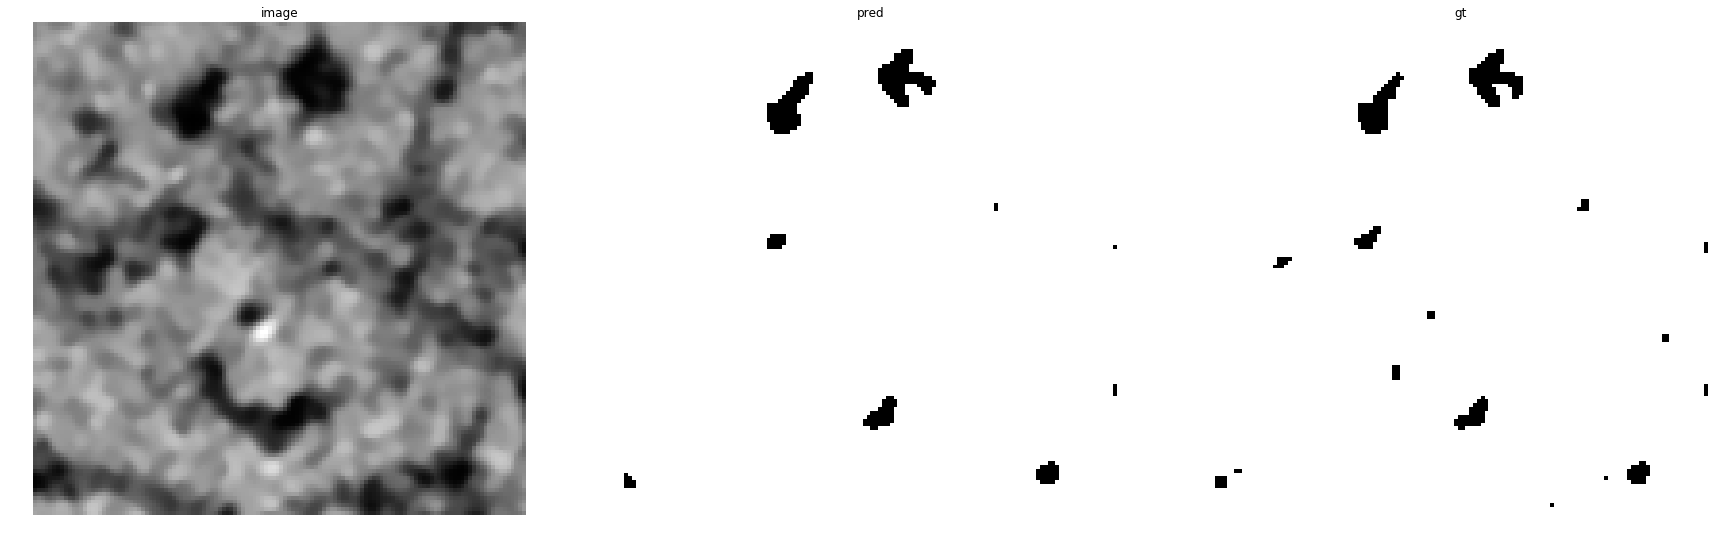

accuracy    : 0.995361328125
precision   : 0.9968876439464674
recall      : 0.9983791534193629
f1          : 0.9976328412134804
pr_auc      : 0.9999736026584929
iou         : 0.9952768628425828


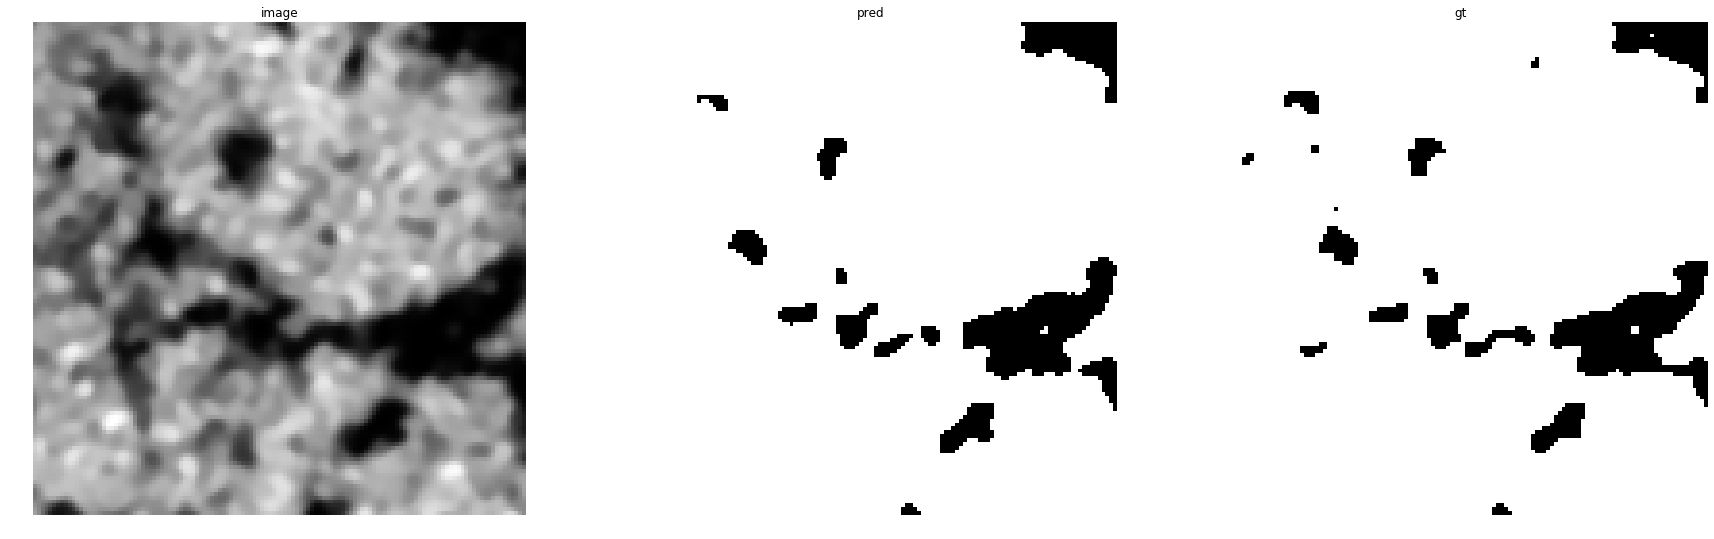

accuracy    : 0.98974609375
precision   : 0.9932212401143085
recall      : 0.9956032243021784
f1          : 0.9944108057755007
pr_auc      : 0.9998902070528738
iou         : 0.9888837424733673


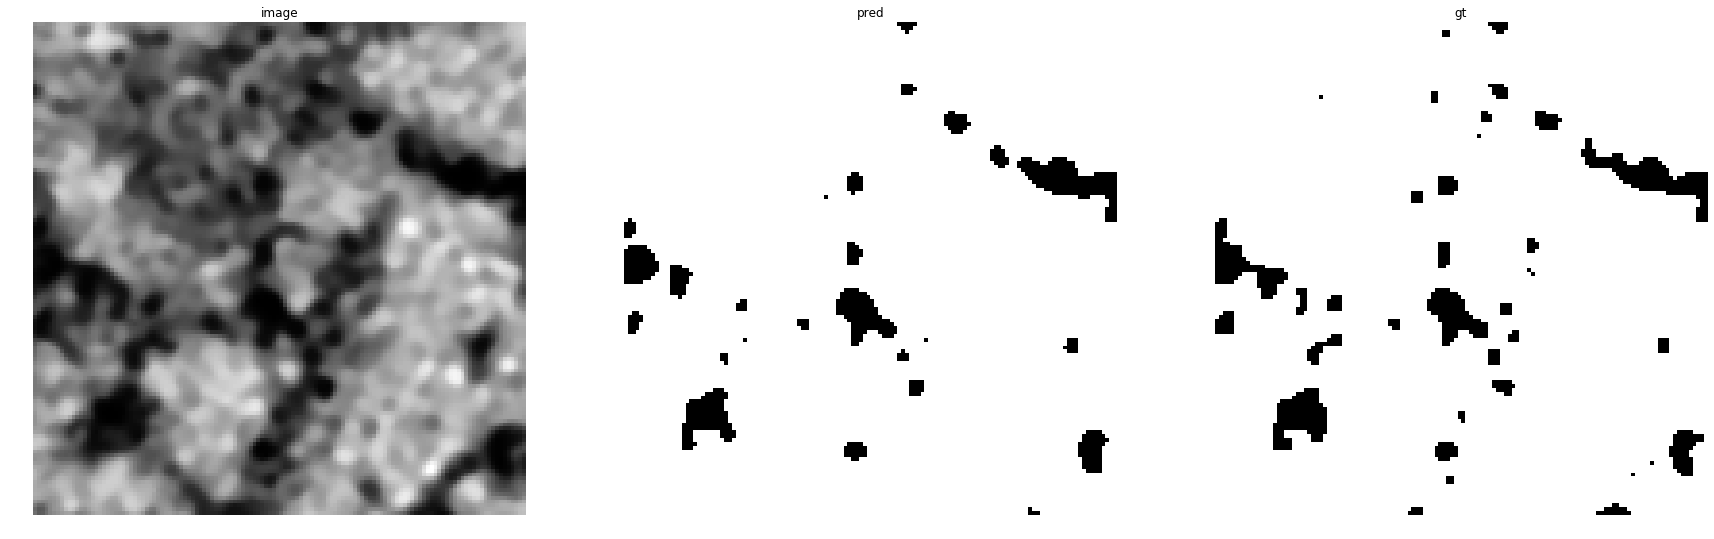

accuracy    : 0.982666015625
precision   : 0.9842322049169777
recall      : 0.9974563005478737
f1          : 0.9908001295756397
pr_auc      : 0.9997066376256036
iou         : 0.9817679912691789


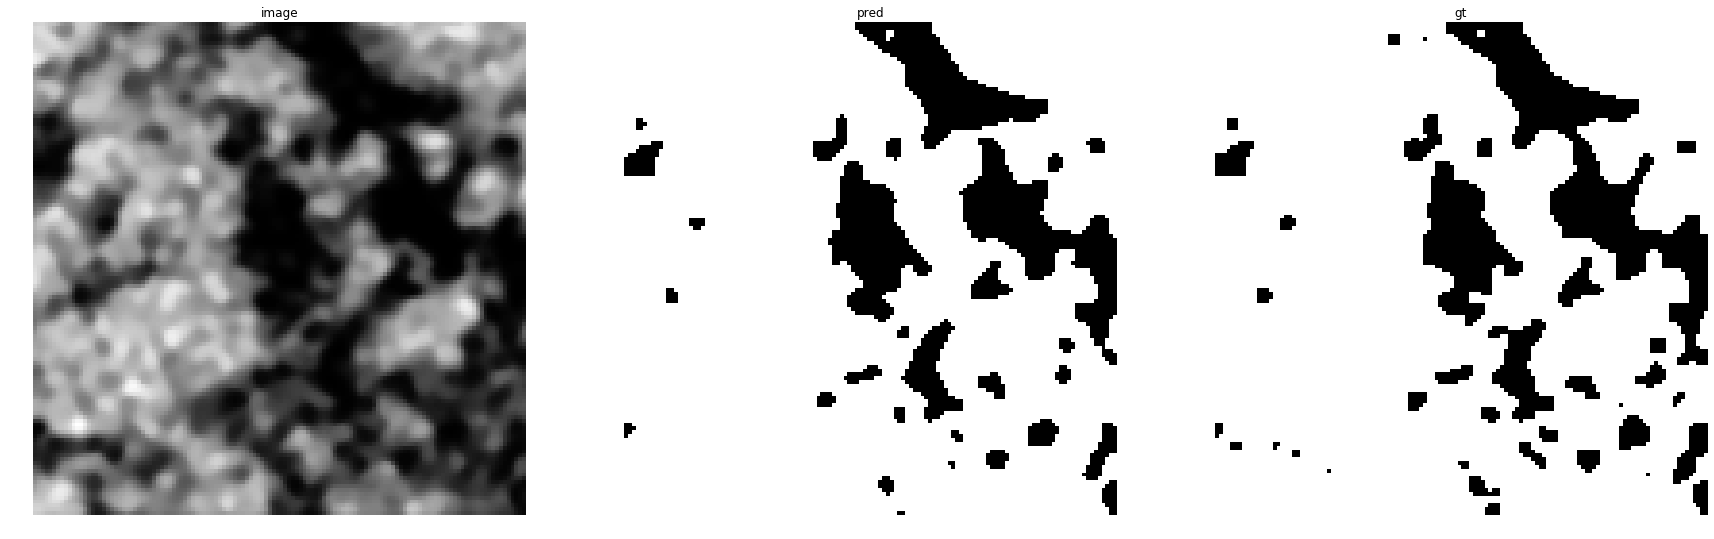

accuracy    : 0.9783935546875
precision   : 0.97871406627167
recall      : 0.9953135460834636
f1          : 0.9869440141624254
pr_auc      : 0.9991586111839209
iou         : 0.9742245522062036


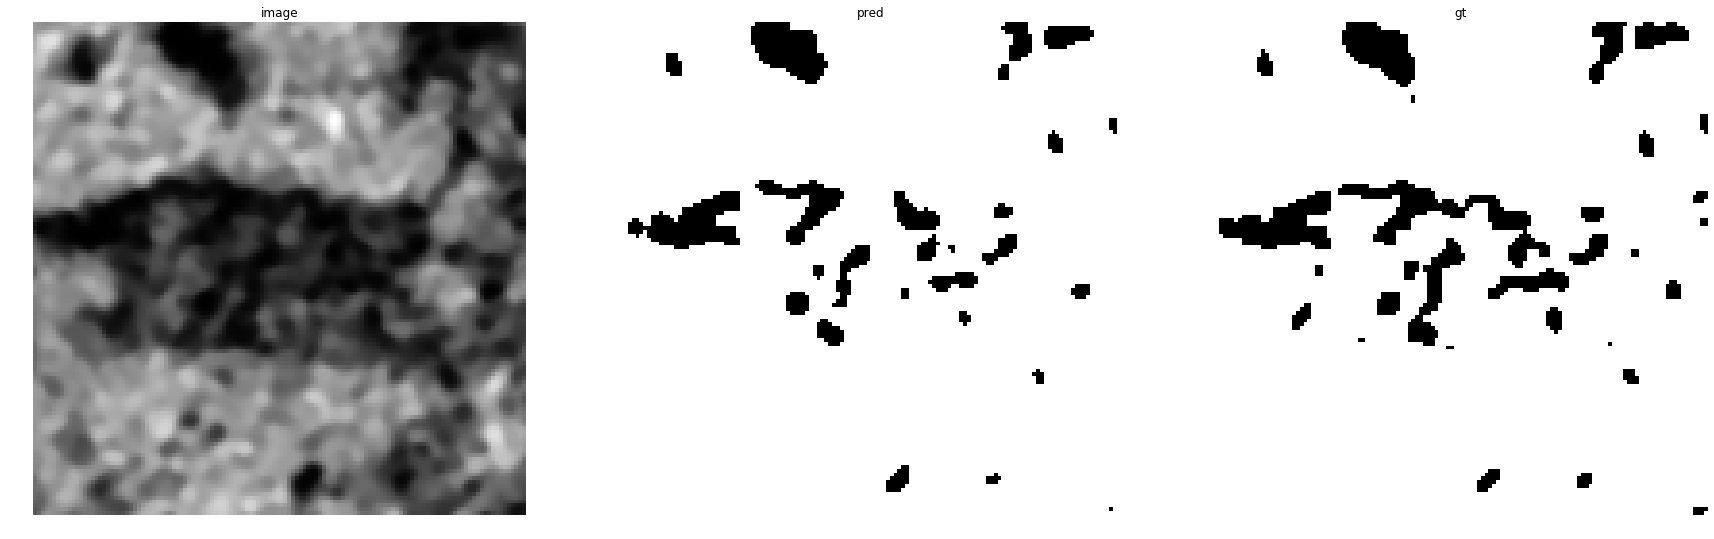

accuracy    : 0.9761962890625
precision   : 0.9773699098743504
recall      : 0.9969133731463464
f1          : 0.9870449109752857
pr_auc      : 0.9995243663825213
iou         : 0.9744211976126451


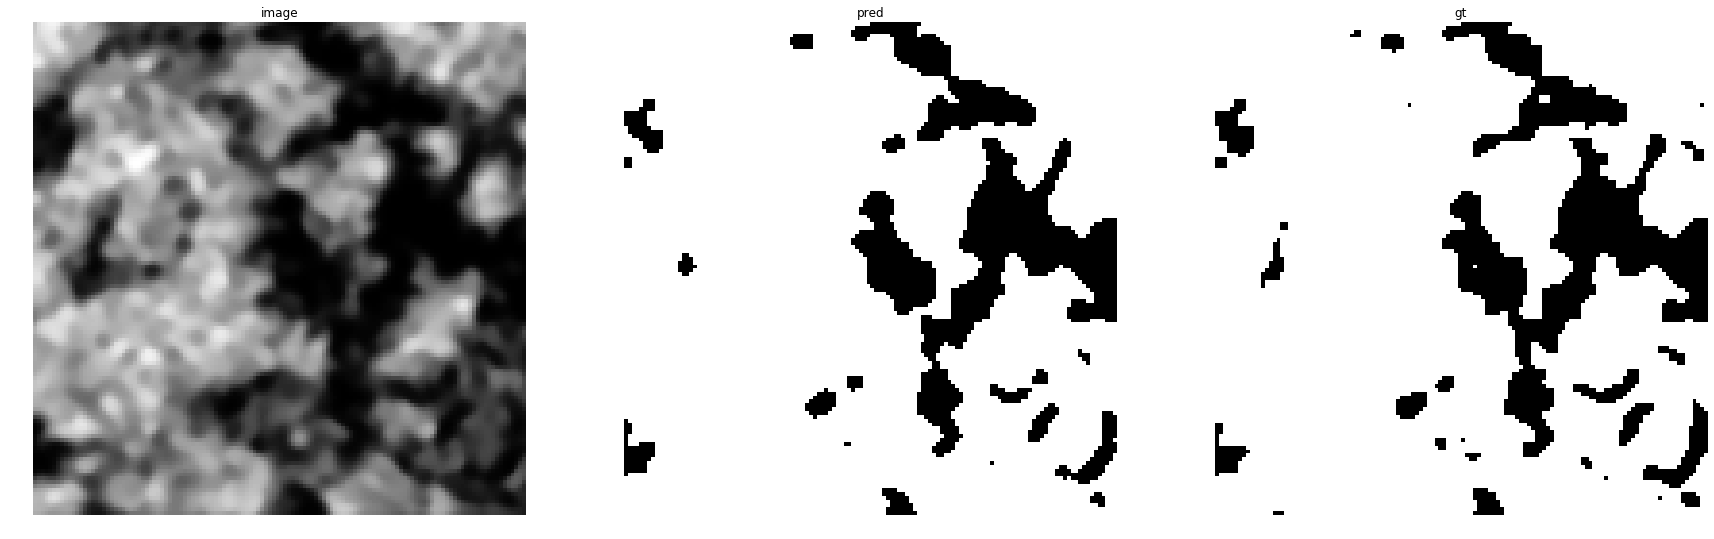

accuracy    : 0.9776611328125
precision   : 0.9795799299883314
recall      : 0.9936381121467672
f1          : 0.986558942343004
pr_auc      : 0.9992942421609609
iou         : 0.9734744165821133


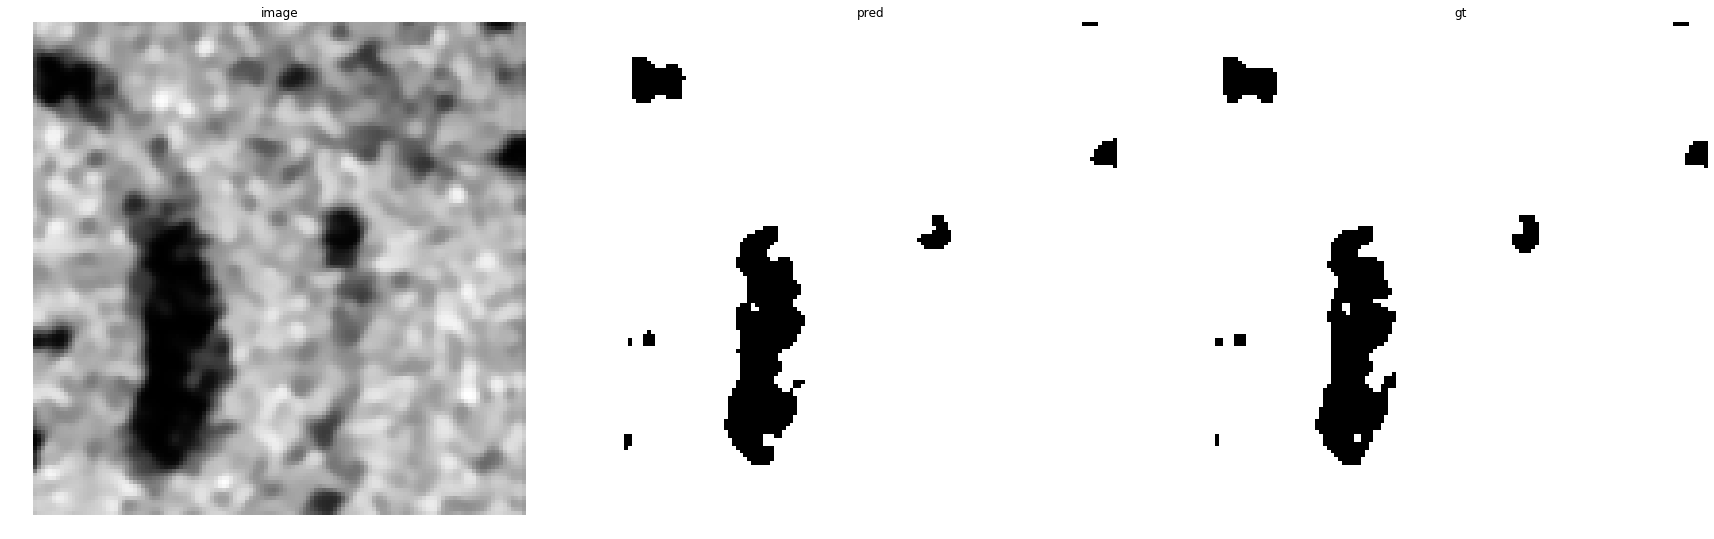

accuracy    : 0.99462890625
precision   : 0.9968768299824322
recall      : 0.9973960028643969
f1          : 0.9971363488447771
pr_auc      : 0.9999741217843758
iou         : 0.9942890518528132


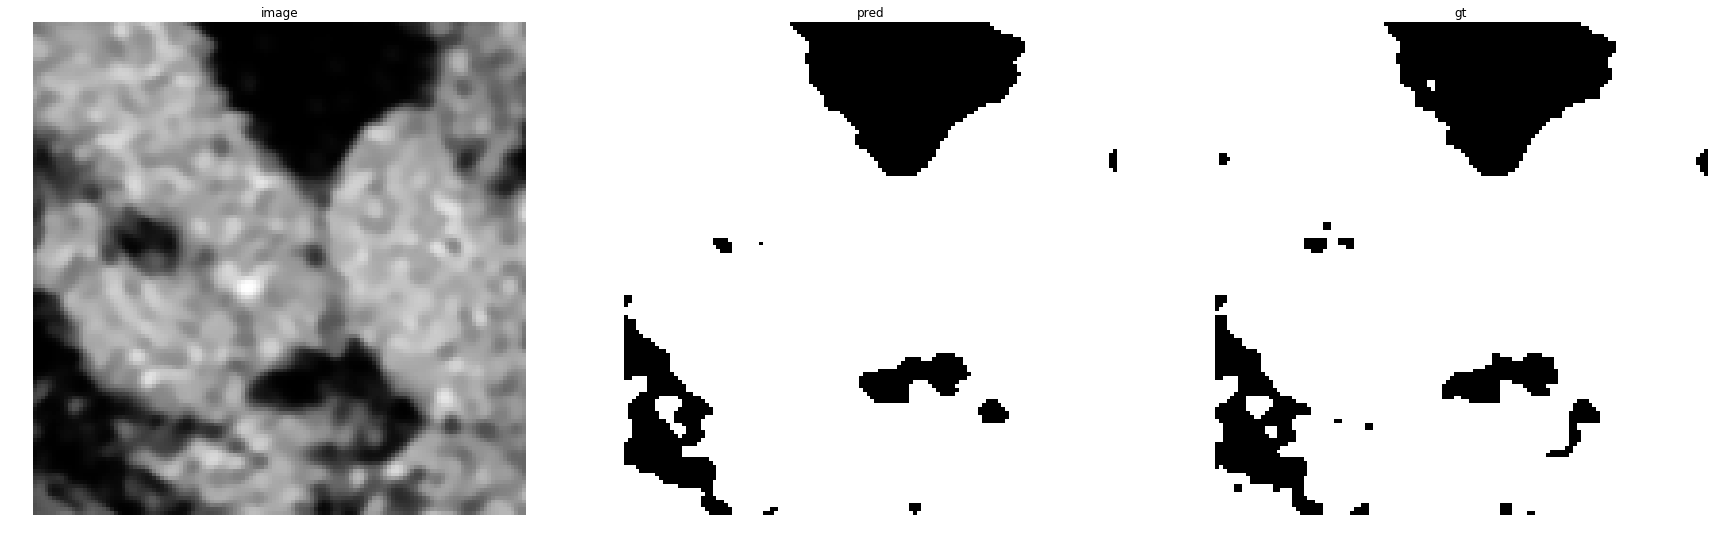

accuracy    : 0.98773193359375
precision   : 0.9891554151106005
recall      : 0.9963828401938798
f1          : 0.9927559736187695
pr_auc      : 0.9997862115618754
iou         : 0.9856161442679261


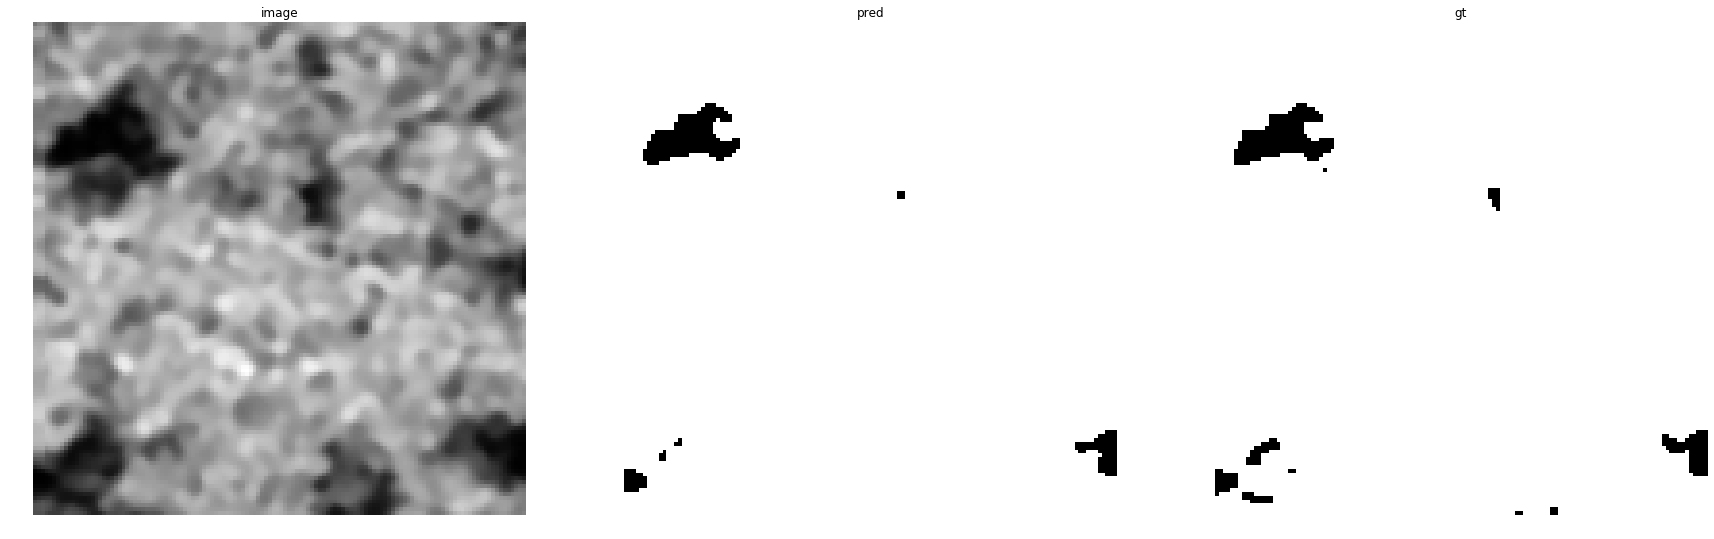

accuracy    : 0.99493408203125
precision   : 0.9950168182384452
recall      : 0.999812230080741
f1          : 0.9974087602634948
pr_auc      : 0.9999760729919258
iou         : 0.9948309148657907


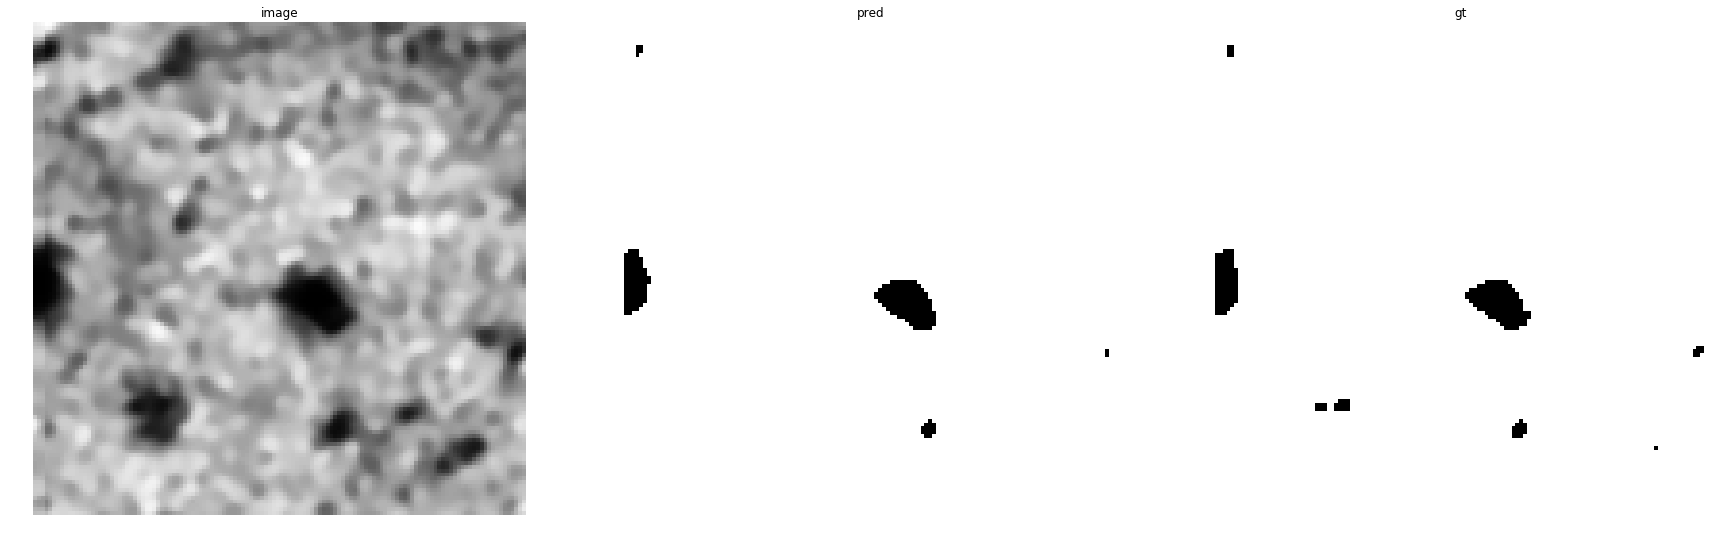

accuracy    : 0.99774169921875
precision   : 0.9981408031730292
recall      : 0.9995655681747657
f1          : 0.9988526776024063
pr_auc      : 0.9999922902730612
iou         : 0.9977079848850895


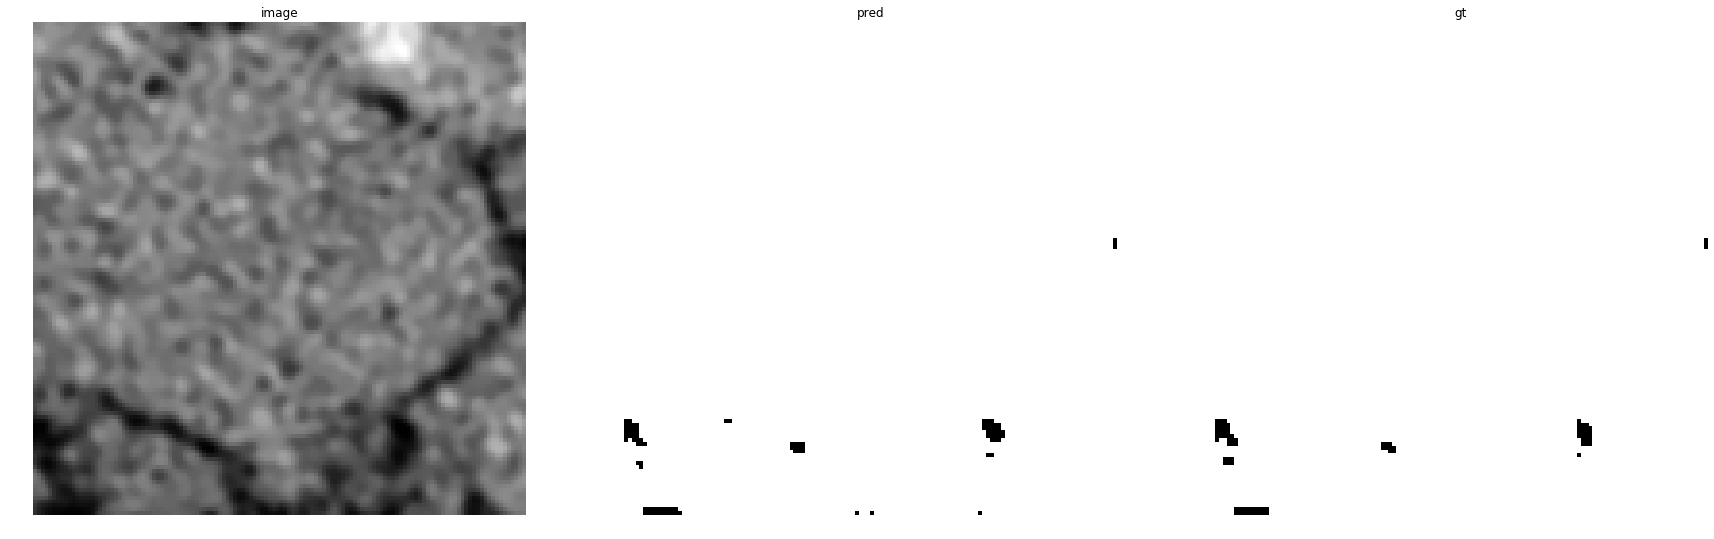

accuracy    : 0.998291015625
precision   : 0.9993861264579497
recall      : 0.99889557000859
f1          : 0.9991407880201302
pr_auc      : 0.9999972786269479
iou         : 0.9982830512631837


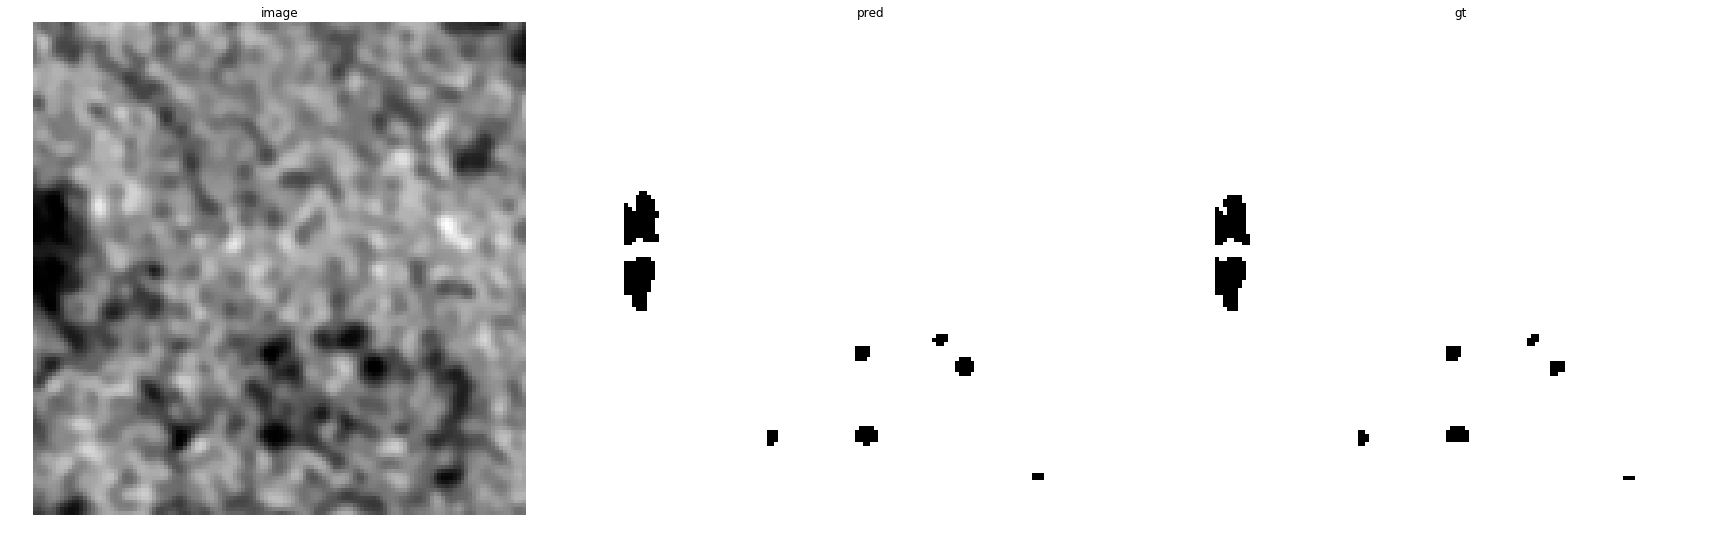

accuracy    : 0.99822998046875
precision   : 0.9996898263027295
recall      : 0.9985129190160481
f1          : 0.999101026070244
pr_auc      : 0.9999981725698631
iou         : 0.9982036669970268


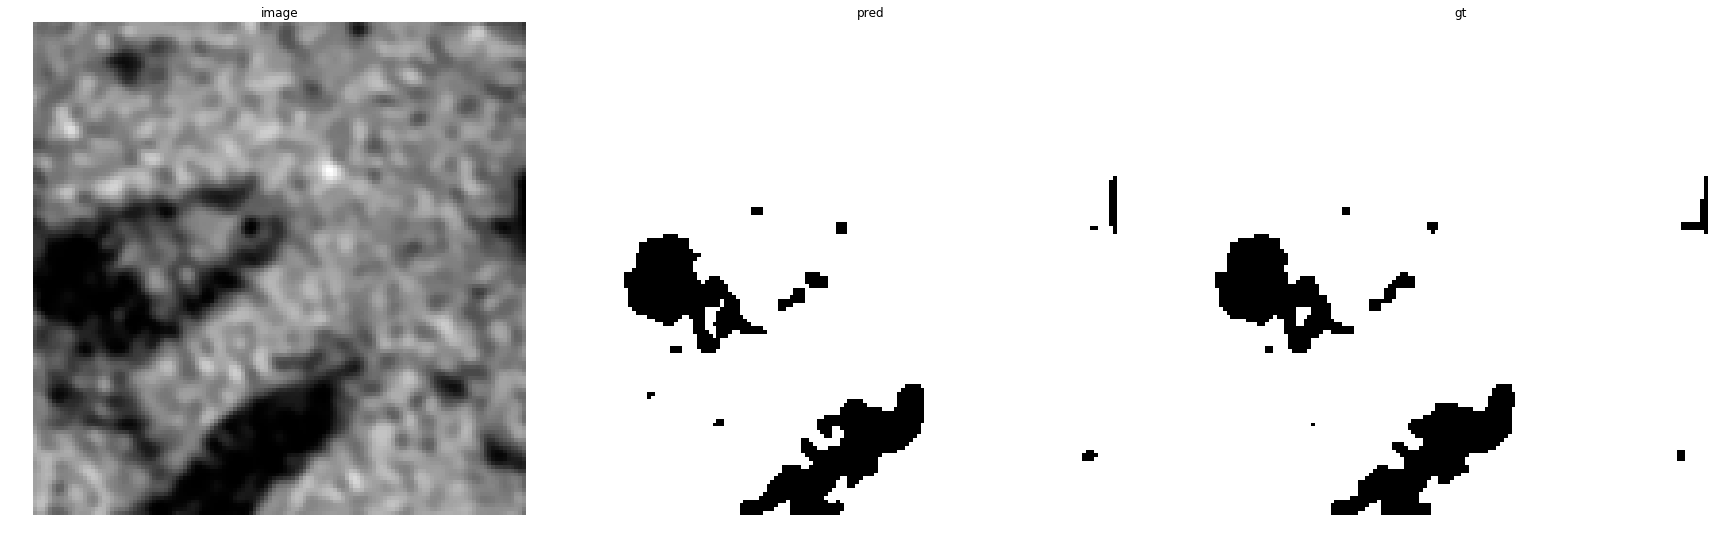

accuracy    : 0.9930419921875
precision   : 0.9971506195745808
recall      : 0.9953039222170779
f1          : 0.9962264150943396
pr_auc      : 0.9999532068565968
iou         : 0.9924812030075187


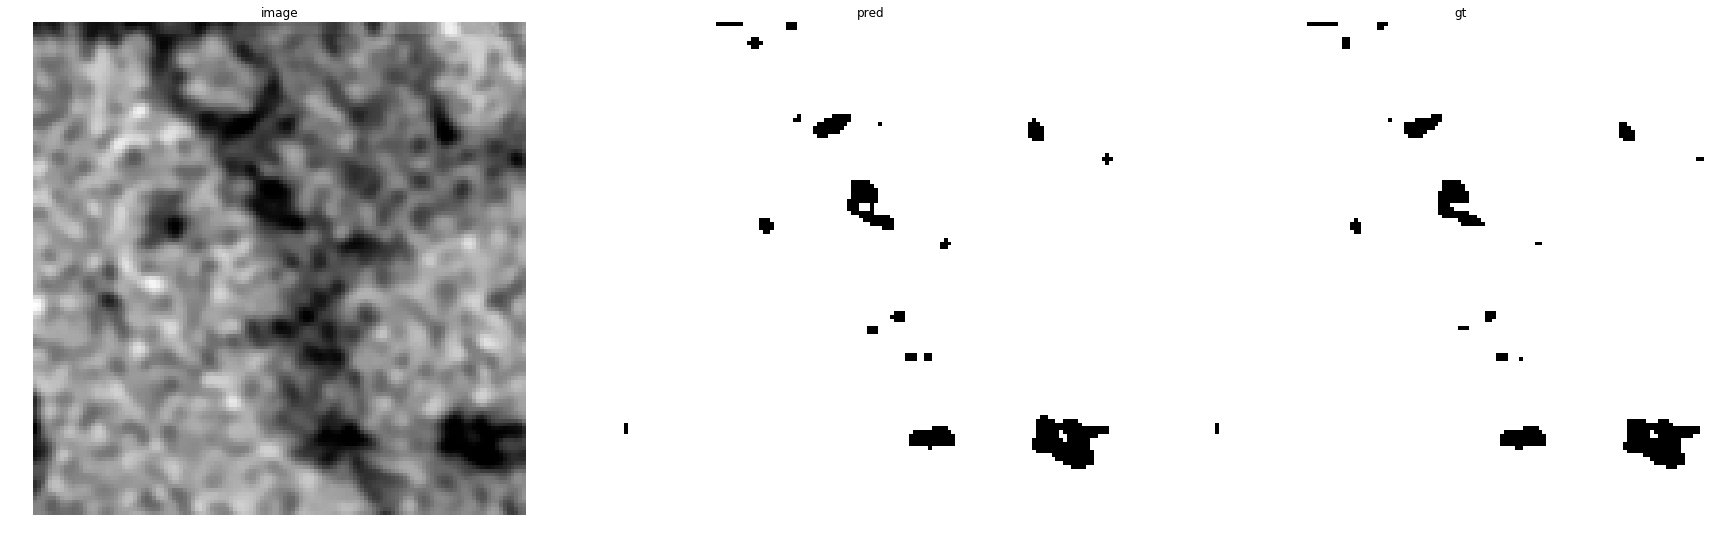

accuracy    : 0.996337890625
precision   : 0.9991851062496082
recall      : 0.9970601113404641
f1          : 0.9981214777708204
pr_auc      : 0.9999900719640595
iou         : 0.99625


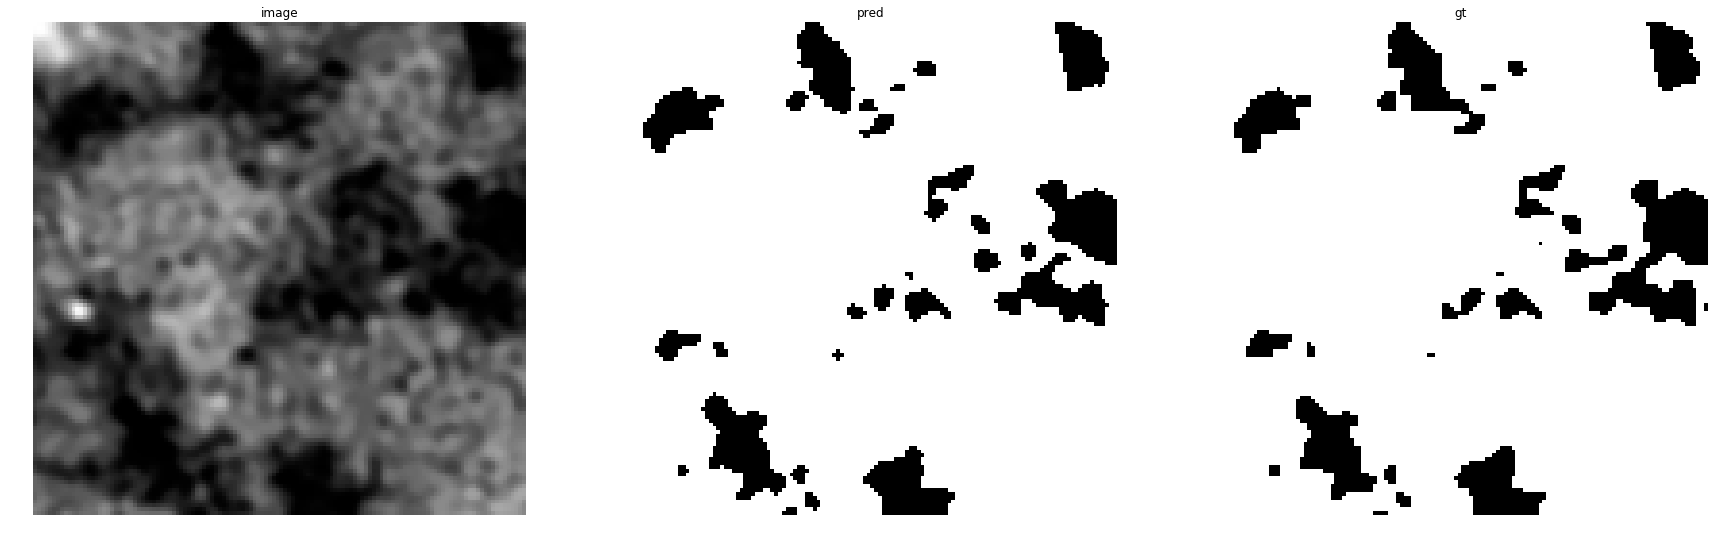

accuracy    : 0.98504638671875
precision   : 0.9901274331326145
recall      : 0.9926991926991927
f1          : 0.9914116451081432
pr_auc      : 0.999639181971121
iou         : 0.9829695537327958


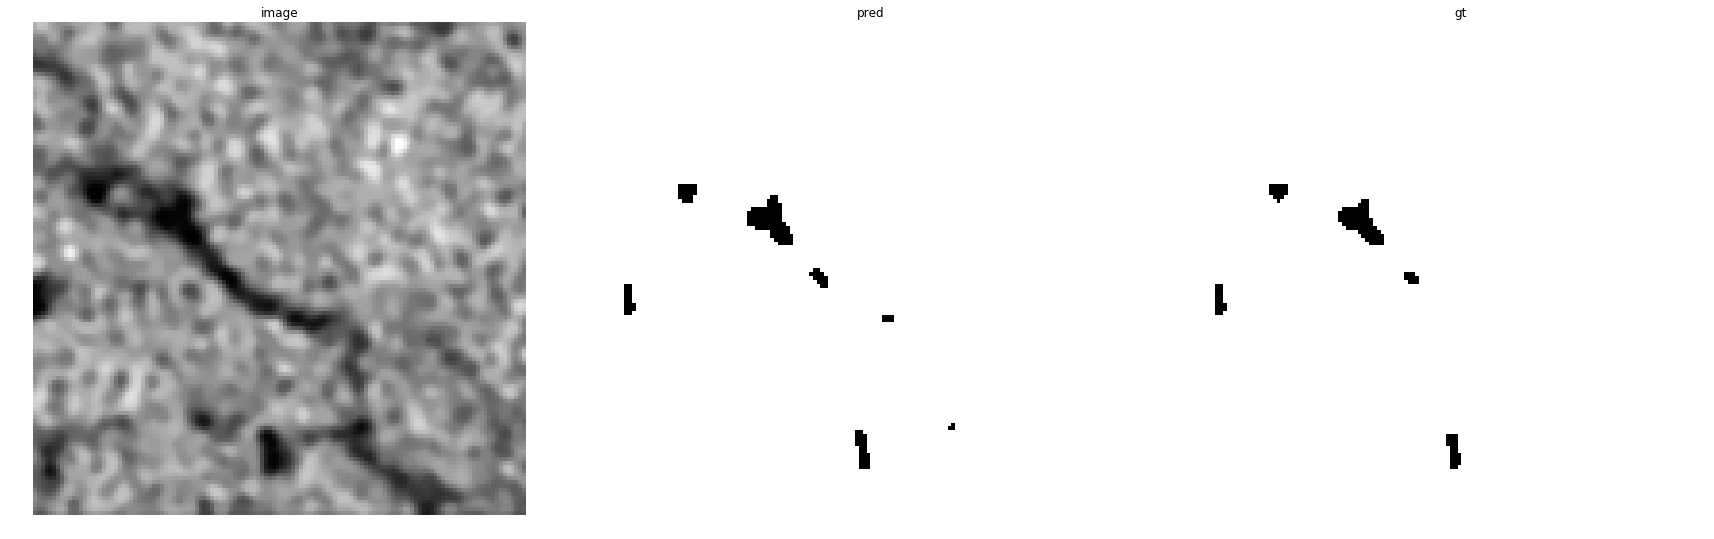

accuracy    : 0.99810791015625
precision   : 0.9999383096853794
recall      : 0.9981525956031775
f1          : 0.9990446546888964
pr_auc      : 0.999999329089722
iou         : 0.9980911330049261


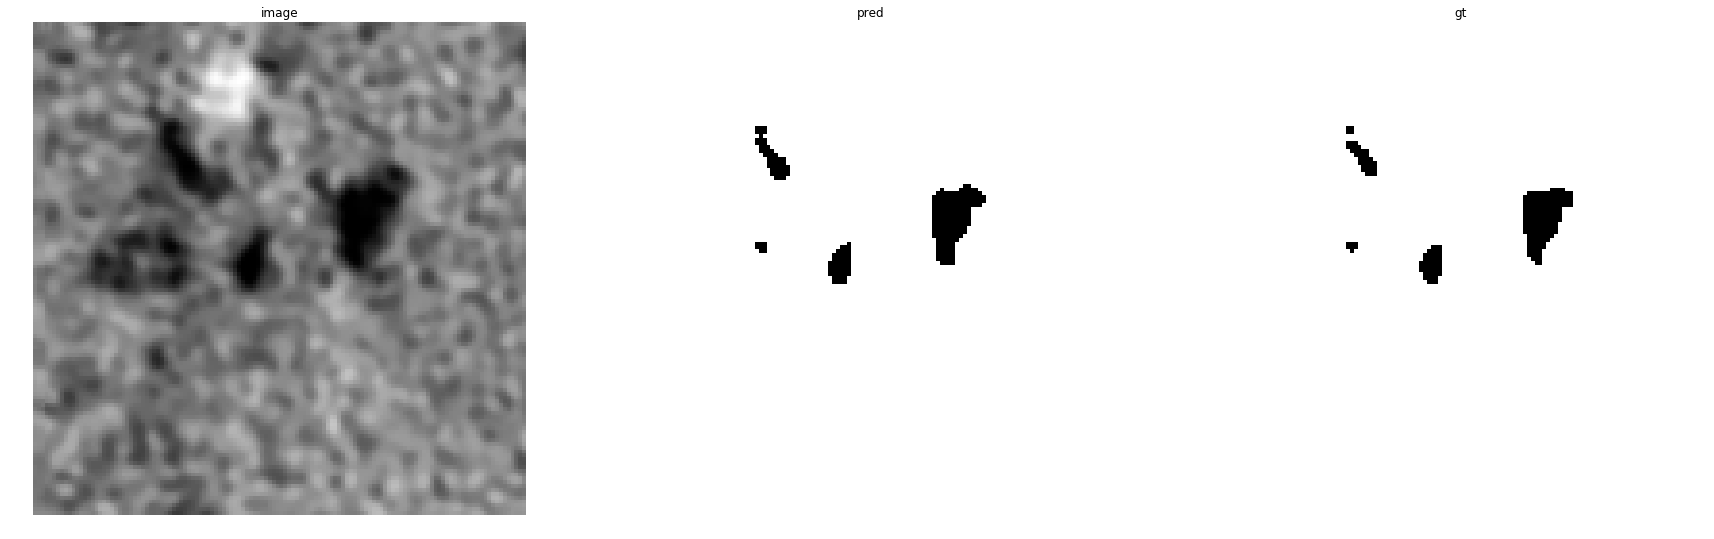

accuracy    : 0.99786376953125
precision   : 0.999875784112788
recall      : 0.9979543763947434
f1          : 0.9989141562994447
pr_auc      : 0.9999986399263884
iou         : 0.9978306681542085


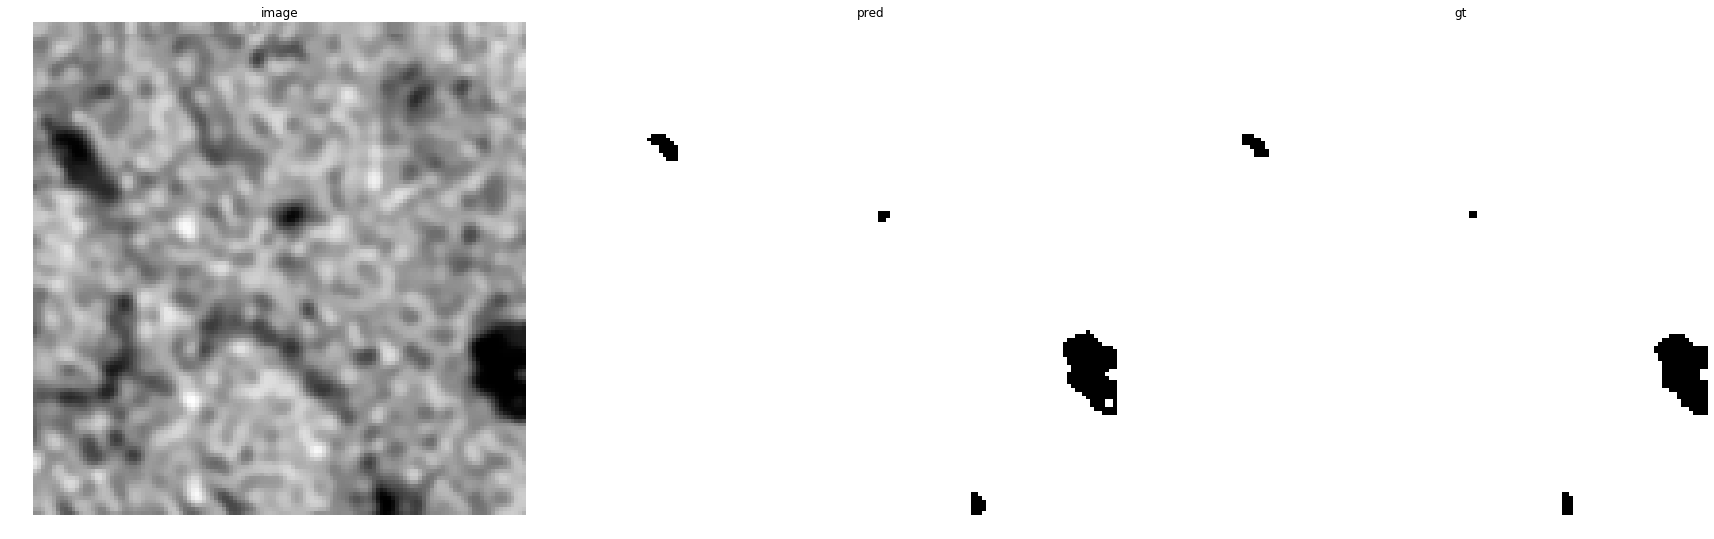

accuracy    : 0.998046875
precision   : 0.9996276991809382
recall      : 0.9983886960832921
f1          : 0.9990078134689322
pr_auc      : 0.999998402806938
iou         : 0.9980175938545409


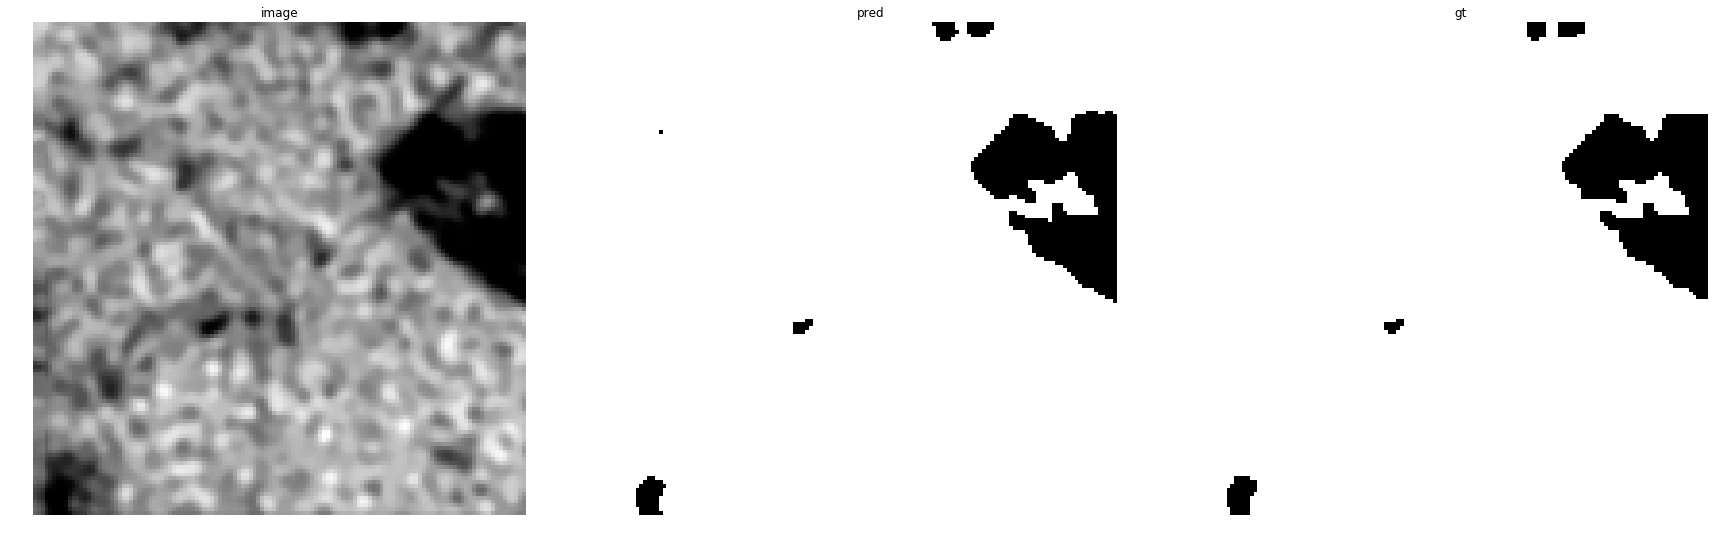

accuracy    : 0.99755859375
precision   : 0.9990141955835962
recall      : 0.9983580717194273
f1          : 0.99868602588529
pr_auc      : 0.999994374184176
iou         : 0.9973755002952562


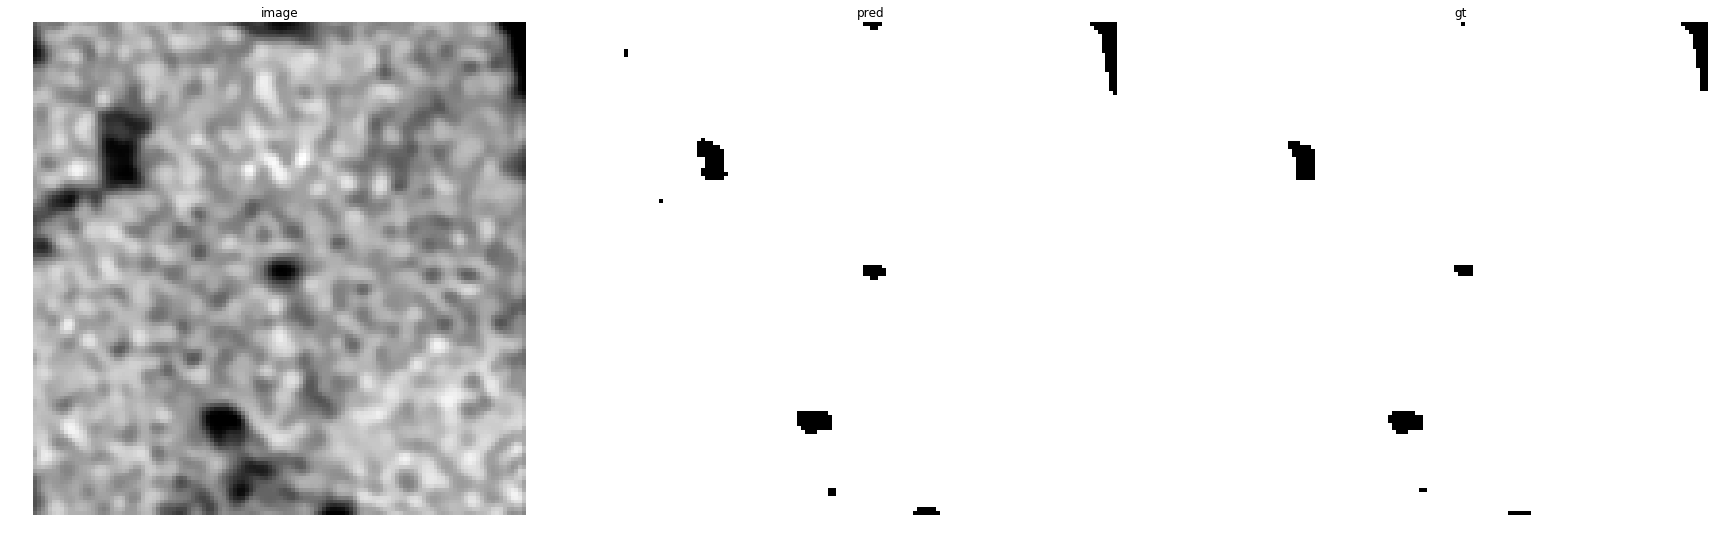

accuracy    : 0.99786376953125
precision   : 1.0
recall      : 0.9978403060594842
f1          : 0.9989189856997251
pr_auc      : 0.9999989351819633
iou         : 0.9978403060594842


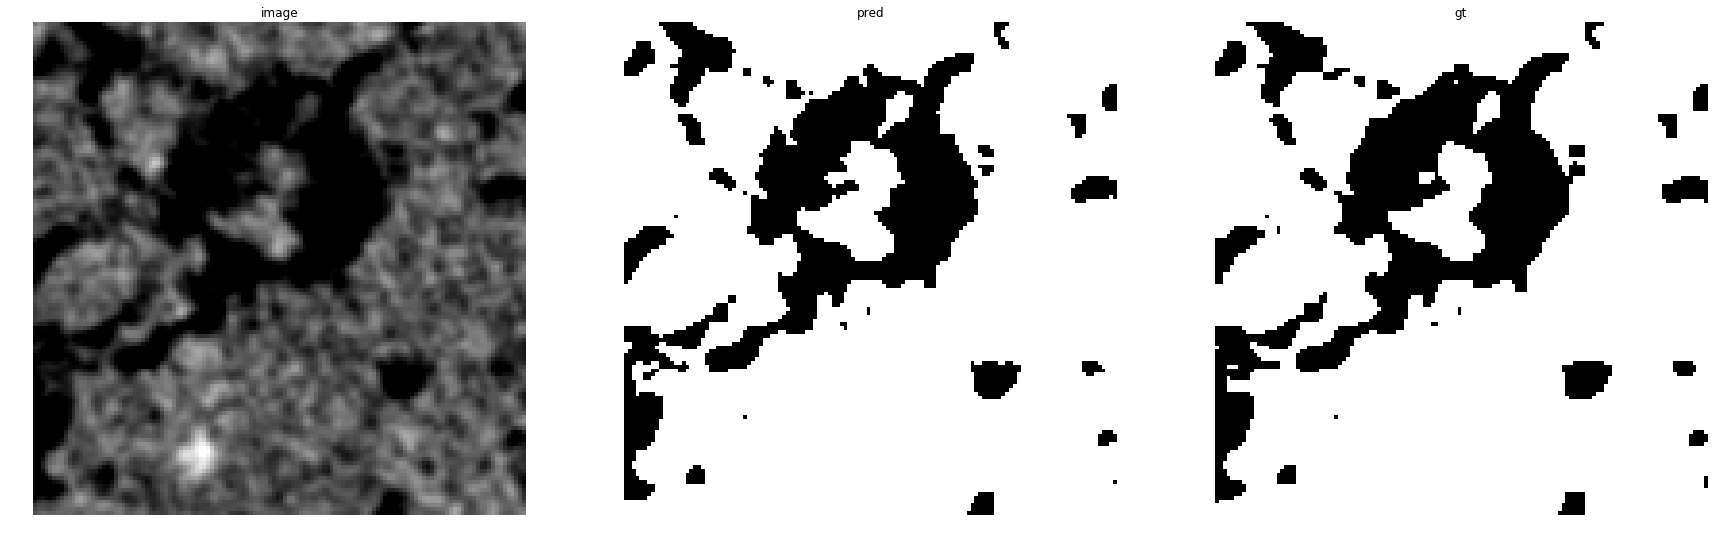

accuracy    : 0.98443603515625
precision   : 0.9817312880598166
recall      : 0.9985886780617845
f1          : 0.990088234150892
pr_auc      : 0.9997597888585088
iou         : 0.9803710260949888


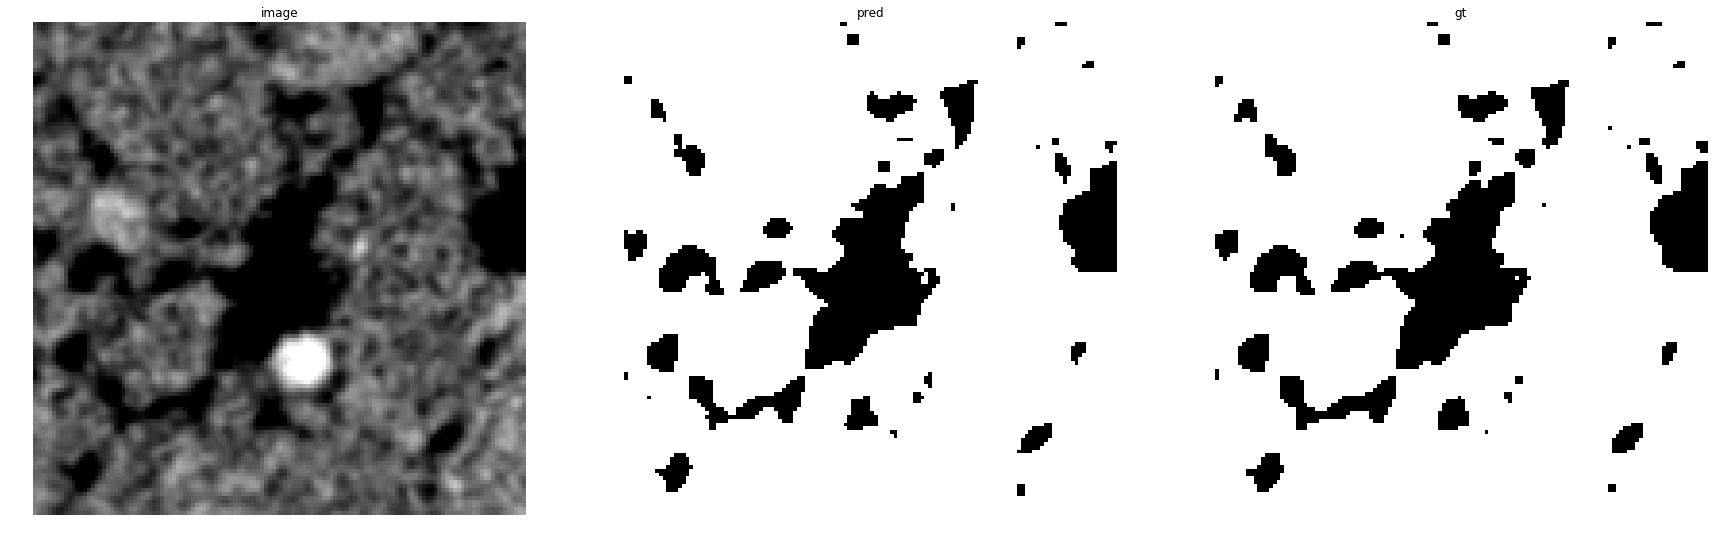

accuracy    : 0.990234375
precision   : 0.9906973441272546
recall      : 0.9979256080114449
f1          : 0.9942983393913478
pr_auc      : 0.9999289421492912
iou         : 0.9886613280419531


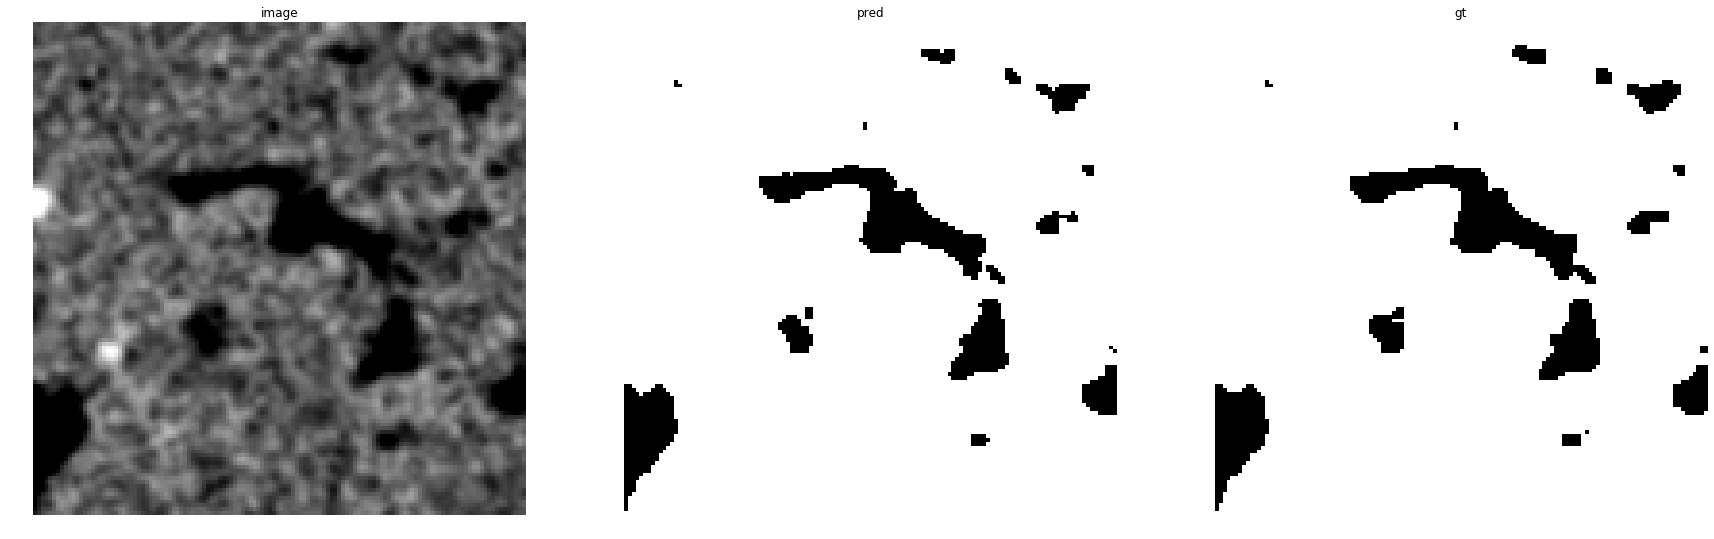

accuracy    : 0.994140625
precision   : 0.9937425109838903
recall      : 0.9998660415271265
f1          : 0.9967948717948717
pr_auc      : 0.9999879366990101
iou         : 0.9936102236421726


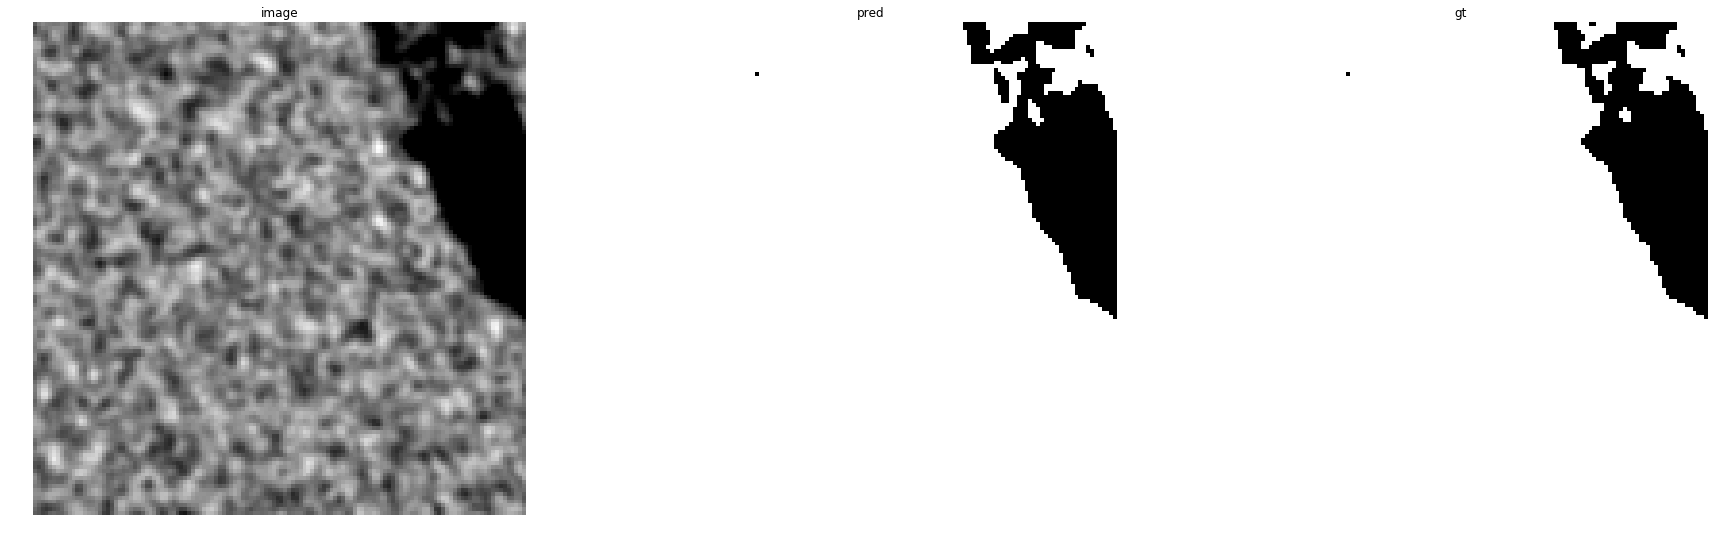

accuracy    : 0.99566650390625
precision   : 0.9953117674636662
recall      : 0.9999327143049388
f1          : 0.9976168898734602
pr_auc      : 0.9999930604265914
iou         : 0.9952451111706402


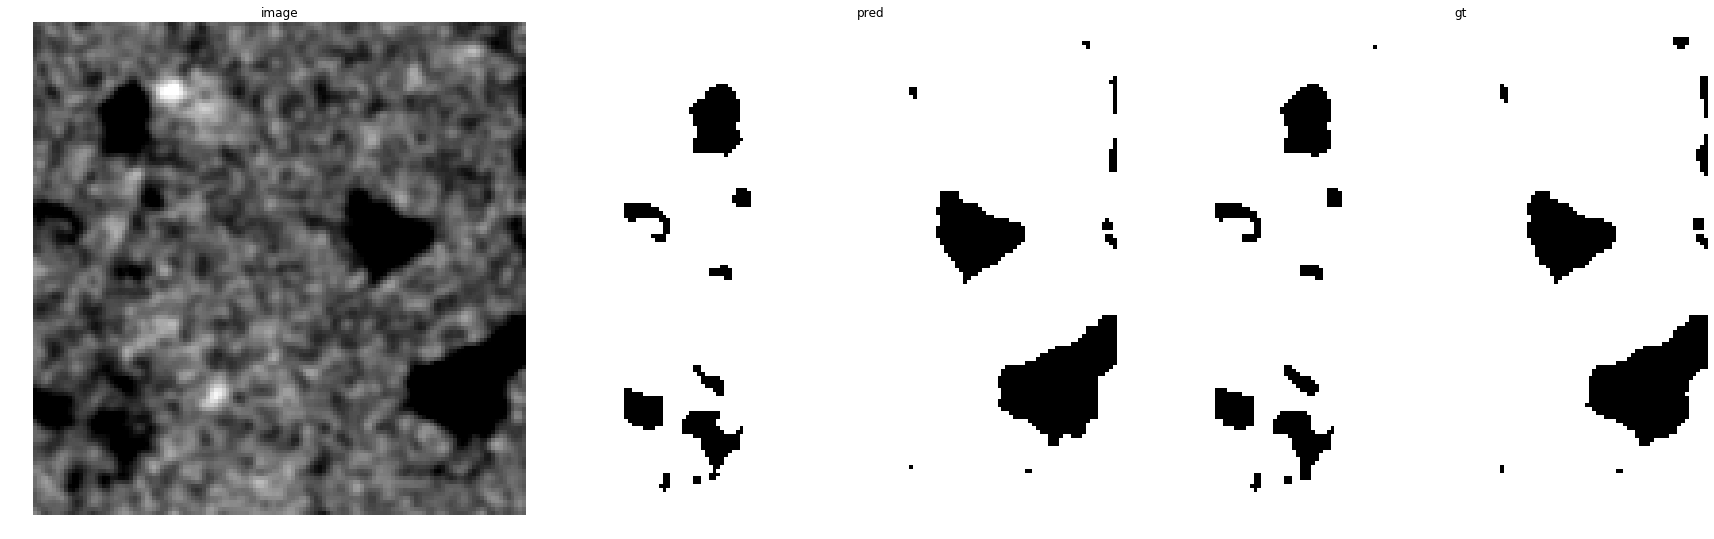

accuracy    : 0.9942626953125
precision   : 0.9944272861554989
recall      : 0.9992578599379301
f1          : 0.9968367209584063
pr_auc      : 0.9999702954355639
iou         : 0.9936933914793693


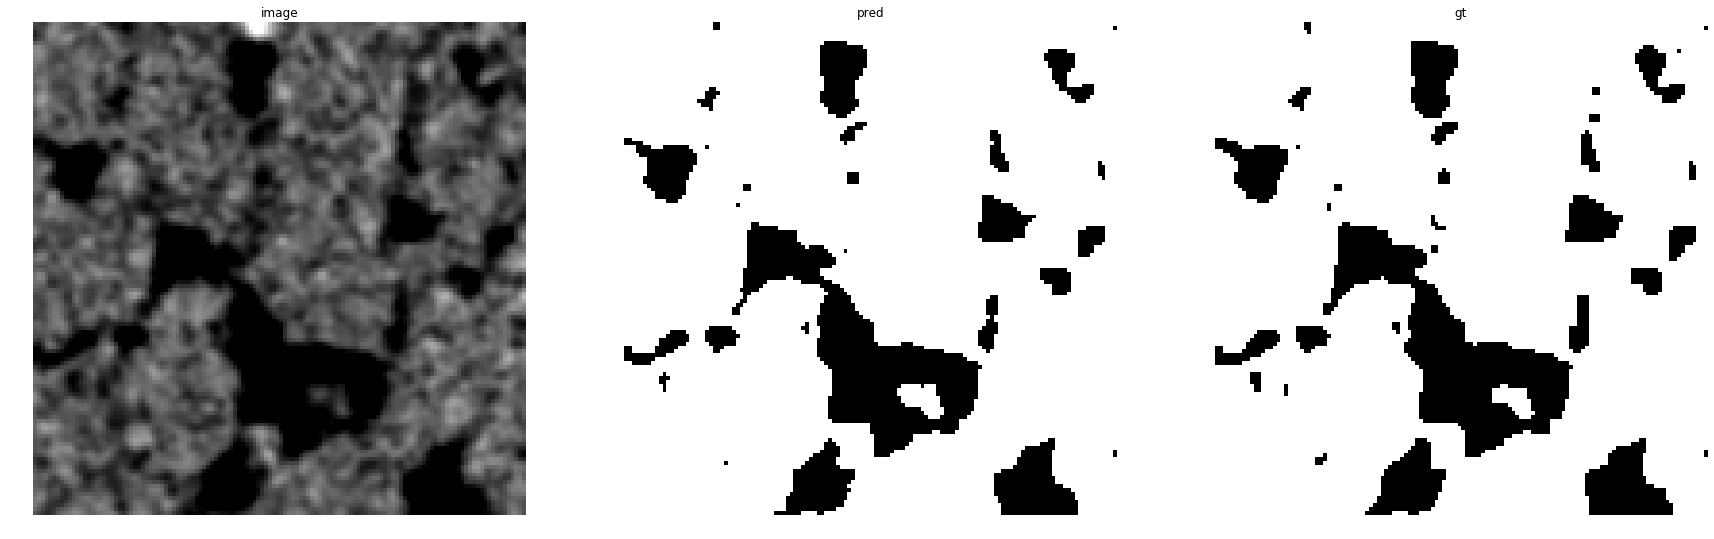

accuracy    : 0.9874267578125
precision   : 0.9855114670549691
recall      : 0.9994831278151074
f1          : 0.9924481266955055
pr_auc      : 0.999897849961651
iou         : 0.9850094600494833


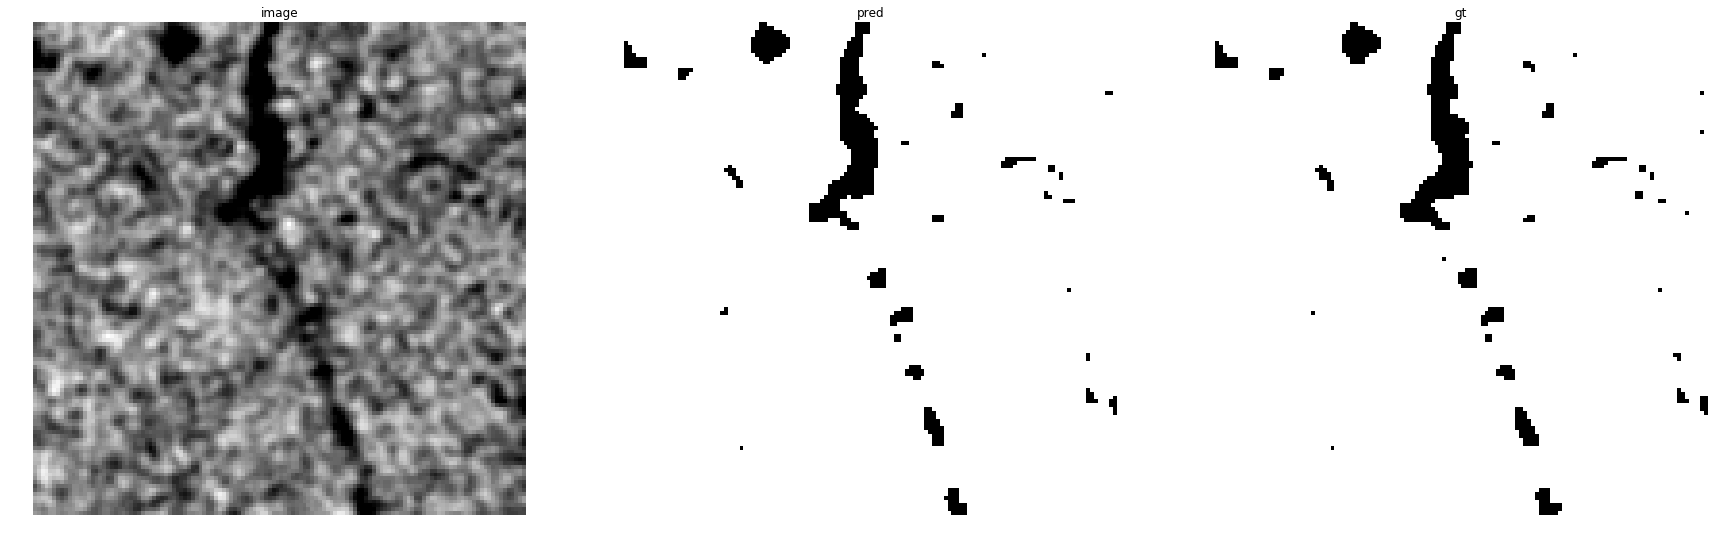

accuracy    : 0.99609375
precision   : 0.9963682701497292
recall      : 0.9995525727069351
f1          : 0.9979578813018506
pr_auc      : 0.9999857510430358
iou         : 0.9959240861036811


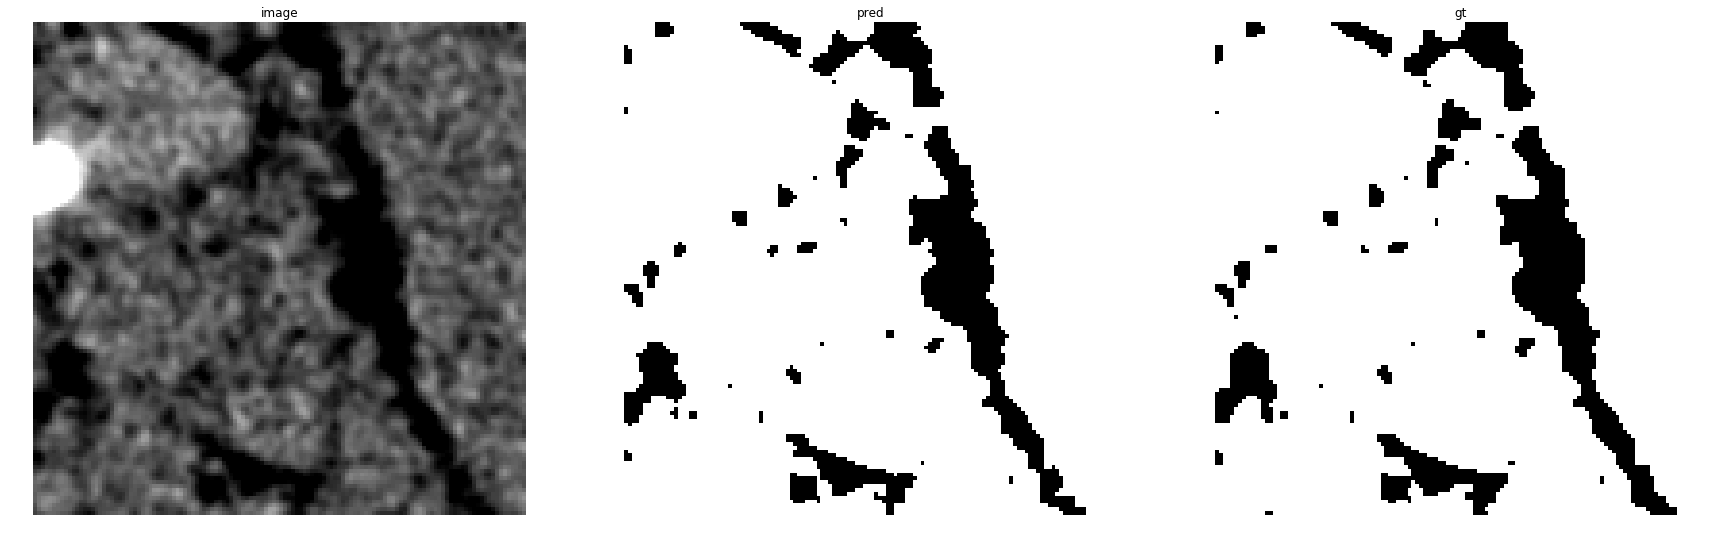

accuracy    : 0.98895263671875
precision   : 0.9890672086341019
recall      : 0.9982317159428491
f1          : 0.993628331045165
pr_auc      : 0.9998771363133631
iou         : 0.9873373443402826


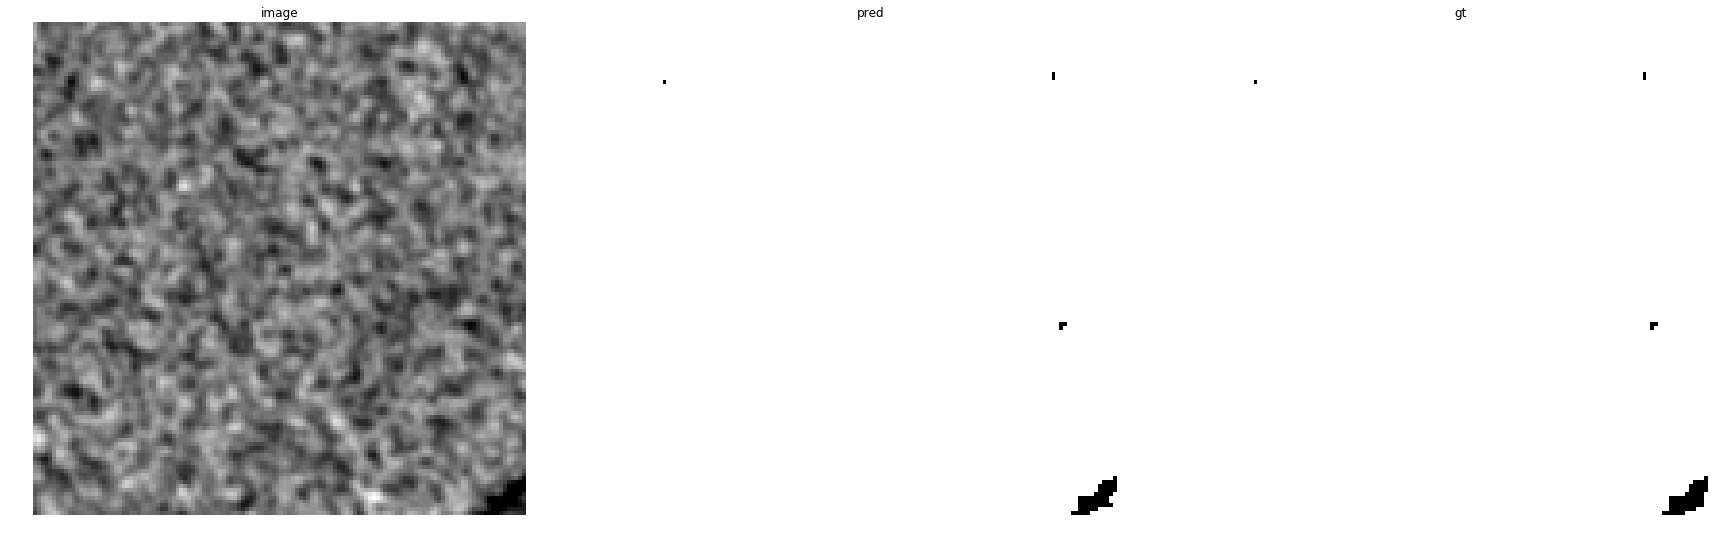

accuracy    : 0.99969482421875
precision   : 0.9996936837591129
recall      : 1.0
f1          : 0.9998468184185533
pr_auc      : 0.9999999286510578
iou         : 0.9996936837591129


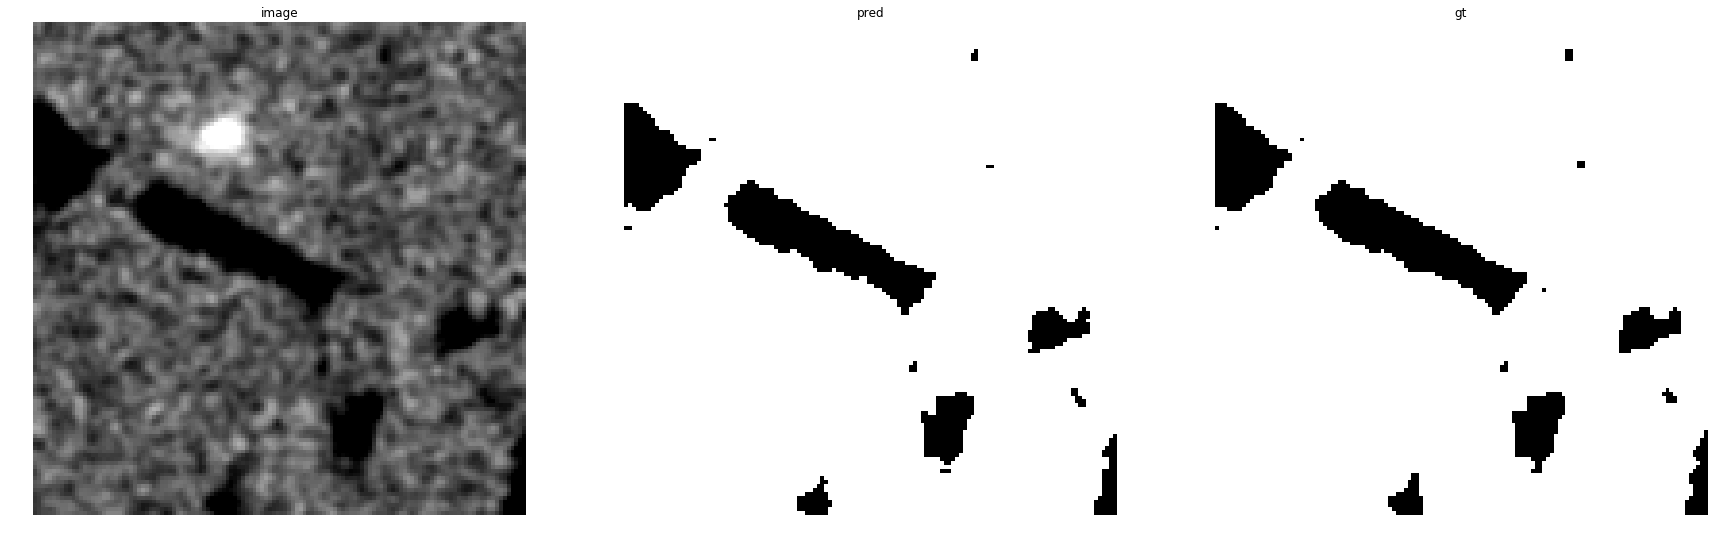

accuracy    : 0.995361328125
precision   : 0.9959194594956184
recall      : 0.9989934912433738
f1          : 0.997454106927509
pr_auc      : 0.9999869632314246
iou         : 0.9949211440791232


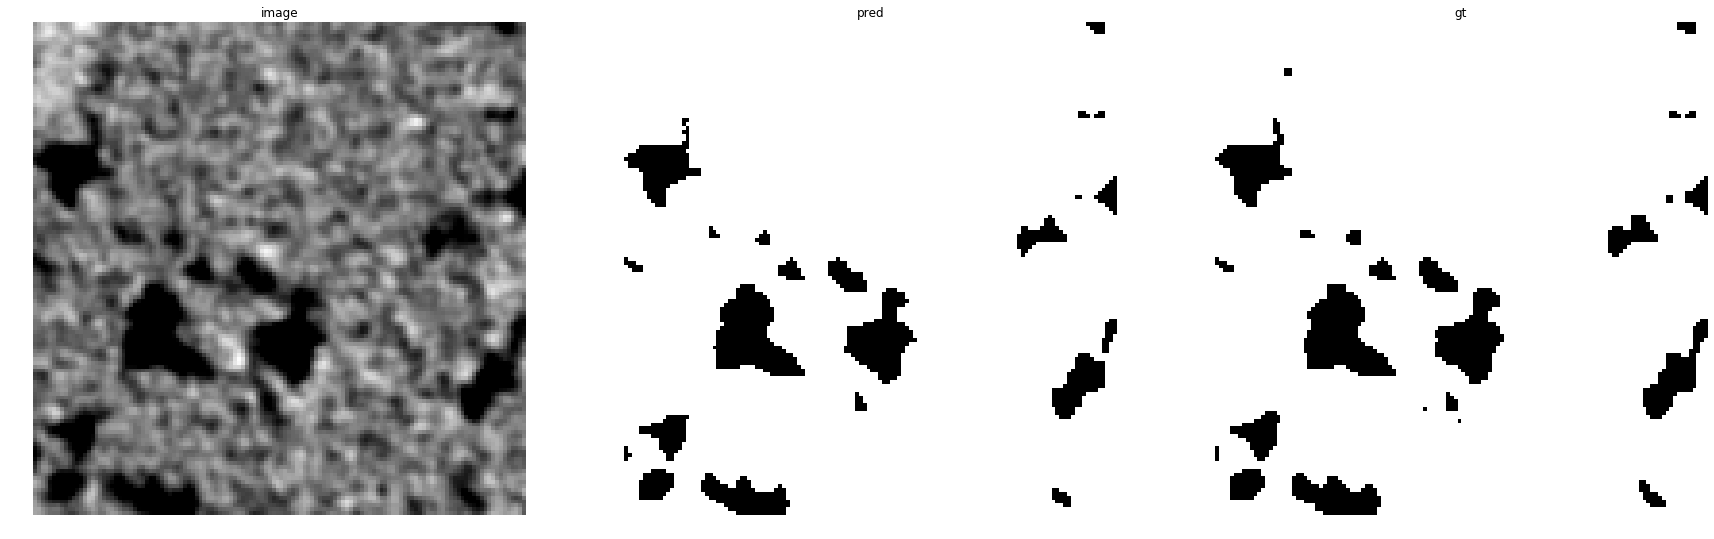

accuracy    : 0.9920654296875
precision   : 0.9919678714859438
recall      : 0.9993256911665542
f1          : 0.9956331877729258
pr_auc      : 0.9999480641086036
iou         : 0.991304347826087


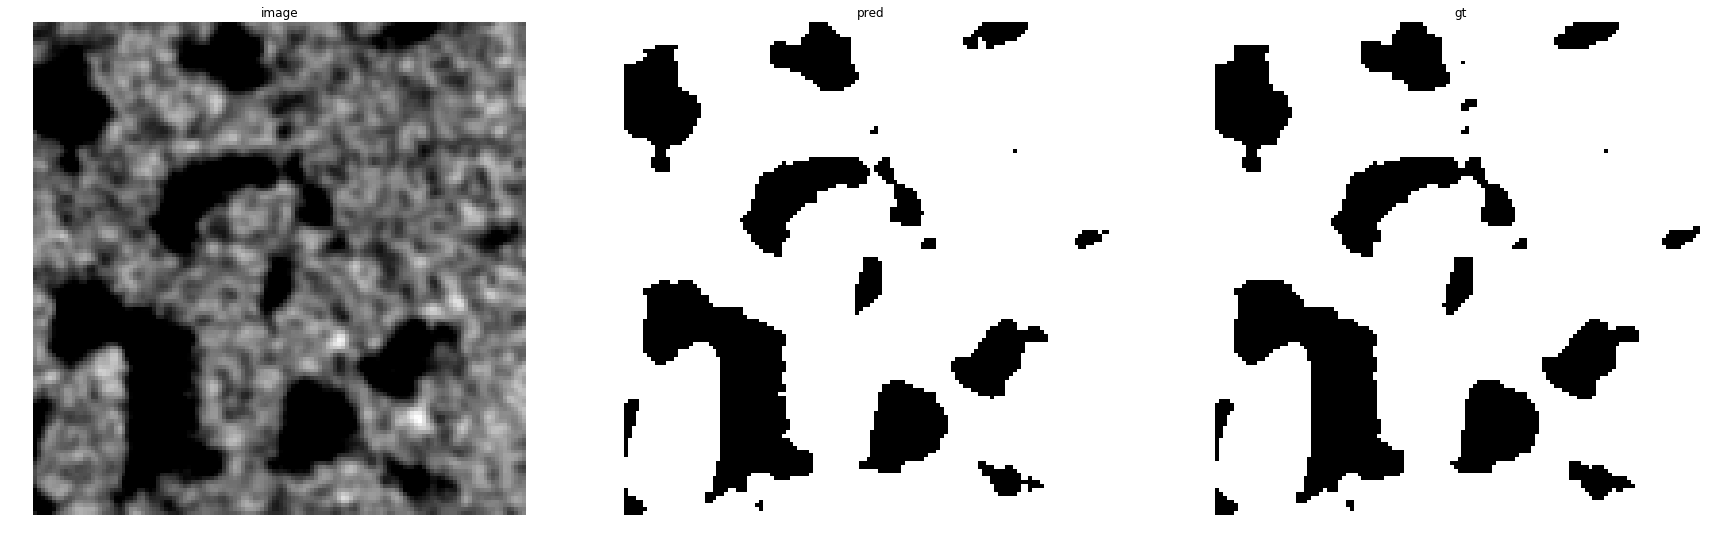

accuracy    : 0.9892578125
precision   : 0.9870781392520523
recall      : 0.9995381773399015
f1          : 0.993269083677528
pr_auc      : 0.9999365806121843
iou         : 0.9866281720103328


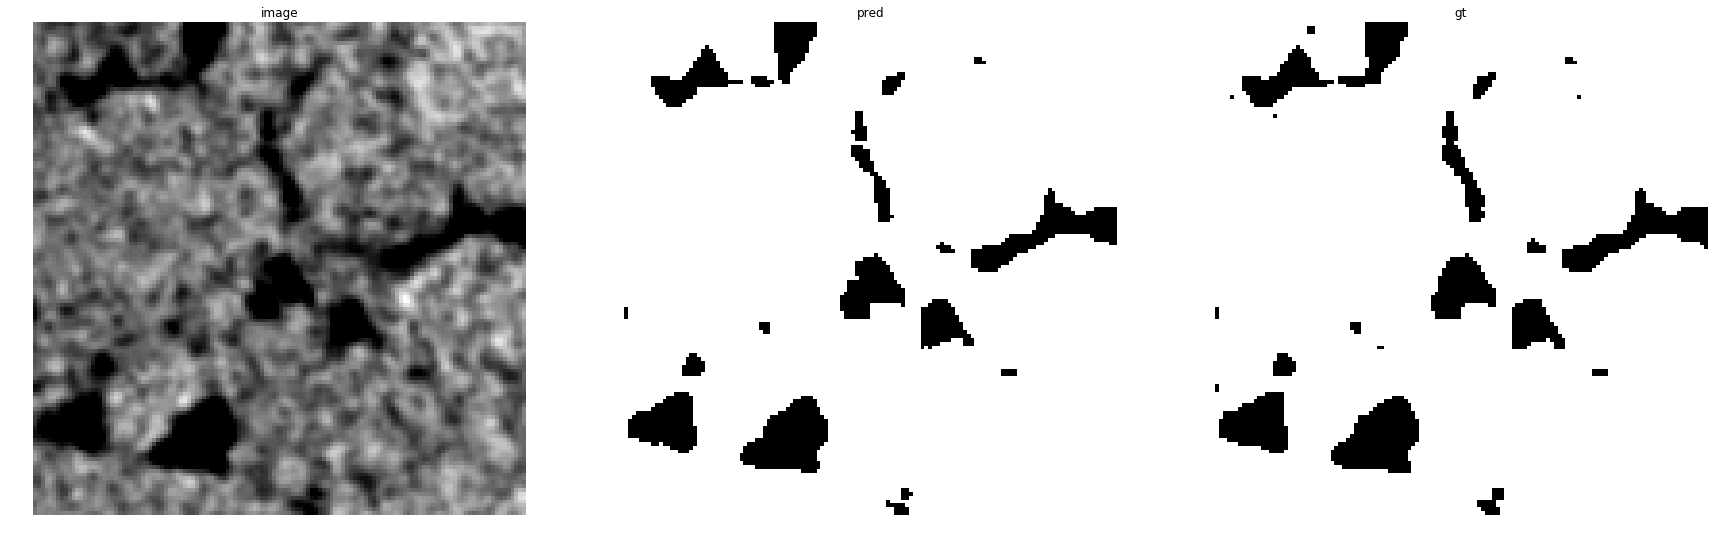

accuracy    : 0.9927978515625
precision   : 0.9921259842519685
recall      : 0.9999321711998915
f1          : 0.9960137828525101
pr_auc      : 0.9999716509772626
iou         : 0.9920592193808883


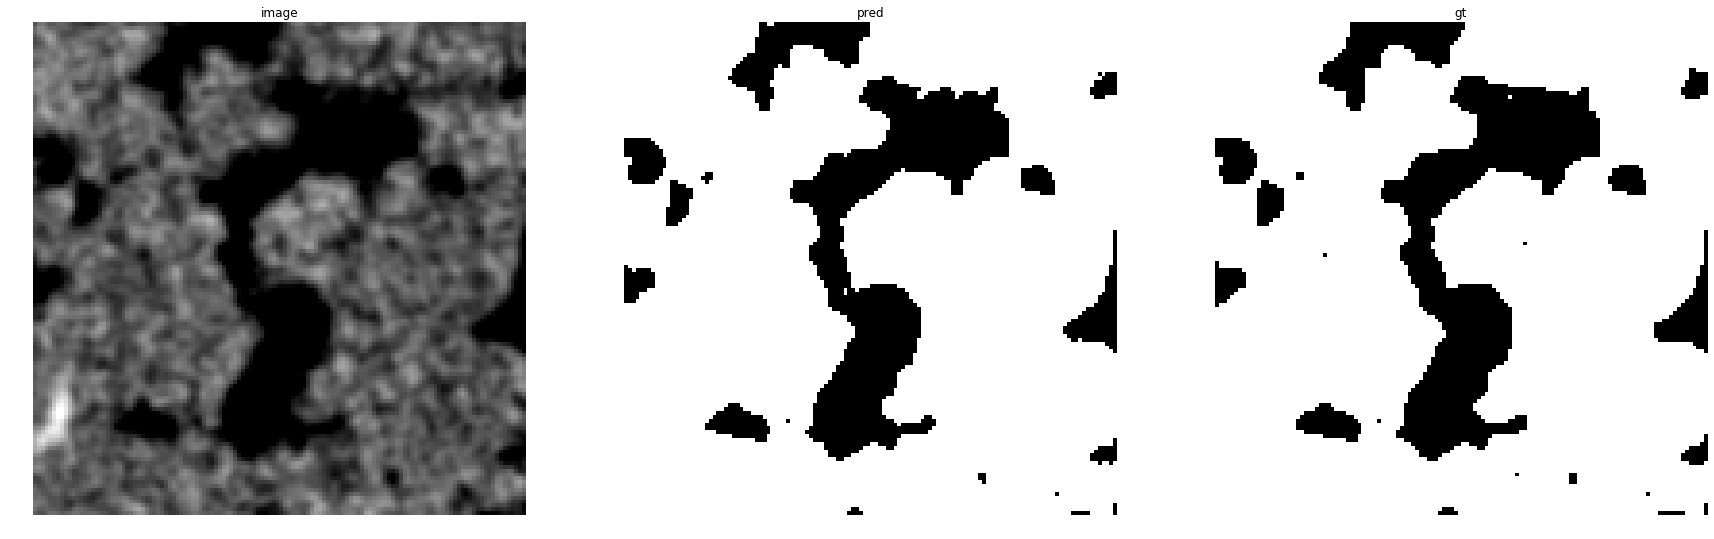

accuracy    : 0.99066162109375
precision   : 0.9890241170760845
recall      : 0.9995472381527316
f1          : 0.9942578344905235
pr_auc      : 0.999928811236198
iou         : 0.9885812374057765


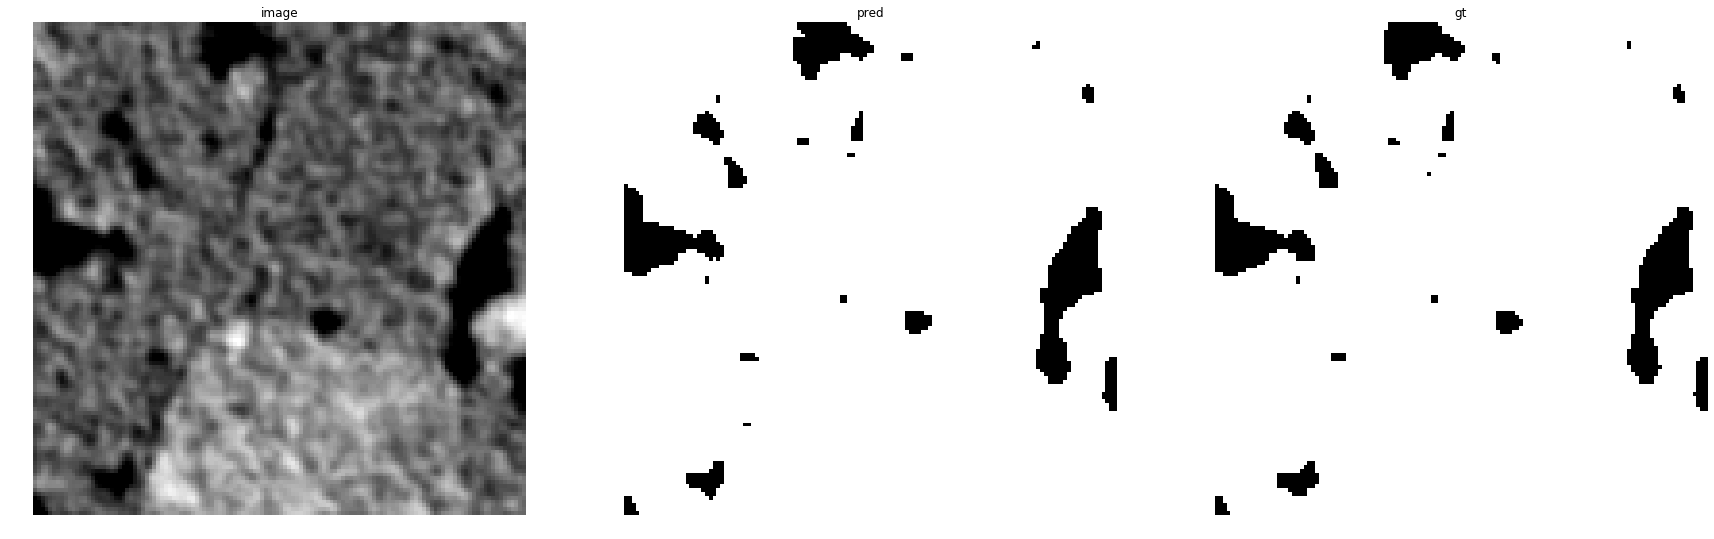

accuracy    : 0.9964599609375
precision   : 0.9973128850439114
recall      : 0.9988840750951818
f1          : 0.9980978617342253
pr_auc      : 0.9999847414578529
iou         : 0.99620294599018


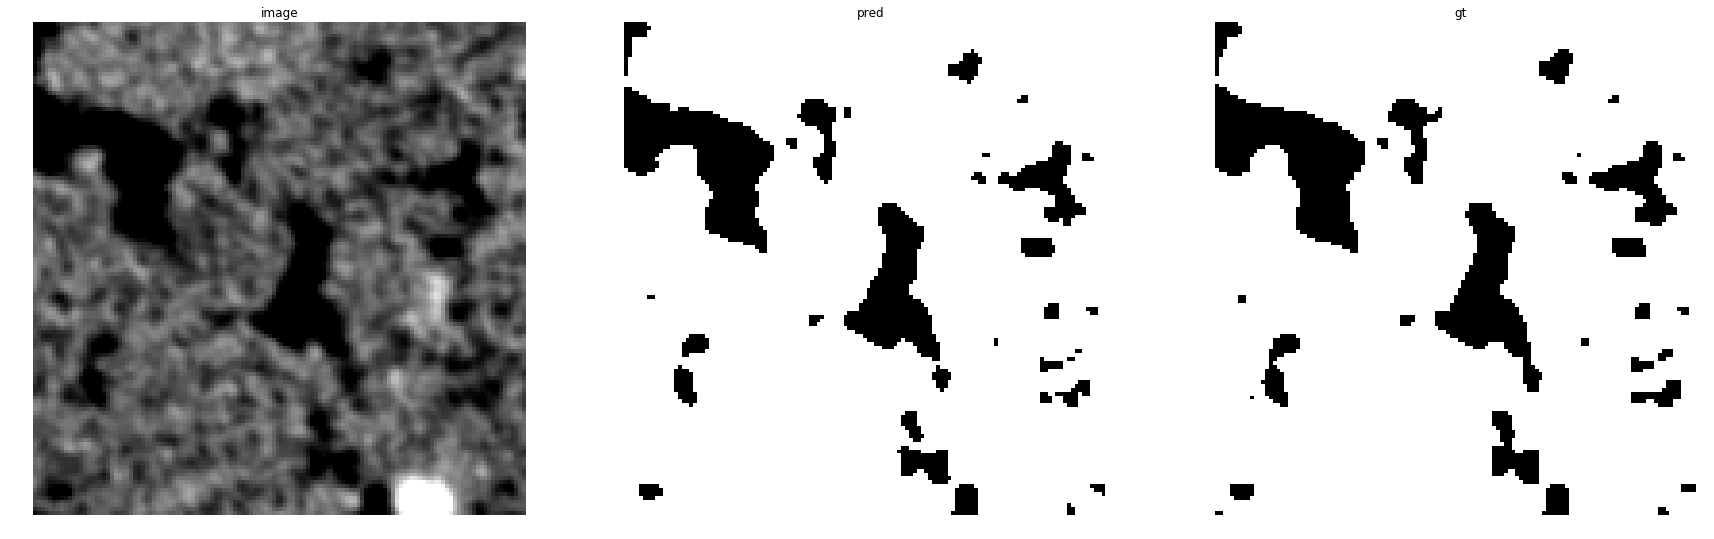

accuracy    : 0.9893798828125
precision   : 0.9883004063331933
recall      : 0.9995040385432904
f1          : 0.993870649570241
pr_auc      : 0.9998974366242026
iou         : 0.9878159792731601


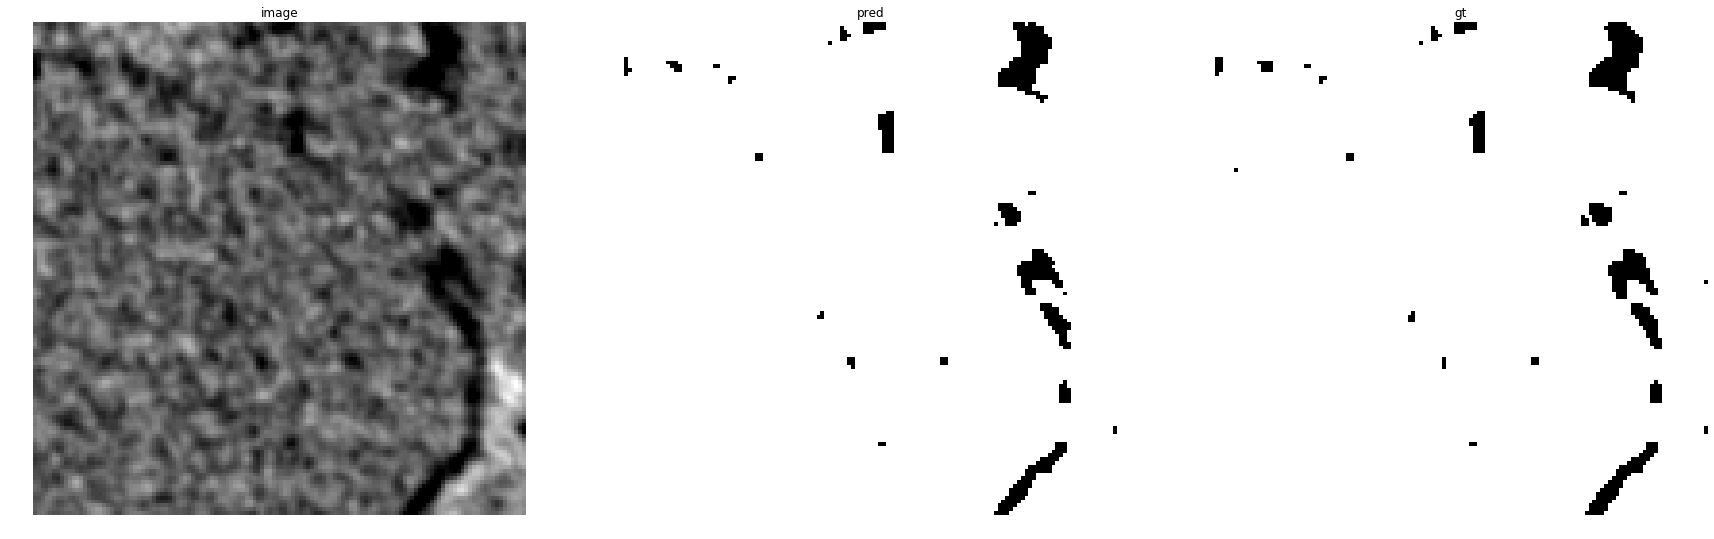

accuracy    : 0.9964599609375
precision   : 0.9969767588335328
recall      : 0.9993686470105436
f1          : 0.9981712700214402
pr_auc      : 0.9999893248057
iou         : 0.9963492163404041


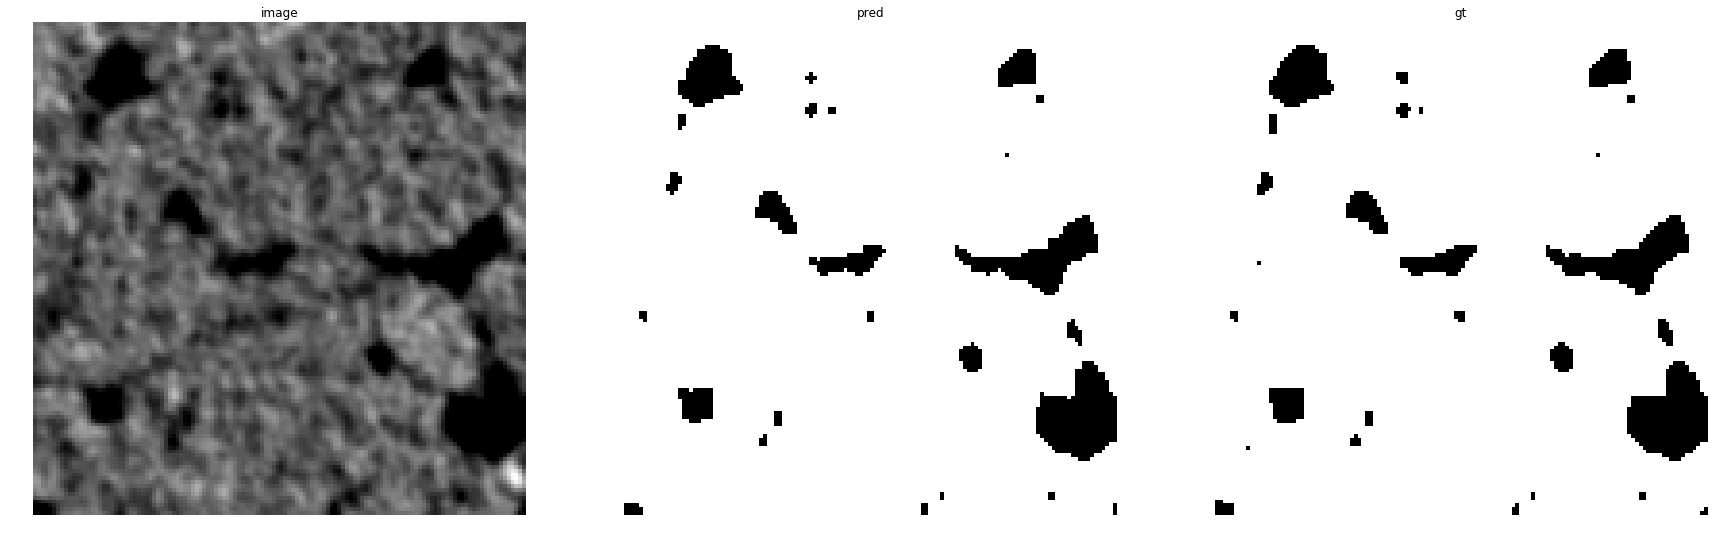

accuracy    : 0.99468994140625
precision   : 0.9948364888123924
recall      : 0.9994014763583161
f1          : 0.9971137577547026
pr_auc      : 0.9999863882233521
iou         : 0.9942441283493219


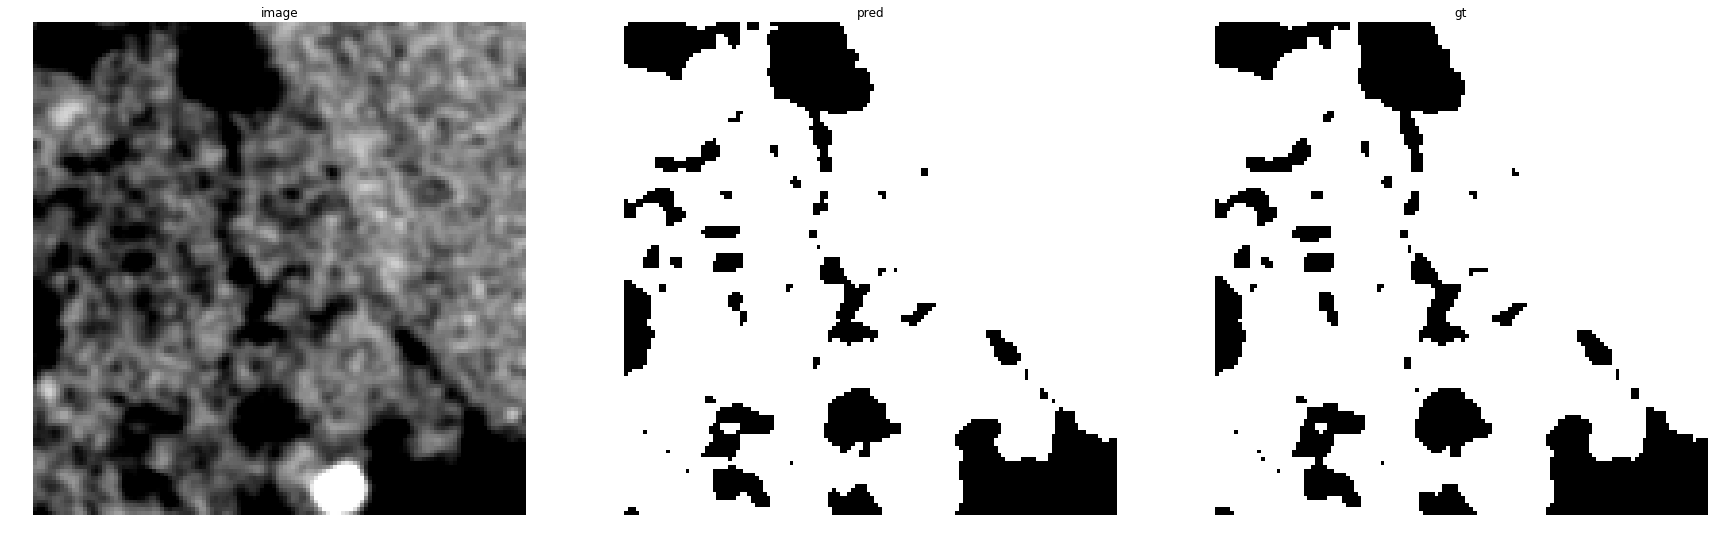

accuracy    : 0.9884033203125
precision   : 0.9871346768796014
recall      : 0.9987209389812656
f1          : 0.9928940085271898
pr_auc      : 0.9999002373718087
iou         : 0.9858882947118242


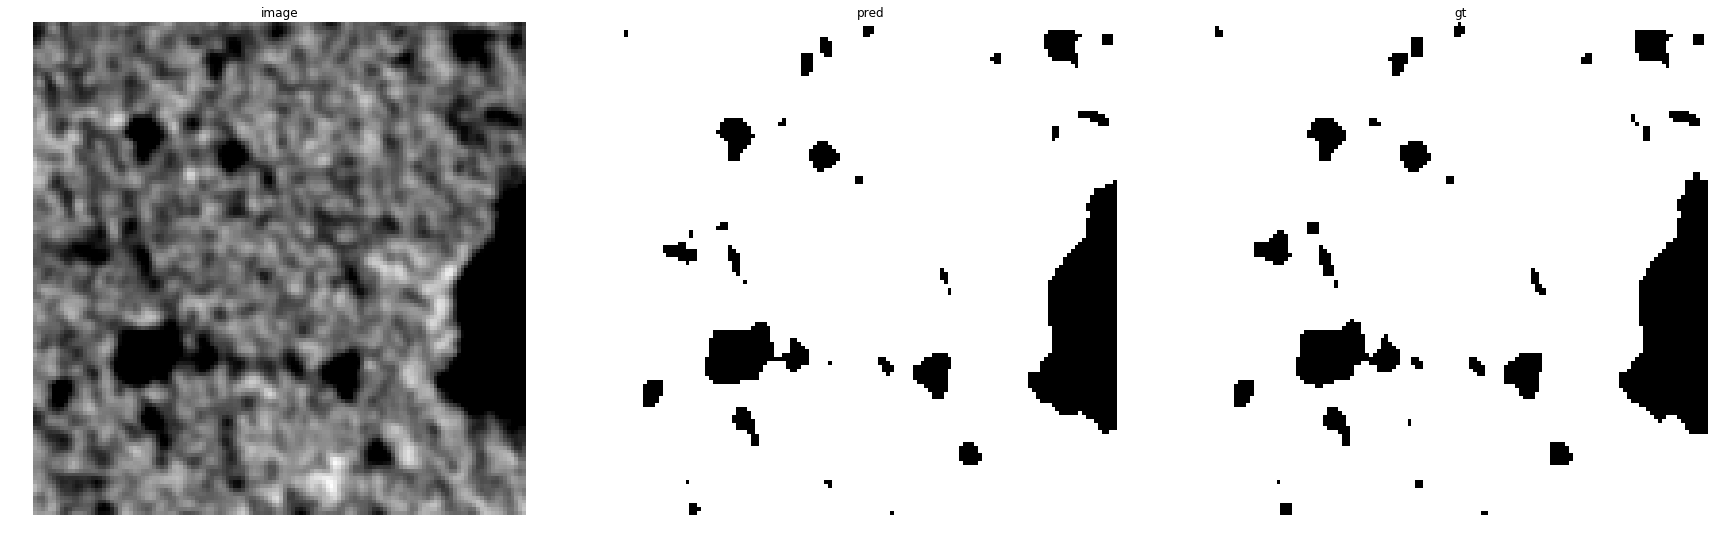

accuracy    : 0.99139404296875
precision   : 0.9903839596262702
recall      : 1.0
f1          : 0.9951687510707555
pr_auc      : 0.9999497733732295
iou         : 0.9903839596262702


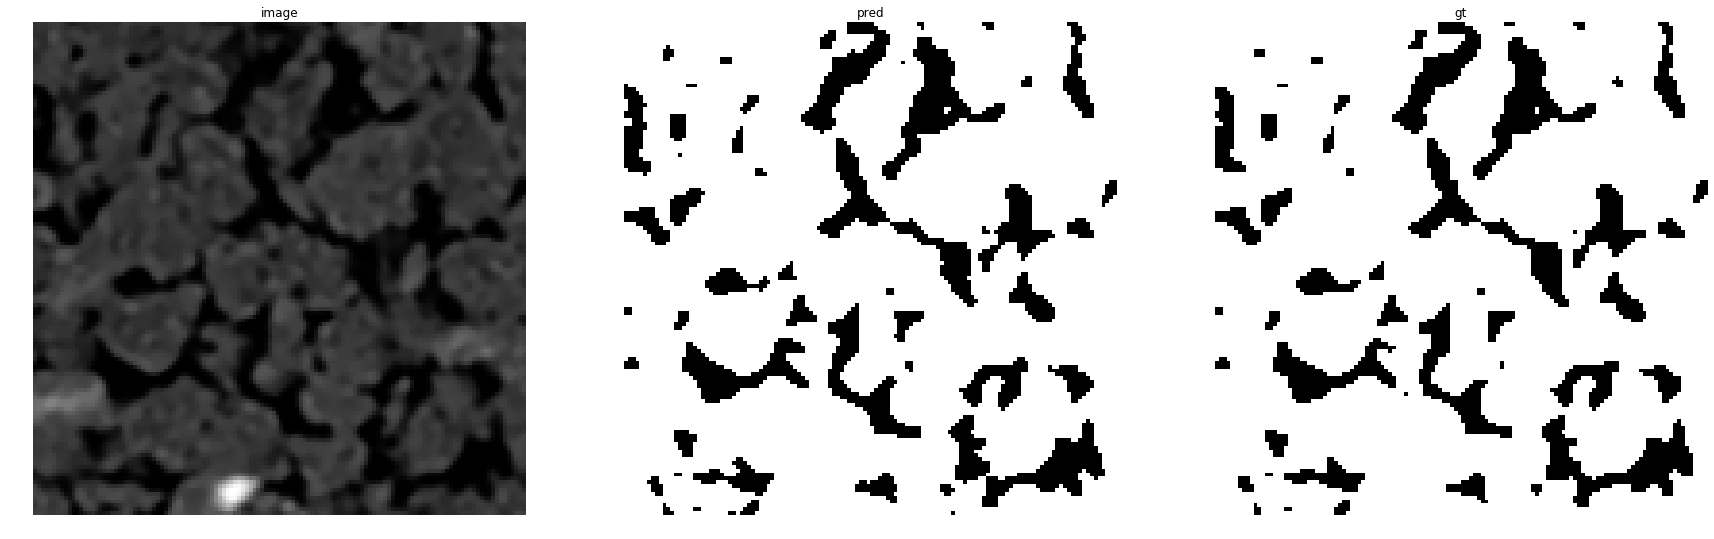

accuracy    : 0.98834228515625
precision   : 0.9964219157659336
recall      : 0.9894152479644708
f1          : 0.9929062209842154
pr_auc      : 0.9998635024162833
iou         : 0.9859123764567045


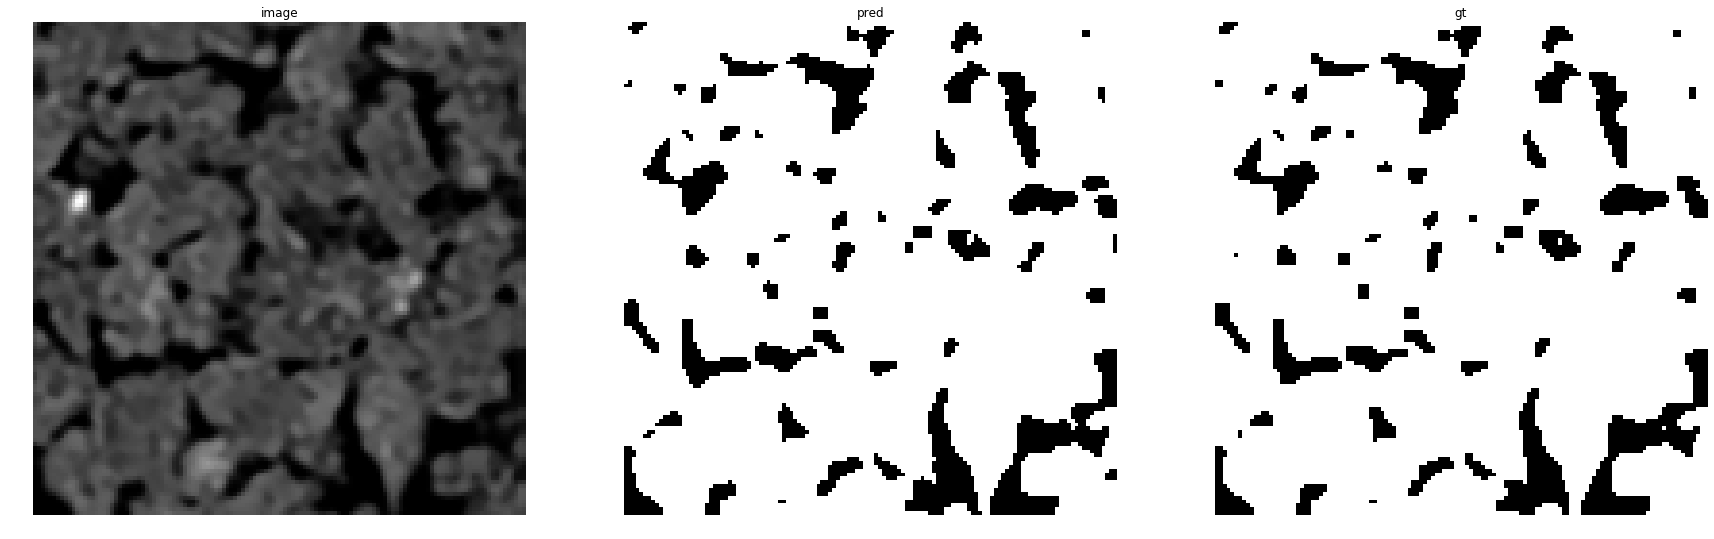

accuracy    : 0.9888916015625
precision   : 0.9959720923541682
recall      : 0.9909826093179703
f1          : 0.9934710862390587
pr_auc      : 0.9998774518042094
iou         : 0.987026872906123


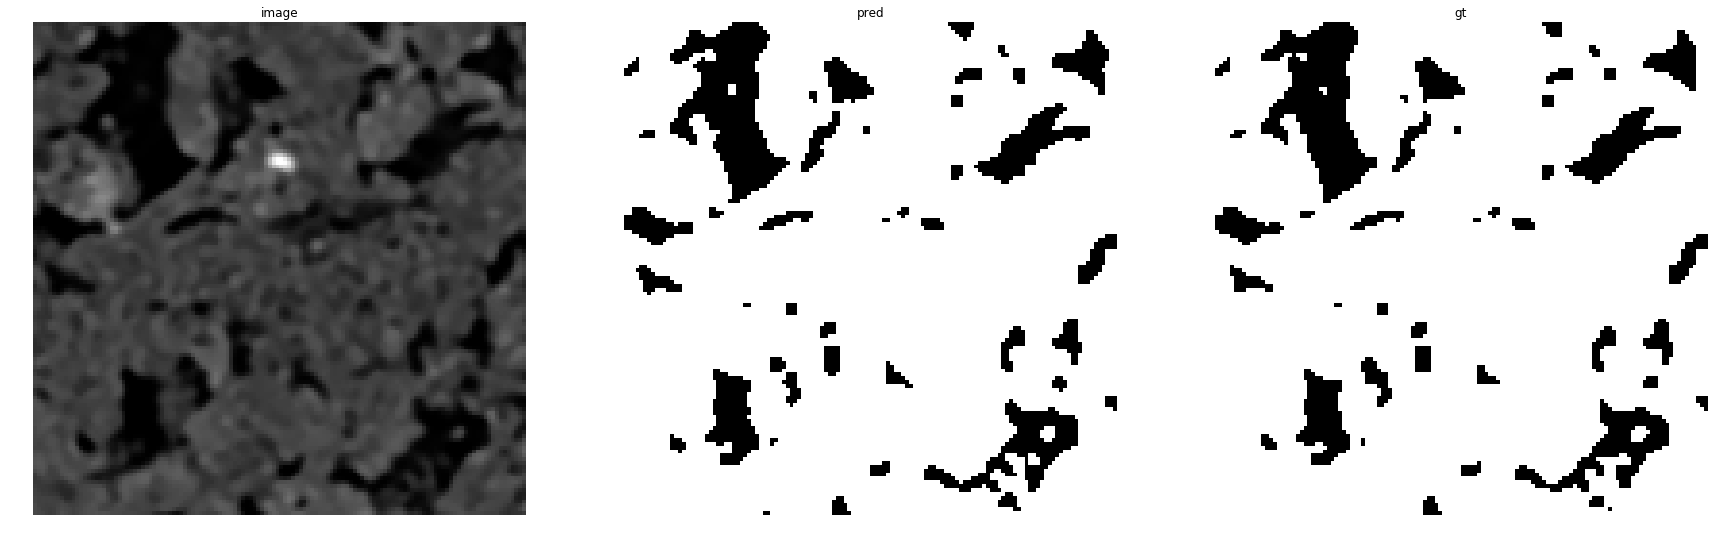

accuracy    : 0.98980712890625
precision   : 0.9969243973964667
recall      : 0.9911819086900867
f1          : 0.9940448596797775
pr_auc      : 0.9998959166116017
iou         : 0.9881602268699042


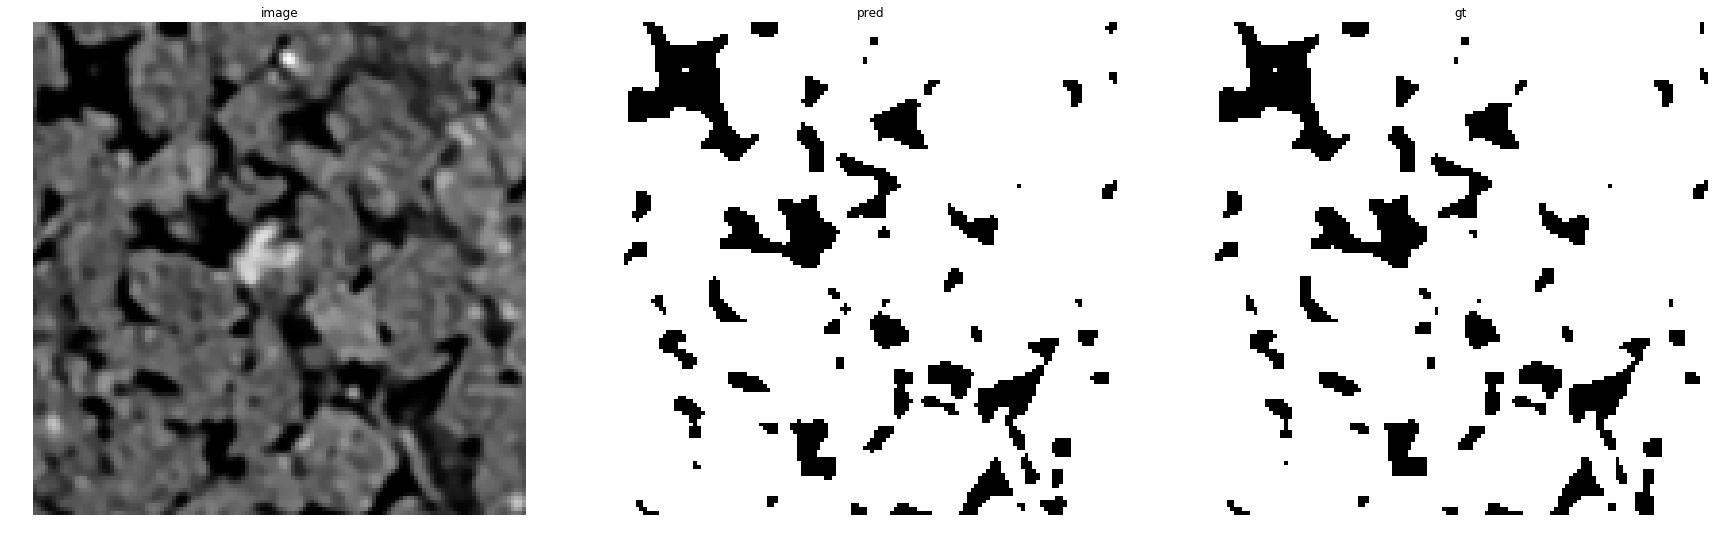

accuracy    : 0.9892578125
precision   : 0.9970032108455227
recall      : 0.9905011696320976
f1          : 0.9937415546547187
pr_auc      : 0.9999113233640804
iou         : 0.9875609583716164


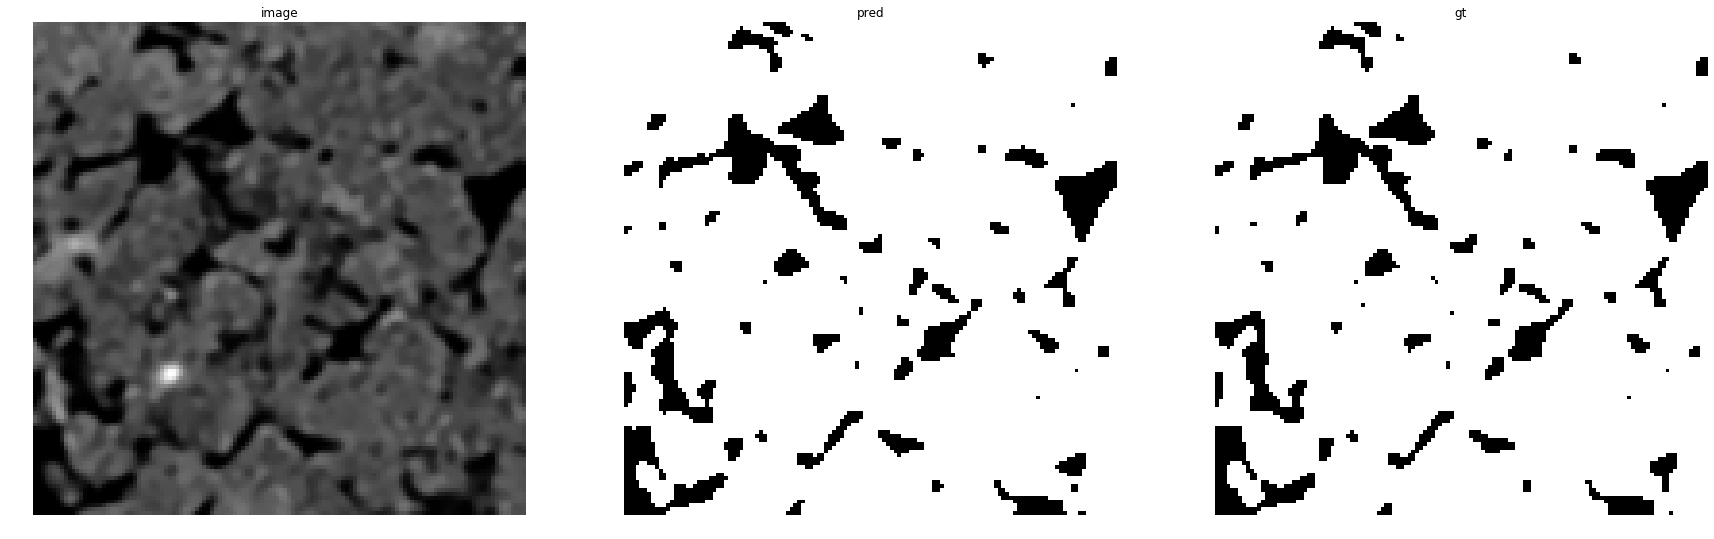

accuracy    : 0.9893798828125
precision   : 0.9968139631527912
recall      : 0.9911845730027549
f1          : 0.9939912977415567
pr_auc      : 0.9999091711374691
iou         : 0.988054373197858


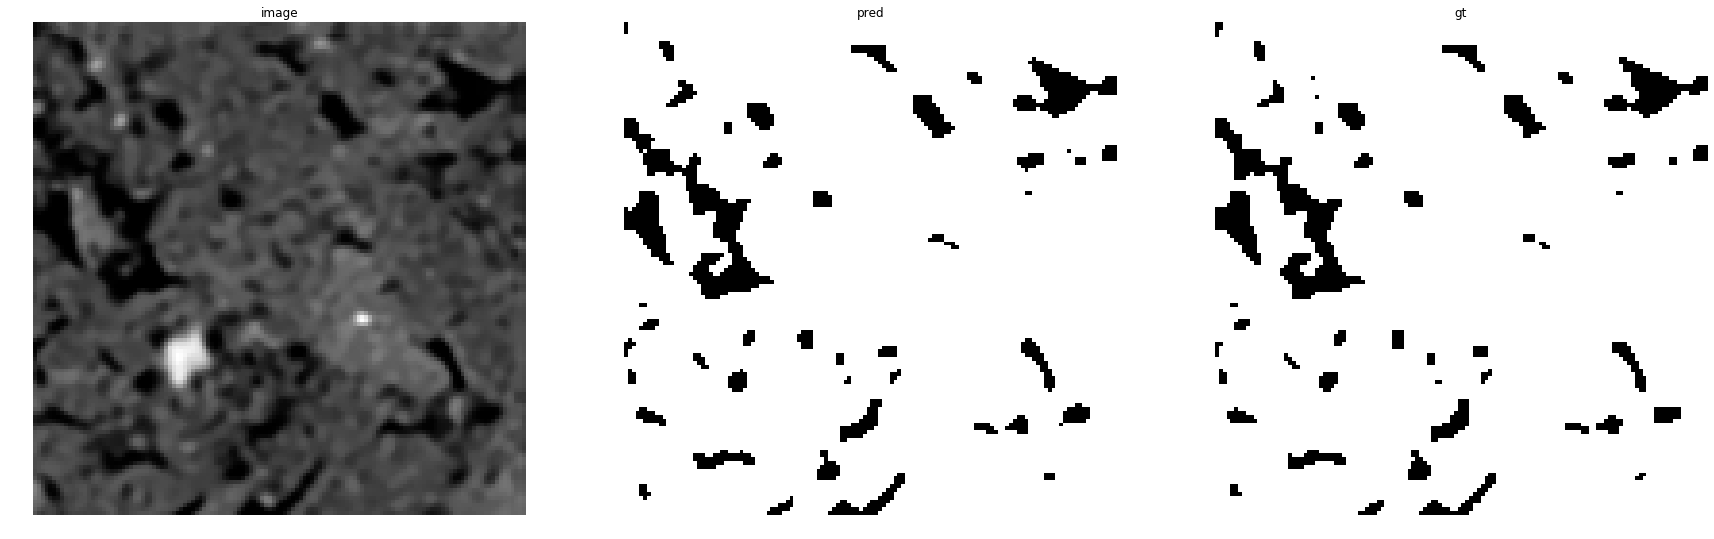

accuracy    : 0.99237060546875
precision   : 0.9971212425520519
recall      : 0.9945245726495726
f1          : 0.995821214856417
pr_auc      : 0.9999403367780871
iou         : 0.9916772088687662


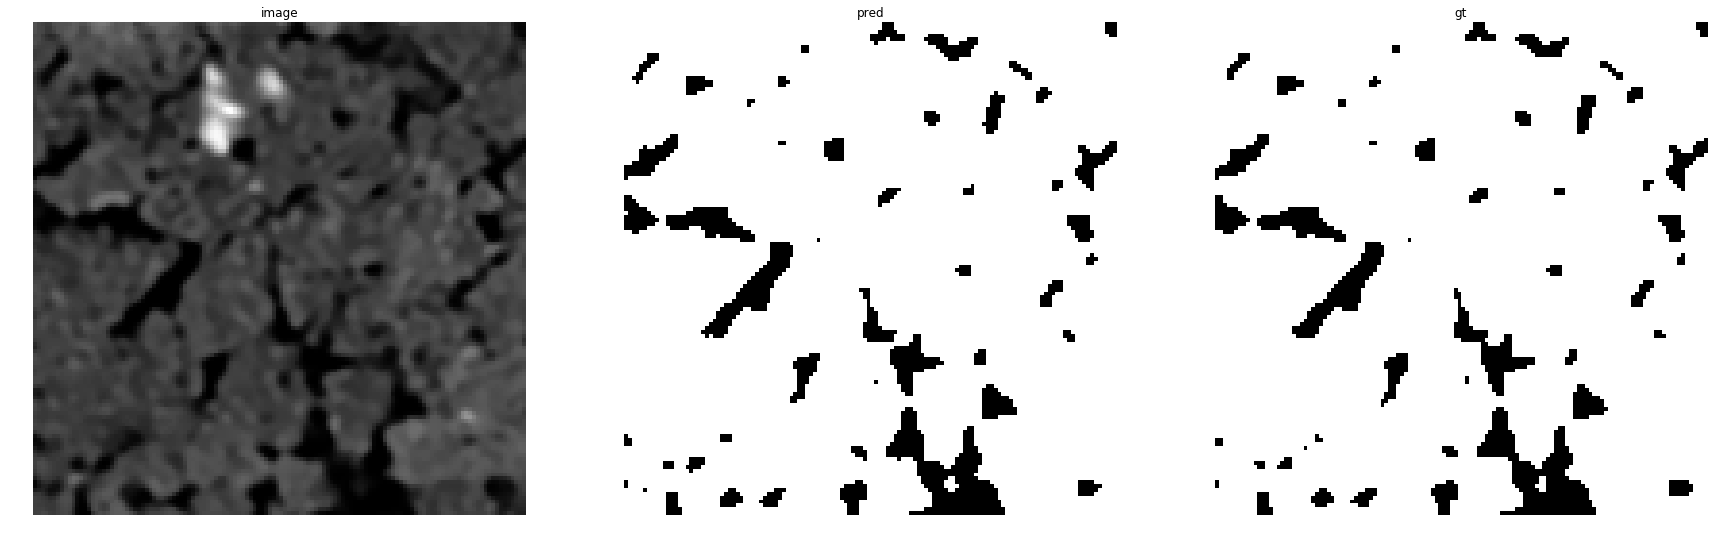

accuracy    : 0.99298095703125
precision   : 0.9975599837332249
recall      : 0.9946610799486383
f1          : 0.9961084227268112
pr_auc      : 0.9999615062676653
iou         : 0.9922470167868941


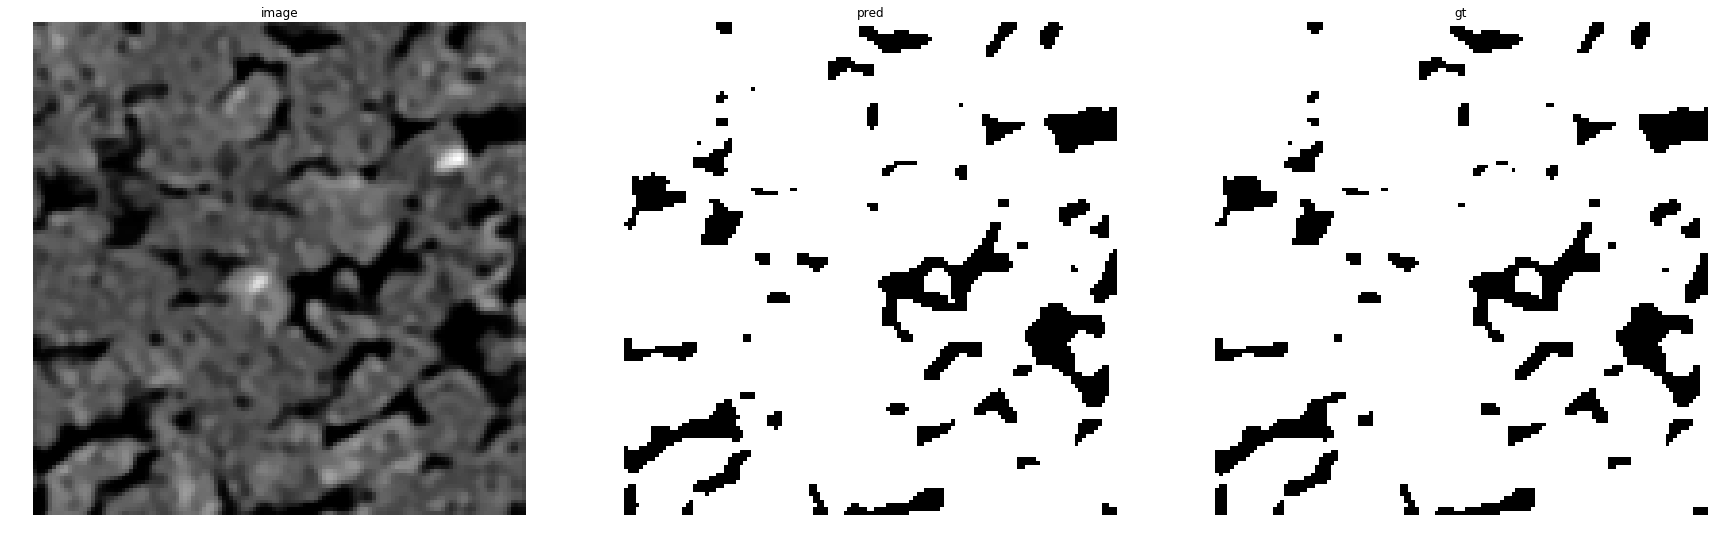

accuracy    : 0.99151611328125
precision   : 0.997464967255827
recall      : 0.9927810485001402
f1          : 0.9951174962239628
pr_auc      : 0.9999338211780406
iou         : 0.9902824384787472


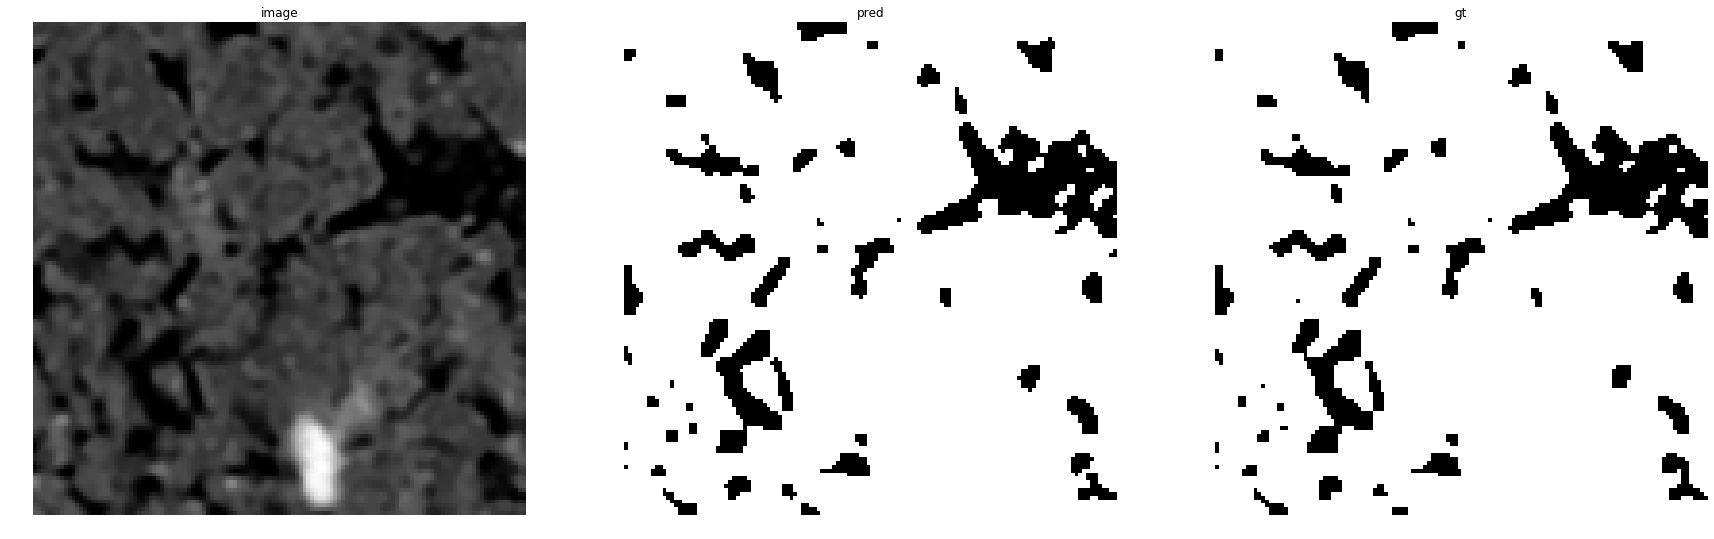

accuracy    : 0.990234375
precision   : 0.9960721049309111
recall      : 0.9927298147500874
f1          : 0.9943981513899587
pr_auc      : 0.9998989936948993
iou         : 0.9888587145741939


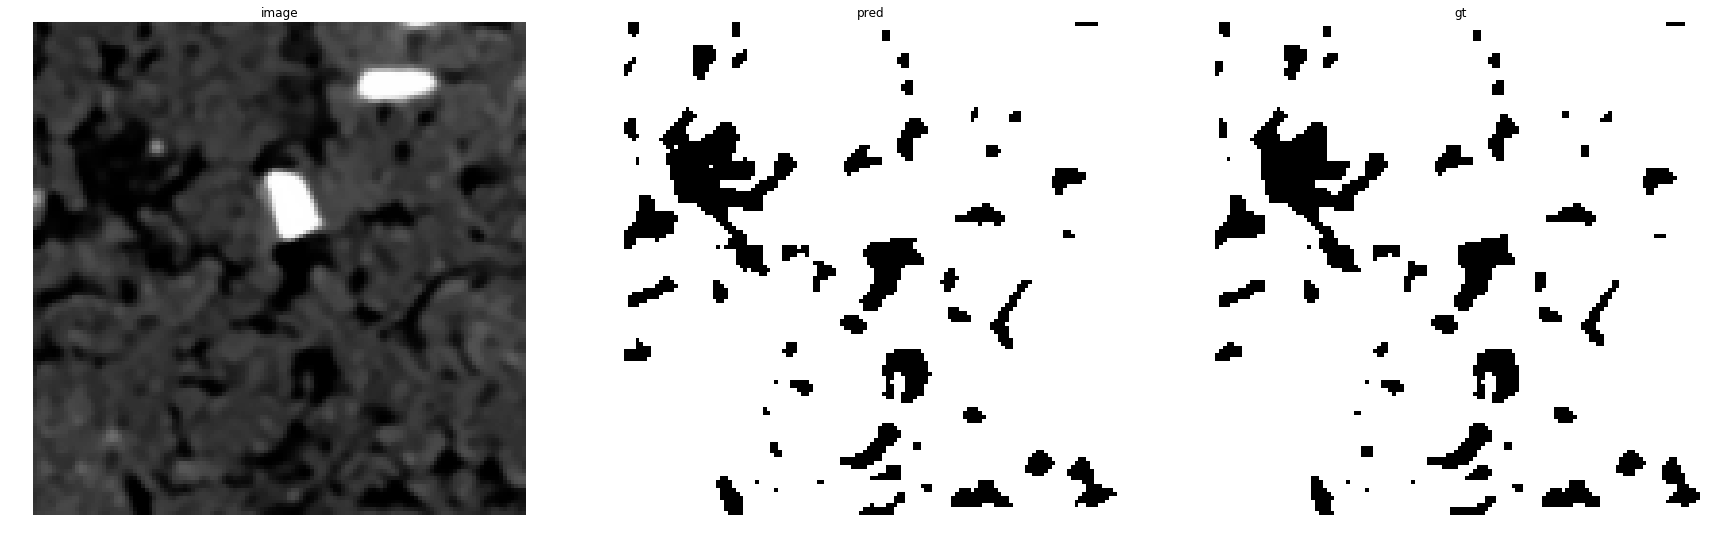

accuracy    : 0.990234375
precision   : 0.9967442504848989
recall      : 0.9922079713143015
f1          : 0.9944709378671643
pr_auc      : 0.999920729522207
iou         : 0.9890026805966046


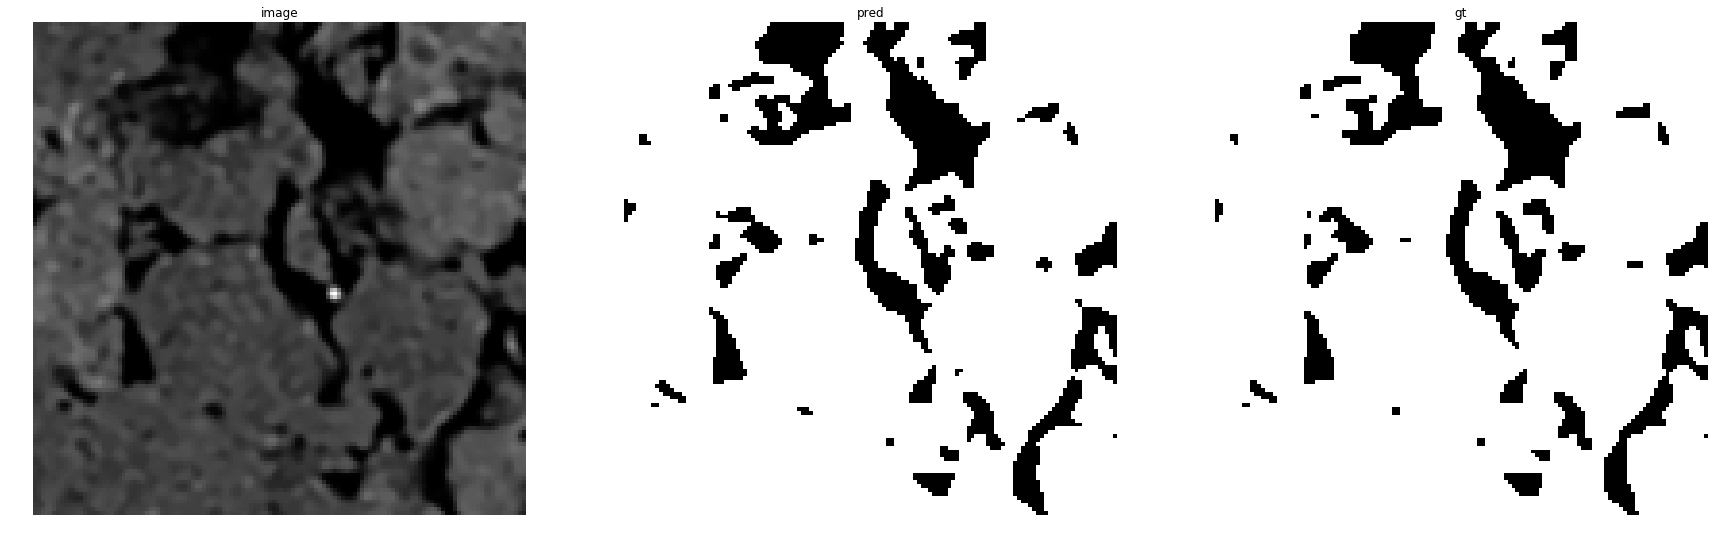

accuracy    : 0.987060546875
precision   : 0.9958812052893995
recall      : 0.988878524790127
f1          : 0.9923675115207372
pr_auc      : 0.9998763199502101
iou         : 0.9848506502786909


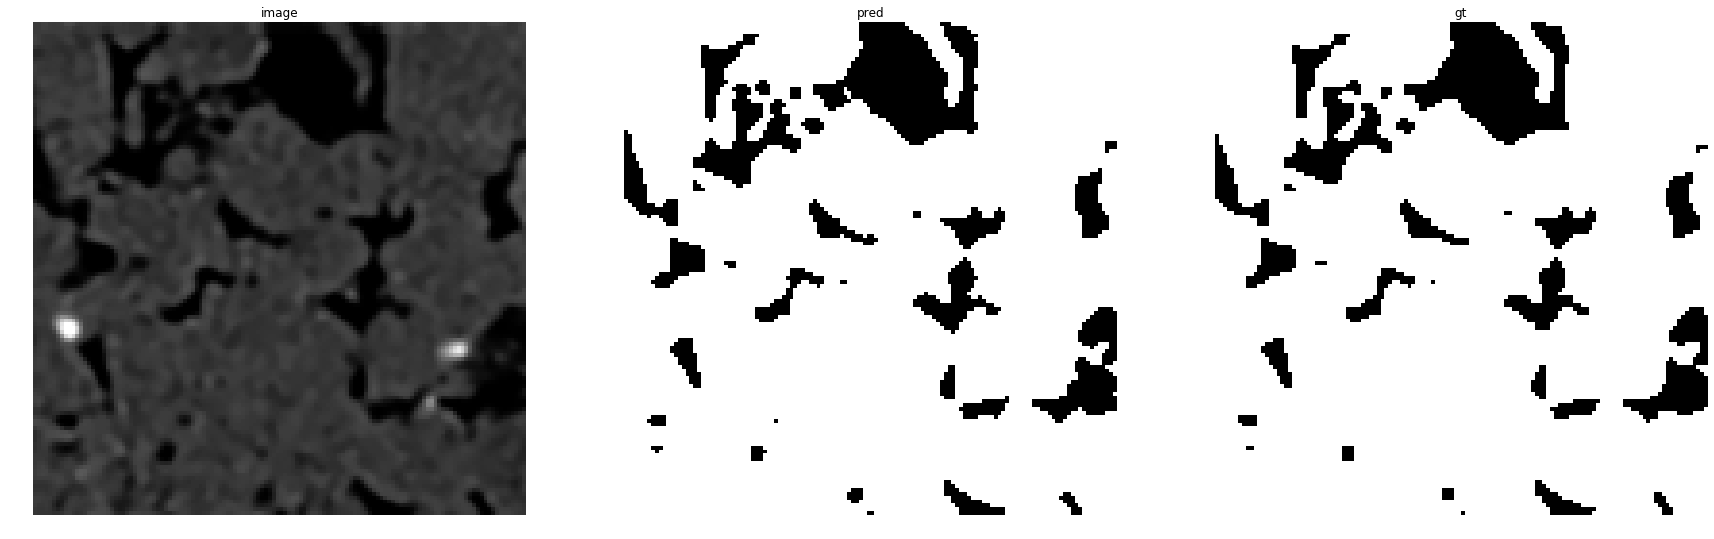

accuracy    : 0.9906005859375
precision   : 0.9976940260863298
recall      : 0.9912651249373523
f1          : 0.9944691854618588
pr_auc      : 0.9999227833788316
iou         : 0.9889992142295878


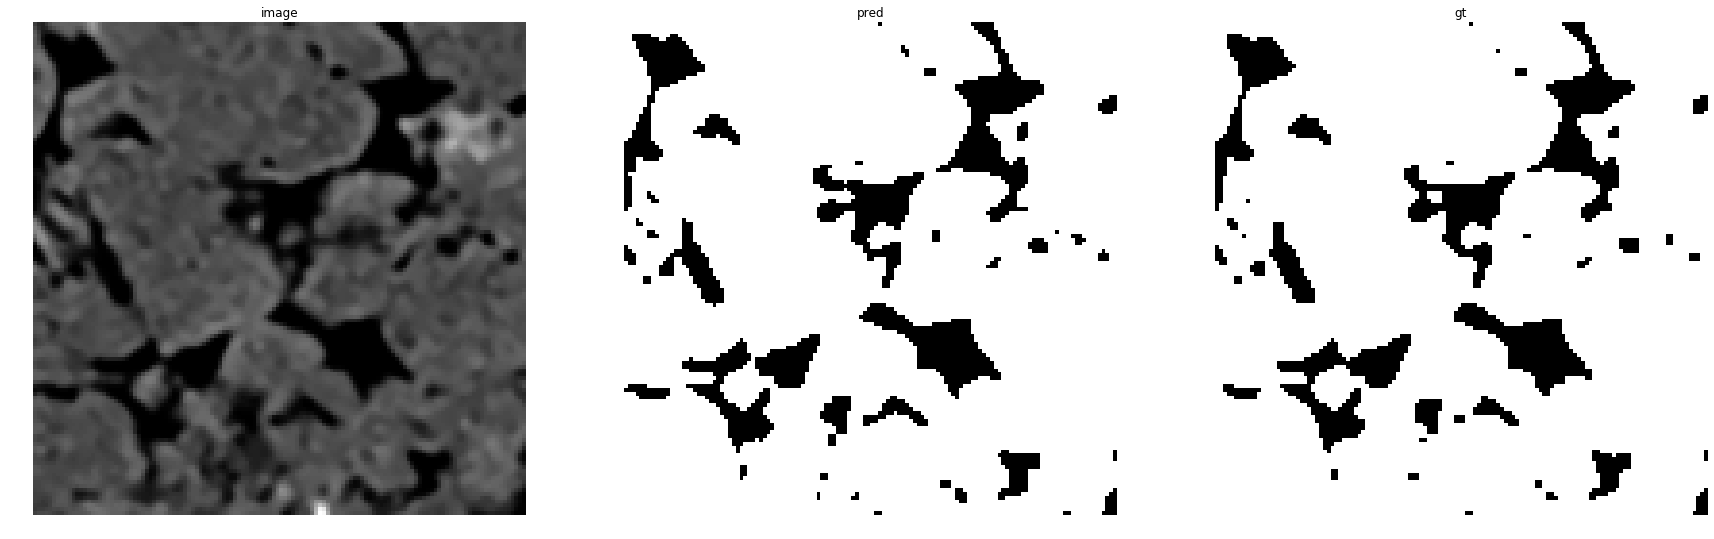

accuracy    : 0.9886474609375
precision   : 0.9963618205164788
recall      : 0.9904268898028649
f1          : 0.9933854907539118
pr_auc      : 0.9999024125993741
iou         : 0.986857909983749


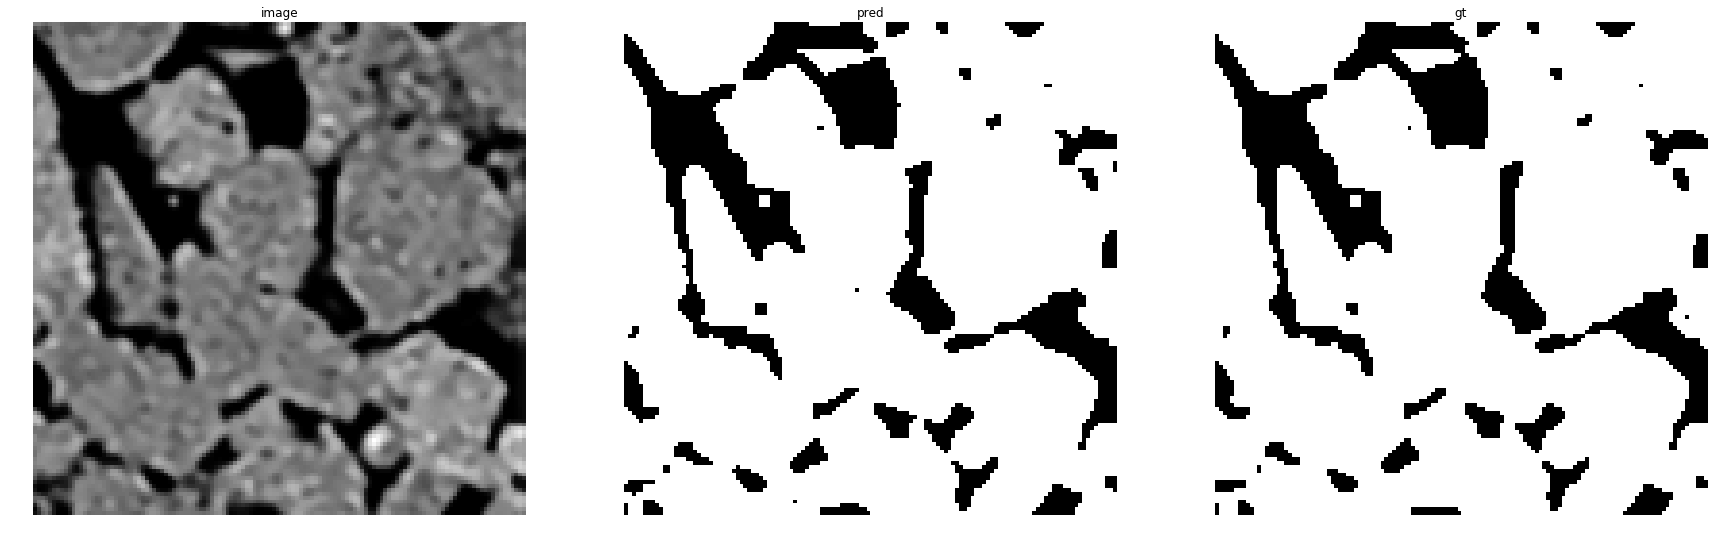

accuracy    : 0.99090576171875
precision   : 0.9965813264453393
recall      : 0.9921343215852367
f1          : 0.9943528519992421
pr_auc      : 0.9998882590925038
iou         : 0.9887691264038592


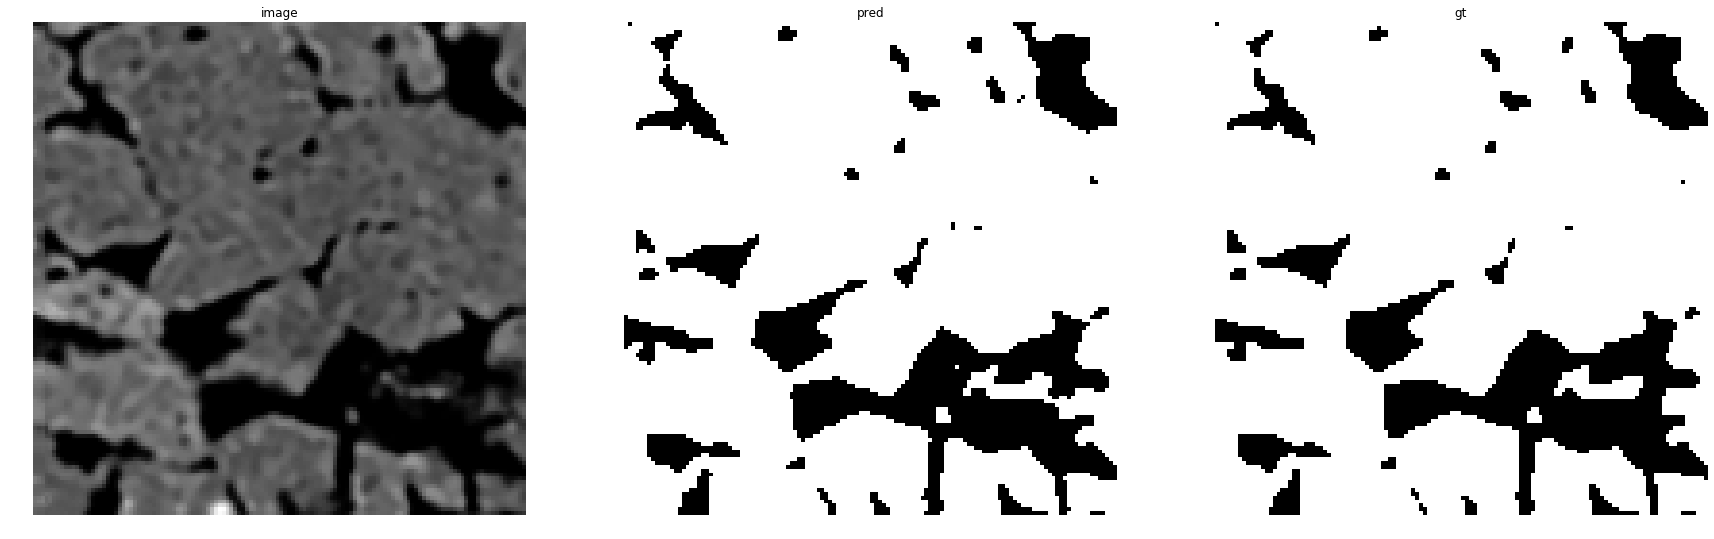

accuracy    : 0.989013671875
precision   : 0.9963470319634703
recall      : 0.9900181488203267
f1          : 0.9931725079654073
pr_auc      : 0.9998619874998838
iou         : 0.9864376130198915


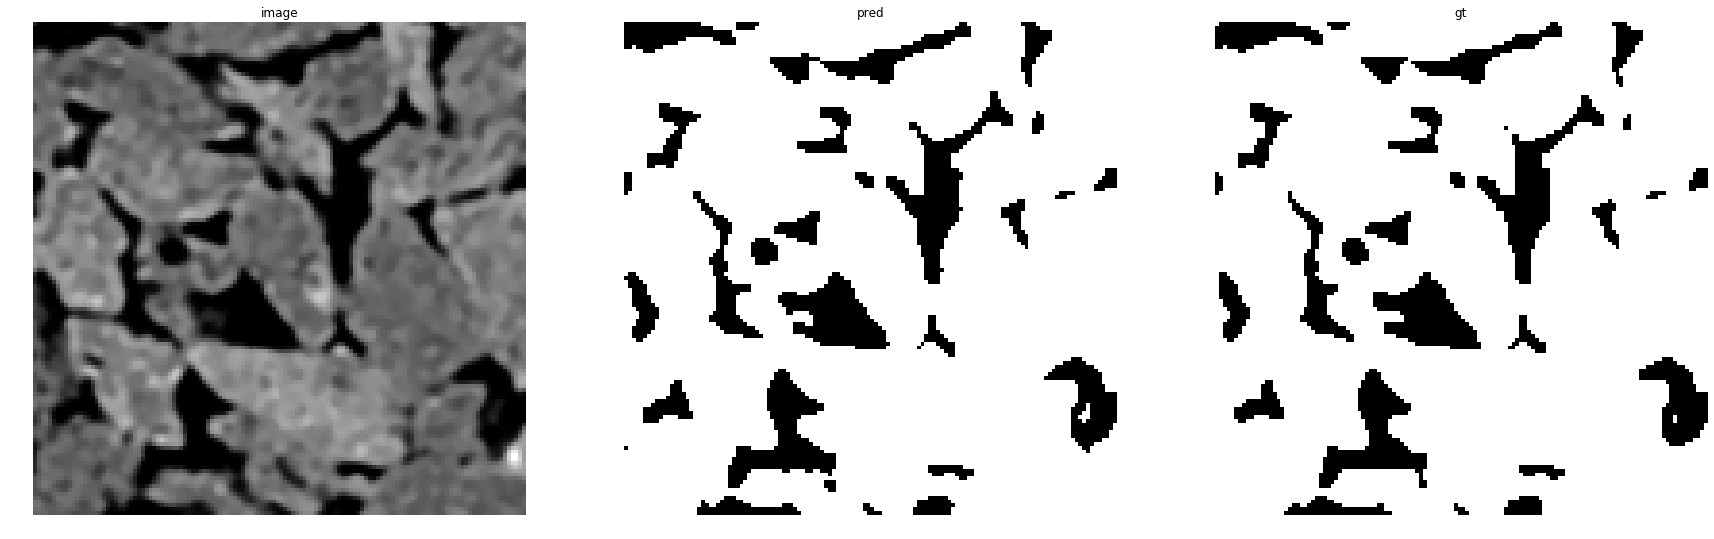

accuracy    : 0.9908447265625
precision   : 0.9970853978431944
recall      : 0.9920255183413078
f1          : 0.9945490224580275
pr_auc      : 0.9999164610947503
iou         : 0.9891571490530577


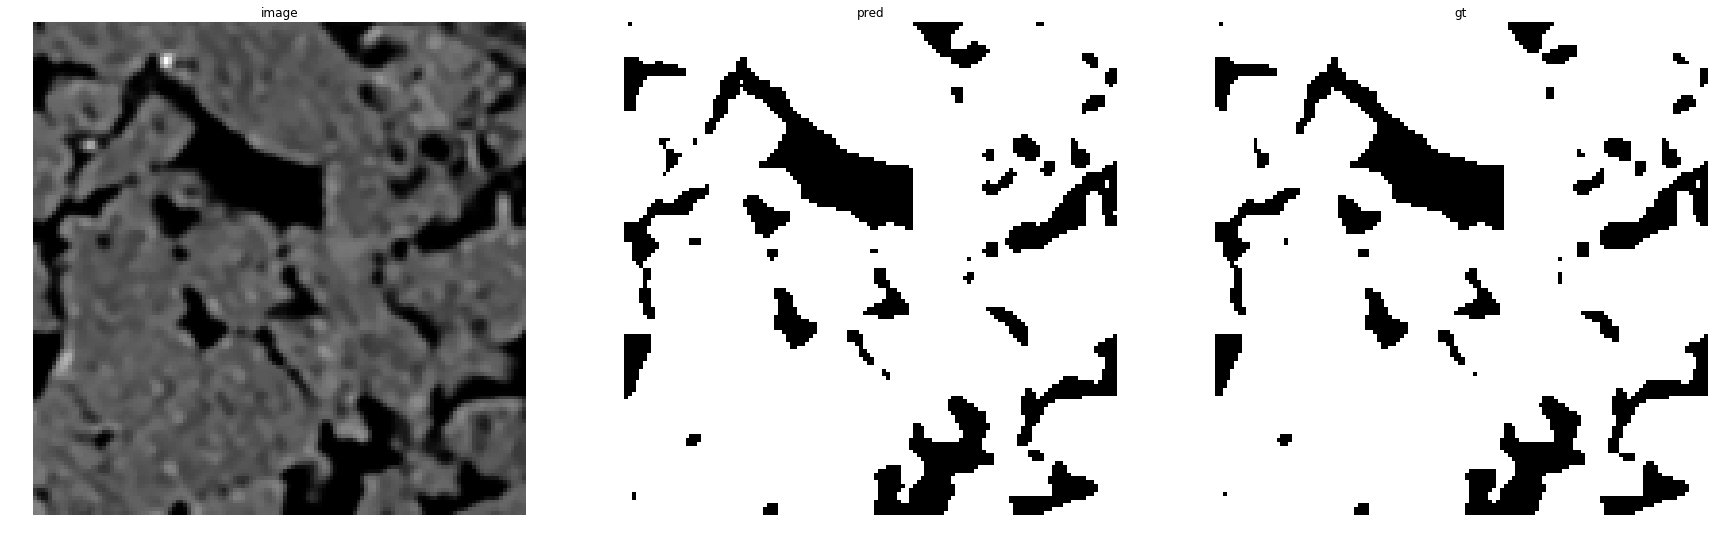

accuracy    : 0.98773193359375
precision   : 0.9969092648465671
recall      : 0.98839924120823
f1          : 0.9926360139219637
pr_auc      : 0.9998700708222259
iou         : 0.9853796915915042


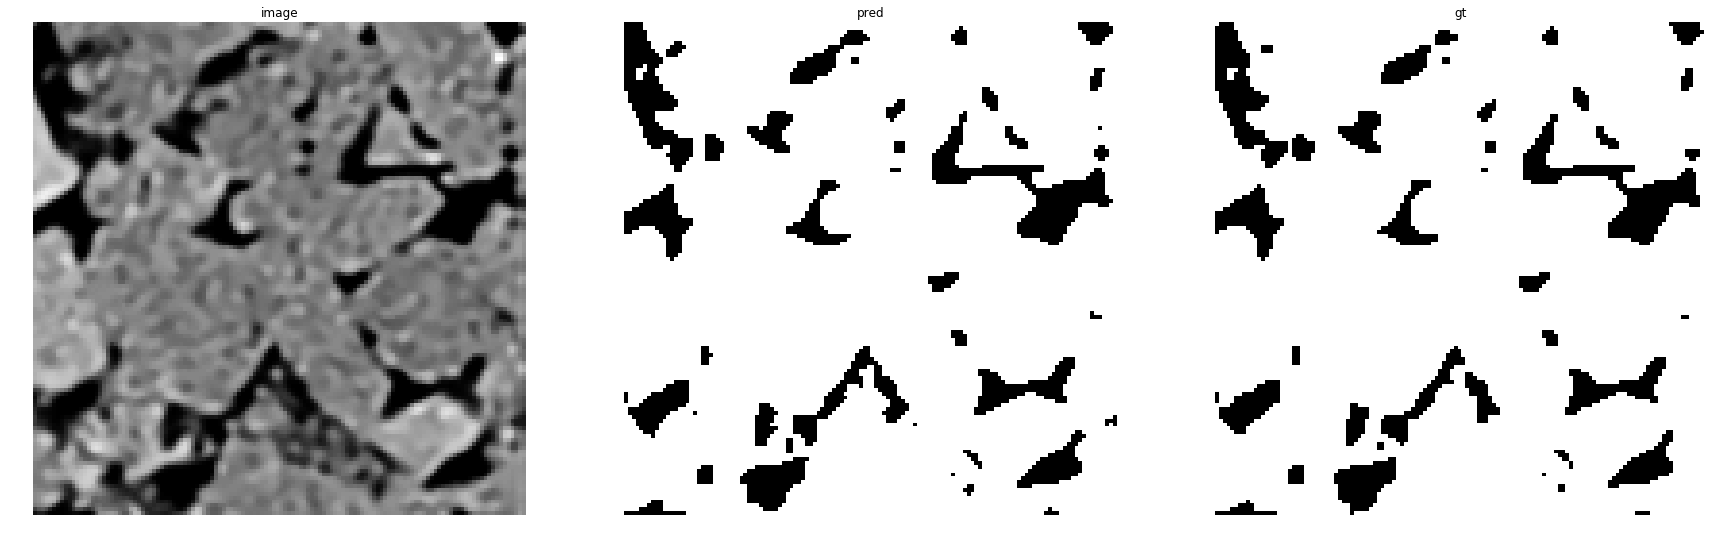

accuracy    : 0.99017333984375
precision   : 0.9966779756856092
recall      : 0.9919803024973619
f1          : 0.9943235905933786
pr_auc      : 0.9999220064315909
iou         : 0.98871126069275


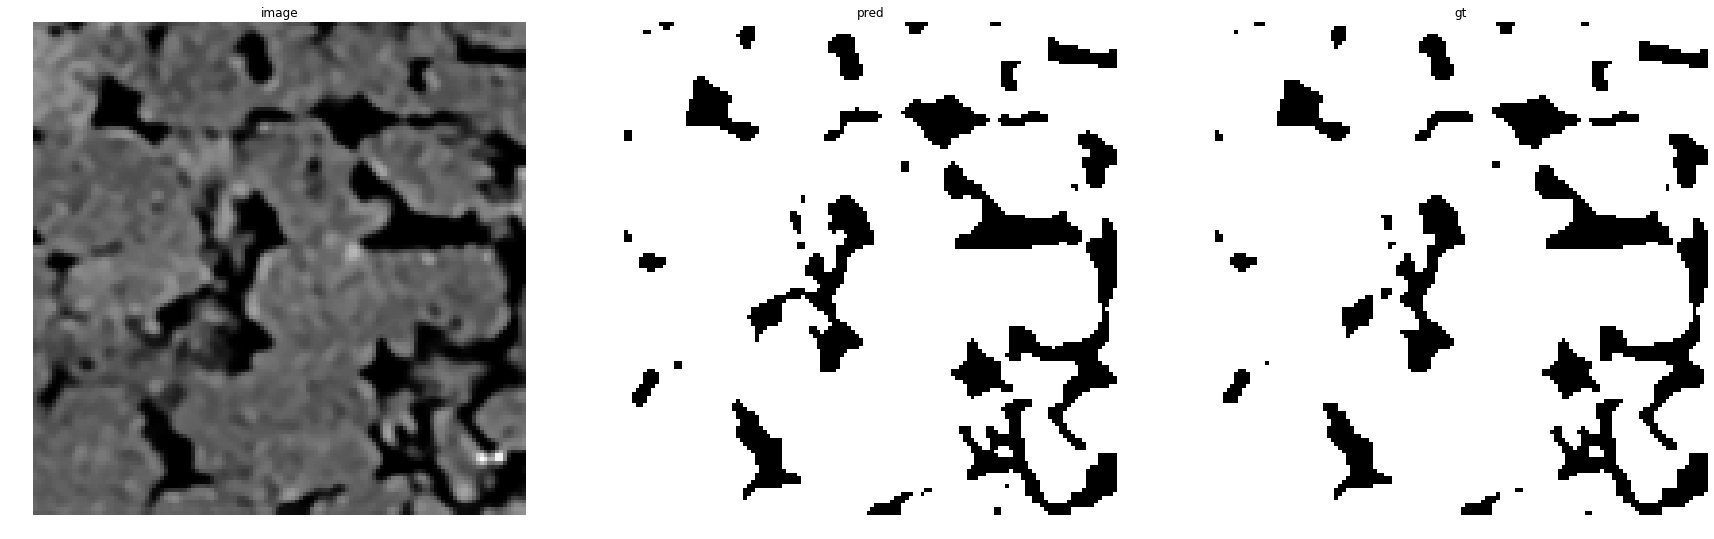

accuracy    : 0.9906005859375
precision   : 0.9975319396051103
recall      : 0.9913432405136344
f1          : 0.9944279615022794
pr_auc      : 0.9999107693338252
iou         : 0.9889176741508348


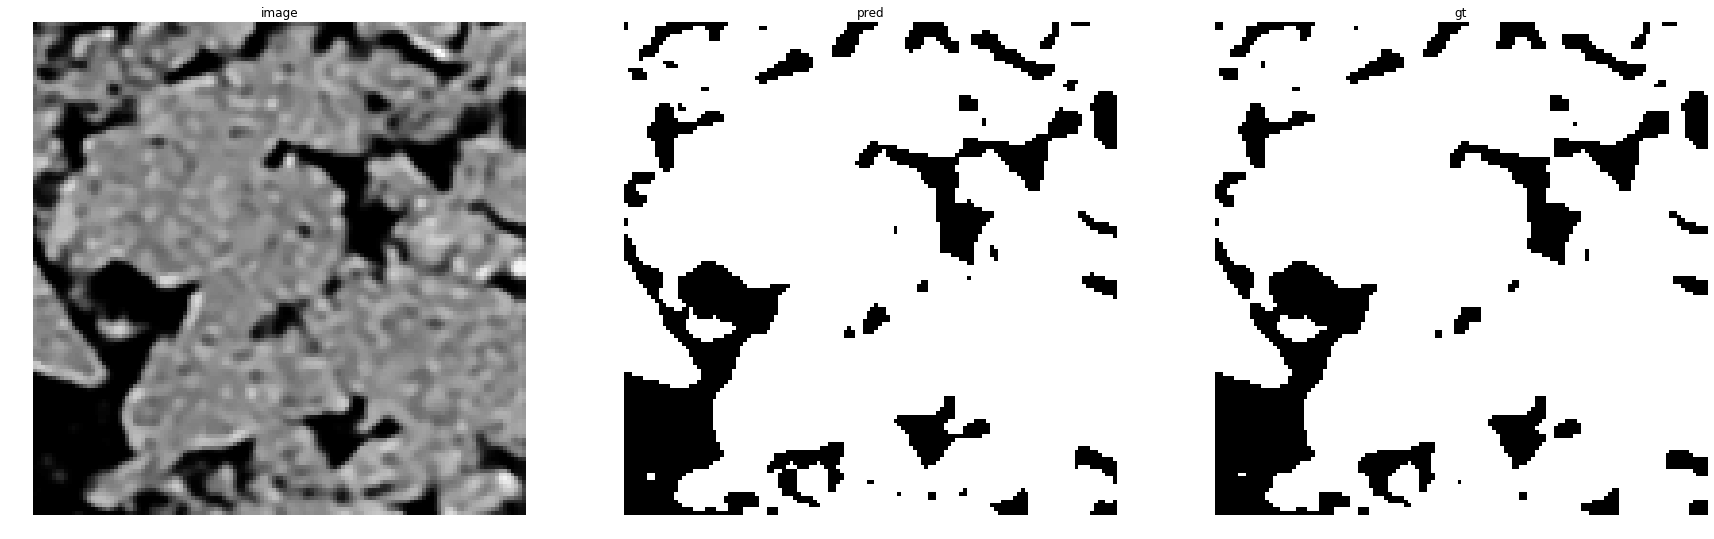

accuracy    : 0.98822021484375
precision   : 0.9951614122627958
recall      : 0.9902949142341257
f1          : 0.9927221991779478
pr_auc      : 0.9998635994805418
iou         : 0.985549565738245


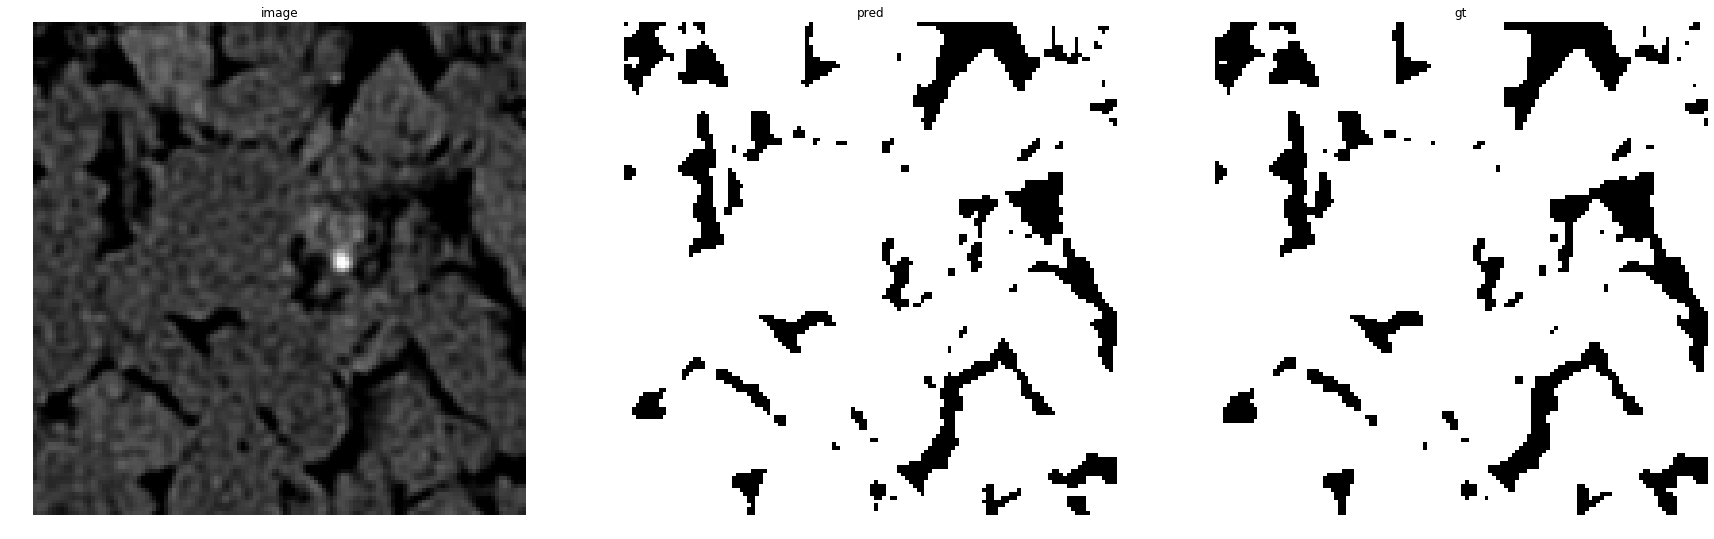

accuracy    : 0.97918701171875
precision   : 0.9820831852115179
recall      : 0.993598043446986
f1          : 0.9878070583187327
pr_auc      : 0.9995573971049834
iou         : 0.9759078705666243


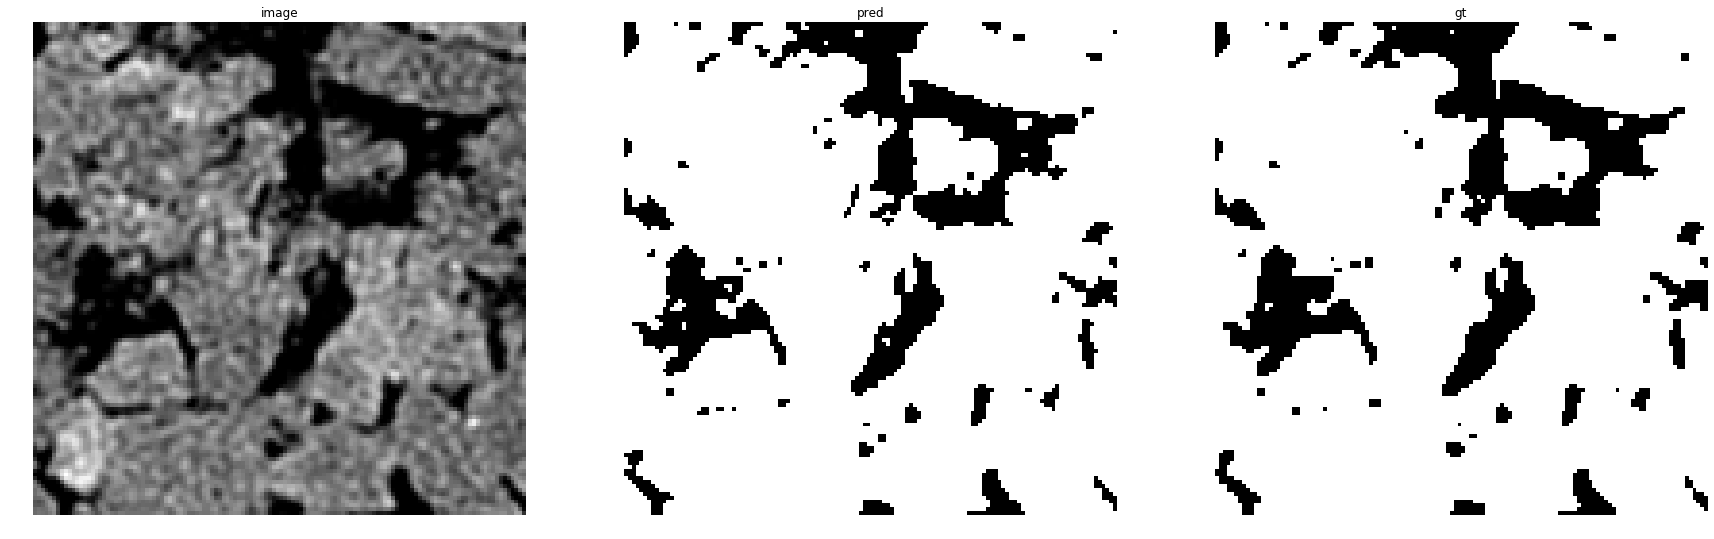

accuracy    : 0.98150634765625
precision   : 0.9827611719443622
recall      : 0.9947577323447915
f1          : 0.9887230637537683
pr_auc      : 0.99965721630545
iou         : 0.9776976299131459


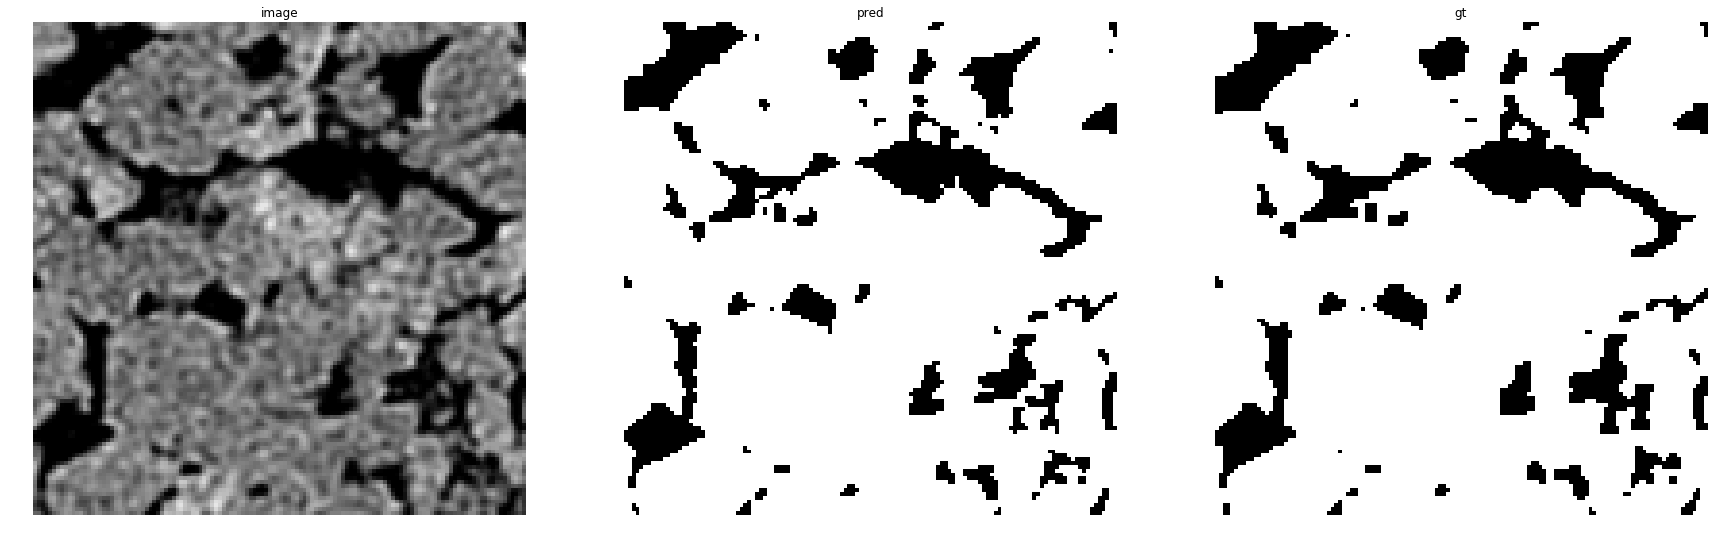

accuracy    : 0.9813232421875
precision   : 0.9830272880239959
recall      : 0.9945229812745171
f1          : 0.9887417218543046
pr_auc      : 0.9996512763640515
iou         : 0.9777341191879503


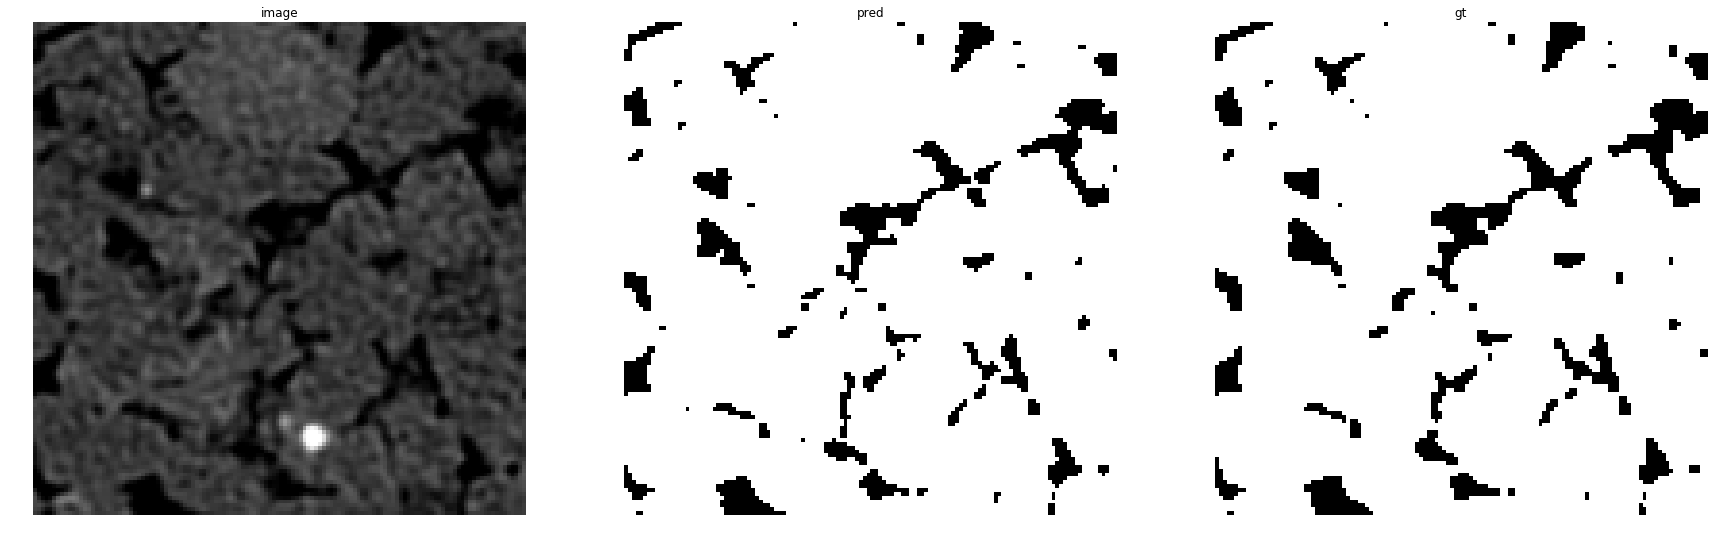

accuracy    : 0.9837646484375
precision   : 0.985983534054569
recall      : 0.9958765720569033
f1          : 0.9909053610503282
pr_auc      : 0.9997366697117107
iou         : 0.9819746560954123


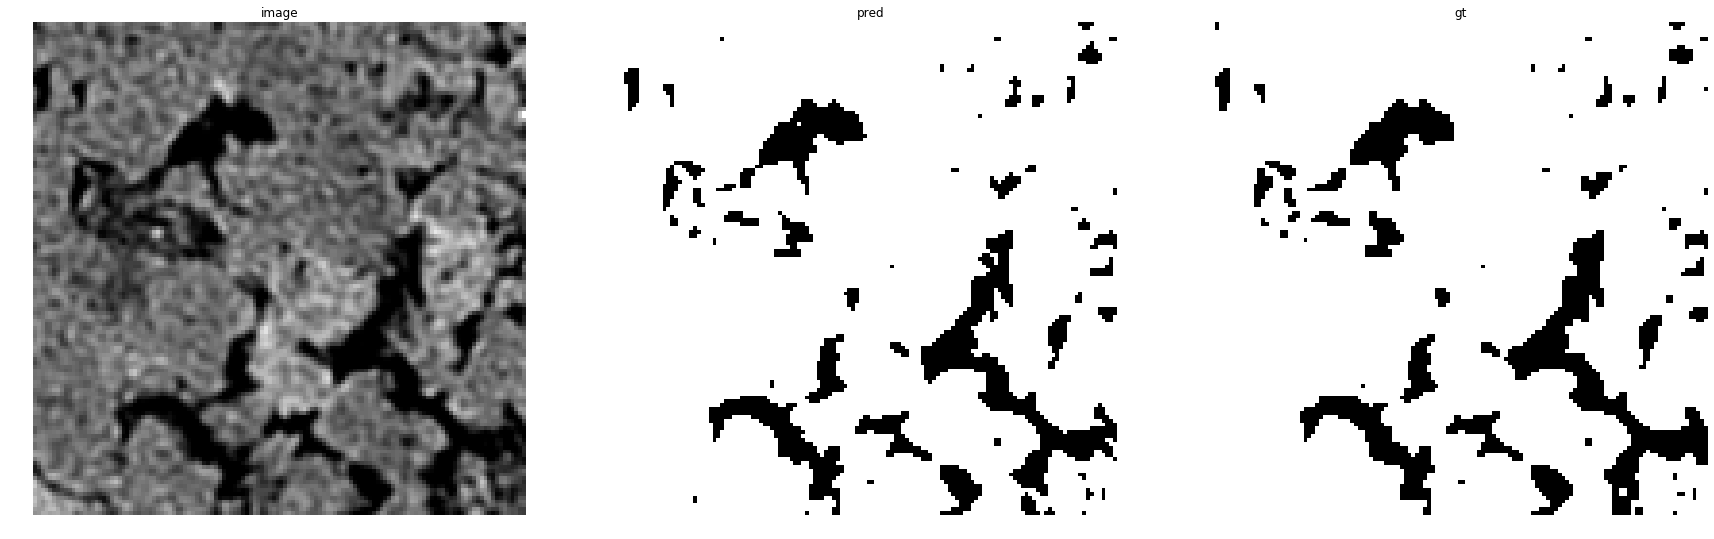

accuracy    : 0.98492431640625
precision   : 0.9876405278960967
recall      : 0.995075277895033
f1          : 0.9913439635535308
pr_auc      : 0.9997752057708421
iou         : 0.982836495031617


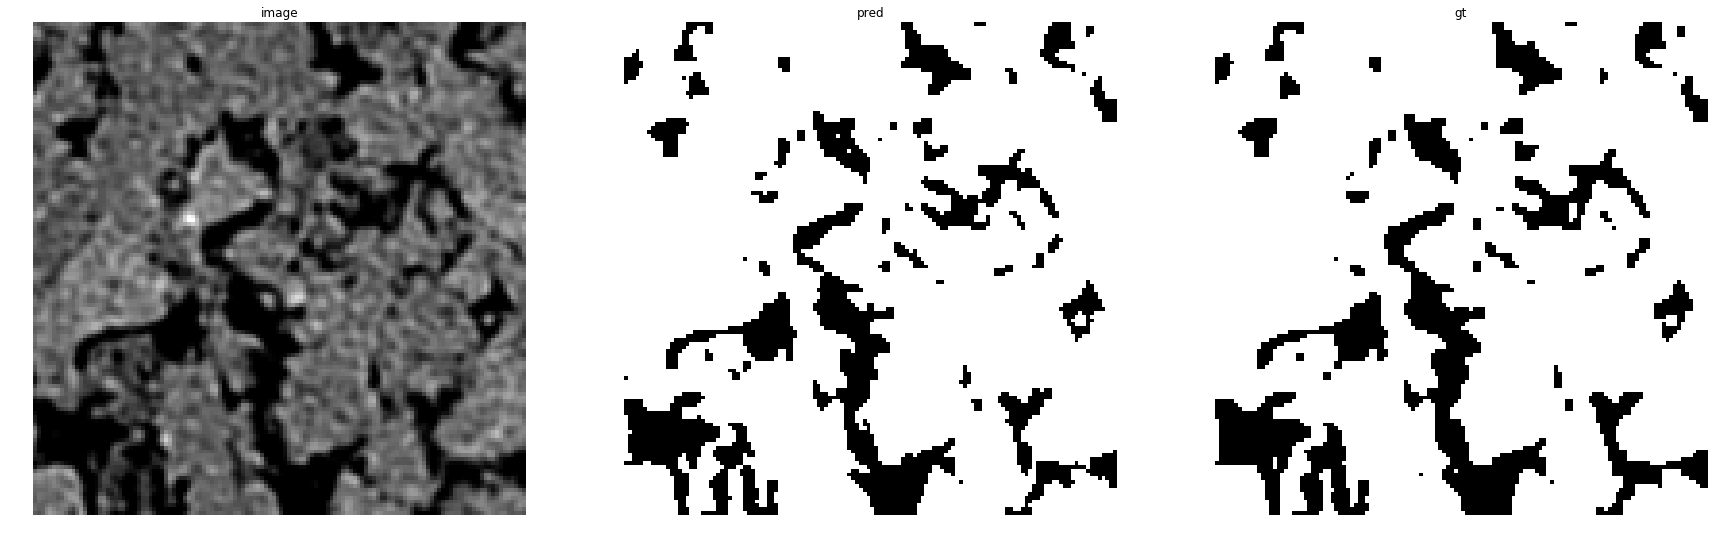

accuracy    : 0.97955322265625
precision   : 0.981608339538347
recall      : 0.9933690000753522
f1          : 0.9874536534212202
pr_auc      : 0.9995775584264363
iou         : 0.9752182275484539


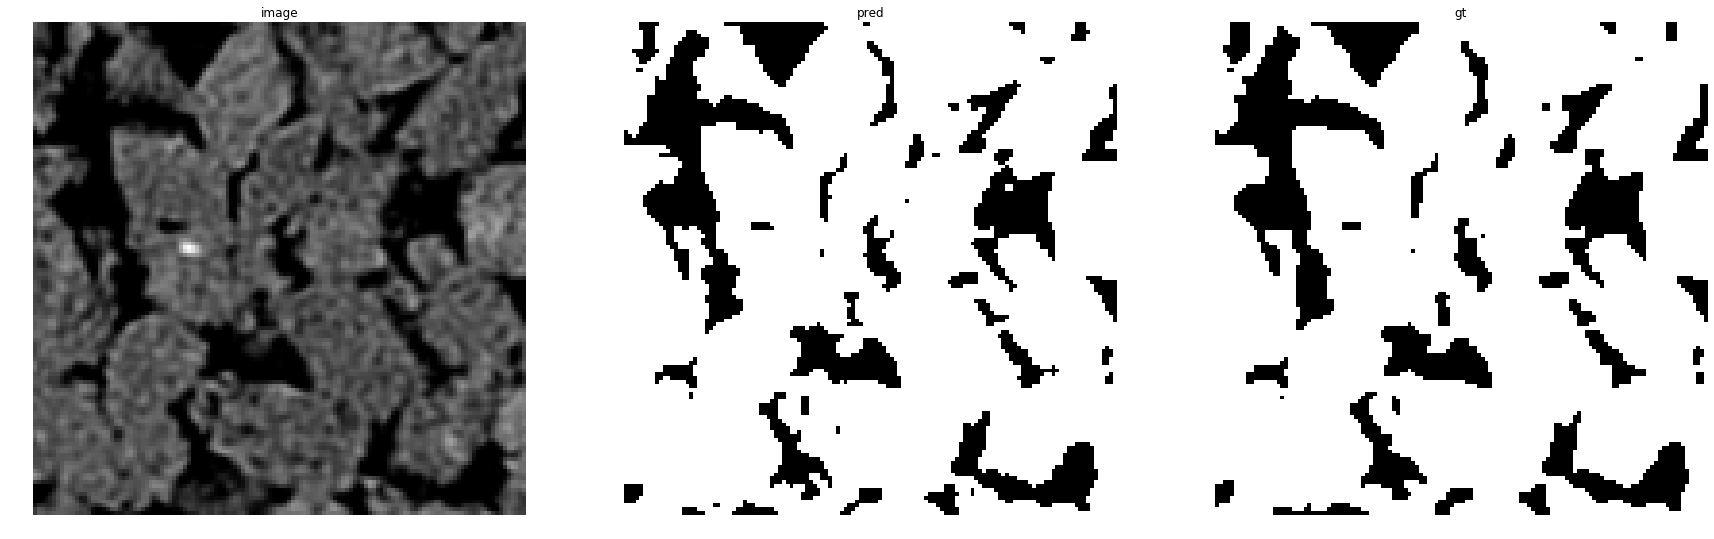

accuracy    : 0.97808837890625
precision   : 0.9808058496458222
recall      : 0.9917590881084412
f1          : 0.9862520583617356
pr_auc      : 0.9995451330998744
iou         : 0.9728770021154427


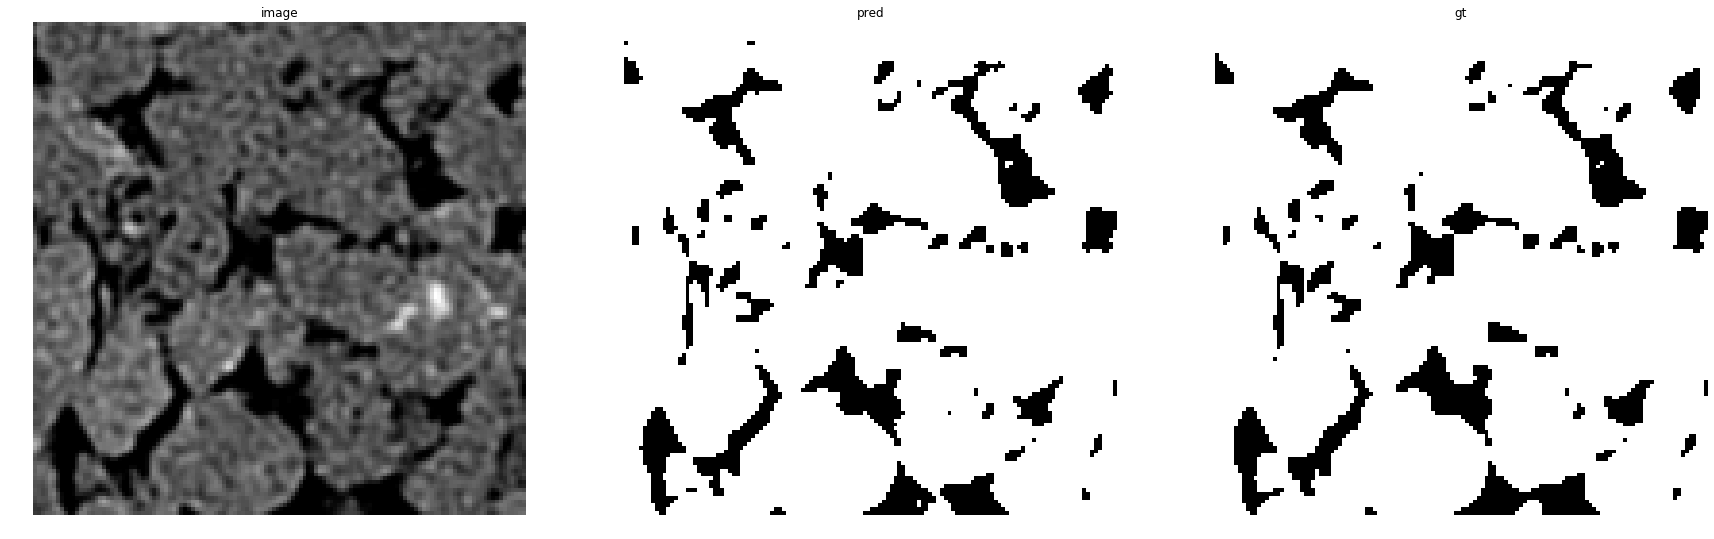

accuracy    : 0.9854736328125
precision   : 0.9898520084566597
recall      : 0.9933521923620934
f1          : 0.9915990116484292
pr_auc      : 0.9997652457386799
iou         : 0.9833380005600673


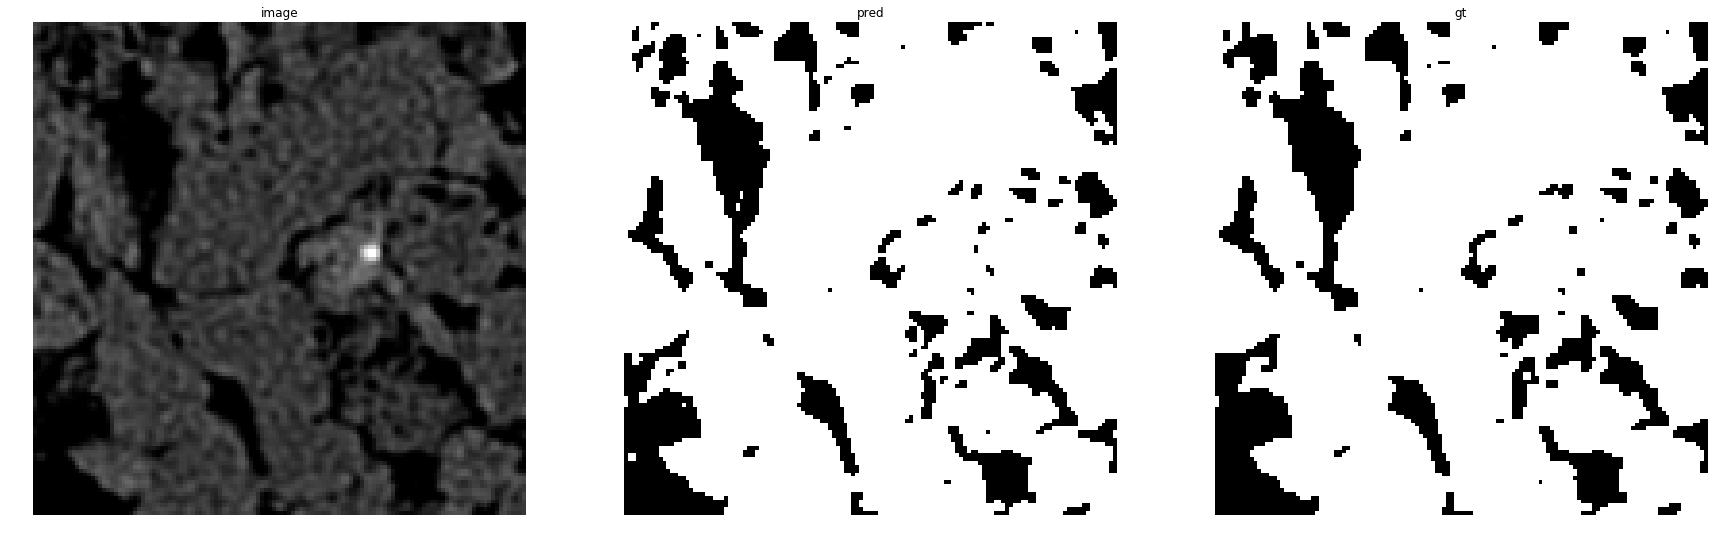

accuracy    : 0.9801025390625
precision   : 0.9817330917874396
recall      : 0.9935828877005347
f1          : 0.9876224466550231
pr_auc      : 0.9995359833990668
iou         : 0.9755475547554755


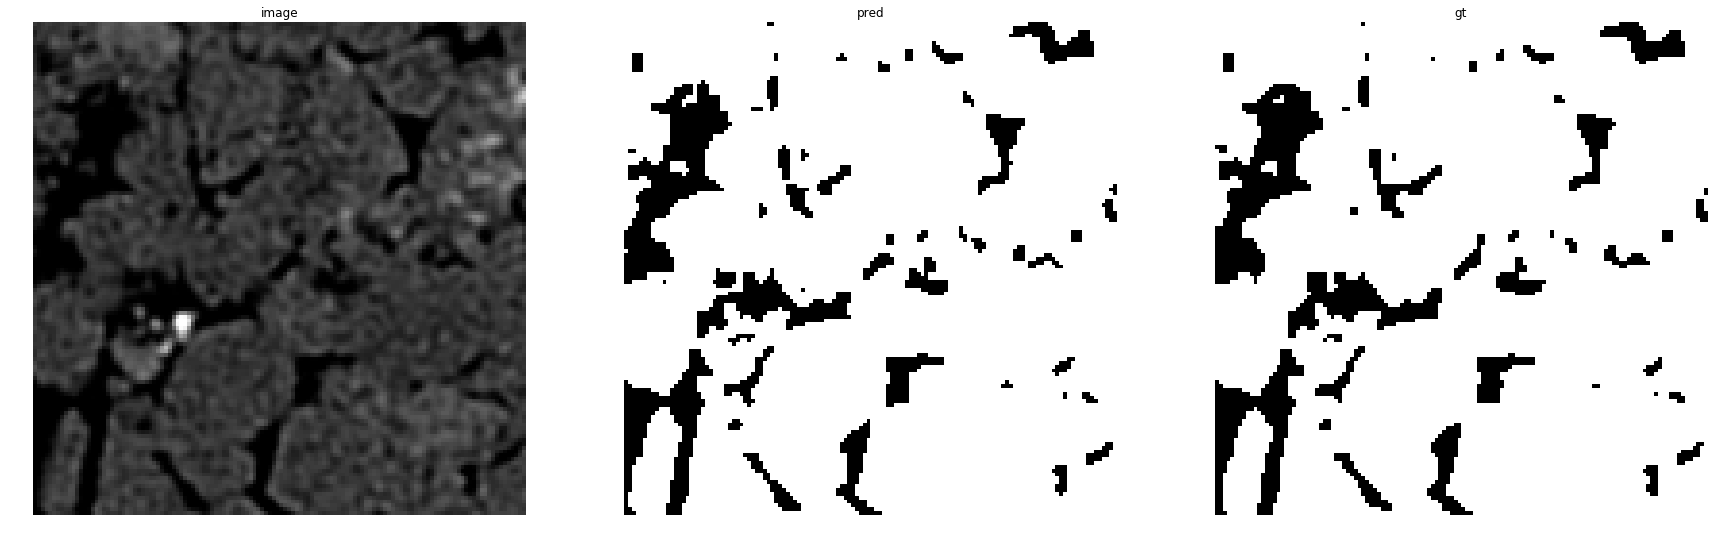

accuracy    : 0.98626708984375
precision   : 0.9895221238938053
recall      : 0.9945211327735876
f1          : 0.9920153305653145
pr_auc      : 0.9997936752340113
iou         : 0.9841571609632446


In [38]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break